In [359]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
import scipy
import scipy.stats
from sklearn.preprocessing import StandardScaler

In [360]:
avdf=pd.read_csv('avocado.csv')


In [361]:
avdf

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [6]:
    #average price---average price of single avocado and it is the fruits which is heavily consumed in united states
#Date - The date of the observation 
#type - conventional or organic
#year - the year
#Region - the city or region of the observation
#Total Volume - Total number of avocados sold
#PLU numbers are used by retailers to identify and categorize avocado based on their size and weight
#4046 - Total number of avocados with PLU 4046 sold(3.5 ounces)
#4225 - Total number of avocados with PLU 4225 sold(8-10 ounces)
#4770 - Total number of avocados with PLU 4770 sold(10-15 ounces)

In [362]:
avdf.shape

(18249, 14)

In [363]:
avdf.dtypes



Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [364]:
avdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [ ]:
#RangeIndex: 18249 entries, 0 to 18248
#Total 16 columns are present in the dataset

In [365]:
# checking for missing values
avdf.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [ ]:
#luckily we dont have any missing values in the dataset

In [366]:
avdf.describe(include='all')

Unnamed: 0        Date  AveragePrice  Total Volume          4046  \
count   18249.000000       18249  18249.000000  1.824900e+04  1.824900e+04   
unique           NaN         169           NaN           NaN           NaN   
top              NaN  2015-12-27           NaN           NaN           NaN   
freq             NaN         108           NaN           NaN           NaN   
mean       24.232232         NaN      1.405978  8.506440e+05  2.930084e+05   
std        15.481045         NaN      0.402677  3.453545e+06  1.264989e+06   
min         0.000000         NaN      0.440000  8.456000e+01  0.000000e+00   
25%        10.000000         NaN      1.100000  1.083858e+04  8.540700e+02   
50%        24.000000         NaN      1.370000  1.073768e+05  8.645300e+03   
75%        38.000000         NaN      1.660000  4.329623e+05  1.110202e+05   
max        52.000000         NaN      3.250000  6.250565e+07  2.274362e+07   

                4225          4770    Total Bags    Small Bags    Large Bags  \
count   1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    2.951546e+05  2.283974e+04  2.396392e+05  1.821947e+05  5.433809e+04   
std     1.204120e+06  1.074641e+05  9.862424e+05  7.461785e+05  2.439660e+05   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     3.008780e+03  0.000000e+00  5.088640e+03  2.849420e+03  1.274700e+02   
50%     2.906102e+04  1.849900e+02  3.974383e+04  2.636282e+04  2.647710e+03   
75%     1.502069e+05  6.243420e+03  1.107834e+05  8.333767e+04  2.202925e+04   
max     2.047057e+07  2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06   

          XLarge Bags          type          year  region  
count    18249.000000         18249  18249.000000   18249  
unique            NaN             2           NaN      54  
top               NaN  conventional           NaN  Albany  
freq              NaN          9126           NaN     338  
mean      3106.426507           NaN   2016.147899     NaN  
std      17692.894652           NaN      0.939938     NaN  
min          0.000000           NaN   2015.000000     NaN  
25%          0.000000           NaN   2015.000000     NaN  
50%          0.000000           NaN   2016.000000     NaN  
75%        132.500000           NaN   2017.000000     NaN  
max     551693.650000           NaN   2018.000000     NaN

In [ ]:
# Here from the above statistical summary of the dataset we observed that :
# In Average Price ,Total volume ,Large bags column mean is greater than median so positive skewness is present in the feature
# 4046,4770,TotalBags ,small Bags  --mean is  less than median so negative skewness(left tail) is present in the feature 
# outliers are also present in the feature as we have seen the slight jump from 3rd quartile to max value
#Any data point beyond 3 standard deviations from the mean can be considered an outlier.

In [367]:
avdf['Date'] = avdf['Date'].astype('datetime64[ns]')


In [368]:
avdf.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [369]:
avdf['month']=avdf['Date'].apply(lambda x:x.month)

In [370]:
avdf['Day']=avdf['Date'].apply(lambda x:x.day)

In [371]:
month_names = {1: '01 Jan', 2: '02 Feb', 3: '03 Mar', 4: '04 Apr', 5: '05 May', 6: '06 Jun',
               7: '07 Jul', 8: '08 Aug', 9: '09 Sep', 10: '10 Oct', 11: '11 Nov', 12: '12 Dec'}
avdf['month'] = avdf['month'].replace(month_names)
avdf.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region   month  Day  
0  2015  Albany  12 Dec   27  
1  2015  Albany  12 Dec   20  
2  2015  Albany  12 Dec   13  
3  2015  Albany  12 Dec    6  
4  2015  Albany  11 Nov   29

In [372]:
avdf['total_oz'] = avdf['4046'].map(lambda x: 4*x) + avdf['4225'].map(lambda x: 9*x) + avdf['4770'].map(lambda x: 12.5*x)
avdf.head()

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0           0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1 2015-12-20          1.35      54876.98   674.28   44638.81   
2           2 2015-12-13          0.93     118220.22   794.70  109149.67   
3           3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4 2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region   month  Day    total_oz  
0  2015  Albany  12 Dec   27  494842.610  
1  2015  Albany  12 Dec   20  405175.535  
2  2015  Albany  12 Dec   13  987157.080  
3  2015  Albany  12 Dec    6  653222.940  
4  2015  Albany  11 Nov   29  399258.680

In [373]:
avdf

Unnamed: 0       Date  AveragePrice  Total Volume     4046       4225  \
0               0 2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1 2015-12-20          1.35      54876.98   674.28   44638.81   
2               2 2015-12-13          0.93     118220.22   794.70  109149.67   
3               3 2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4 2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...        ...           ...           ...      ...        ...   
18244           7 2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8 2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9 2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10 2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11 2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region   month  Day    total_oz  
0      2015            Albany  12 Dec   27  494842.610  
1      2015            Albany  12 Dec   20  405175.535  
2      2015            Albany  12 Dec   13  987157.080  
3      2015            Albany  12 Dec    6  653222.940  
4      2015            Albany  11 Nov   29  399258.680  
...     ...               ...     ...  ...         ...  
18244  2018  WestTexNewMexico  02 Feb    4   21950.640  
18245  2018  WestTexNewMexico  01 Jan   28   35650.300  
18246  2018  WestTexNewMexico  01 Jan   21   35942.040  
18247  2018  WestTexNewMexico  01 Jan   14   42027.505  
18248  2018  WestTexNewMexico  01 Jan    7   35590.875  

[18249 rows x 17 columns]

In [374]:
# unnamed feature is useless as it is only displaying index value so it should be dropped from the dataset
avdf.drop('Unnamed: 0',axis=1,inplace=True)

In [519]:
#avdf['Total Quantity_avocado']=avdf['Total Volume'] + avdf['Total Bags']

In [375]:
avdf

Date  AveragePrice  Total Volume     4046       4225    4770  \
0     2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...          ...           ...           ...      ...        ...     ...   
18244 2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245 2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246 2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247 2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248 2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region   month  Day    total_oz  
0                Albany  12 Dec   27  494842.610  
1                Albany  12 Dec   20  405175.535  
2                Albany  12 Dec   13  987157.080  
3                Albany  12 Dec    6  653222.940  
4                Albany  11 Nov   29  399258.680  
...                 ...     ...  ...         ...  
18244  WestTexNewMexico  02 Feb    4   21950.640  
18245  WestTexNewMexico  01 Jan   28   35650.300  
18246  WestTexNewMexico  01 Jan   21   35942.040  
18247  WestTexNewMexico  01 Jan   14   42027.505  
18248  WestTexNewMexico  01 Jan    7   35590.875  

[18249 rows x 16 columns]

<Axes: title={'center': 'Comparing Volume and Oz'}, xlabel='Total Volume', ylabel='total_oz'>

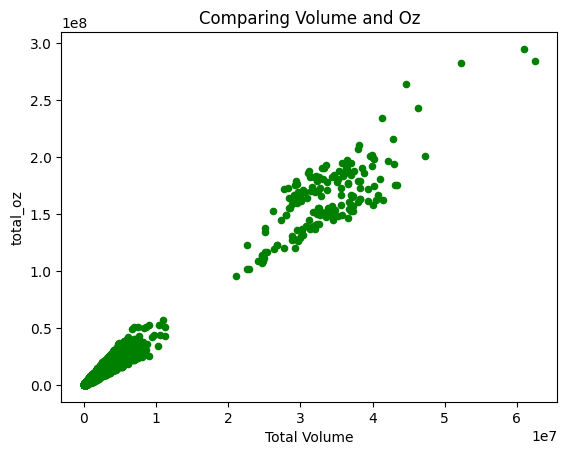

In [376]:
avdf.plot.scatter(x='Total Volume', y='total_oz', title='Comparing Volume and Oz', color='green')

In [ ]:
#Here from the above scatterplot it is clear that there is strong correlation between Total Volume and total_oz

<Axes: title={'center': 'AveragePrice and Oz'}, xlabel='total_oz', ylabel='AveragePrice'>

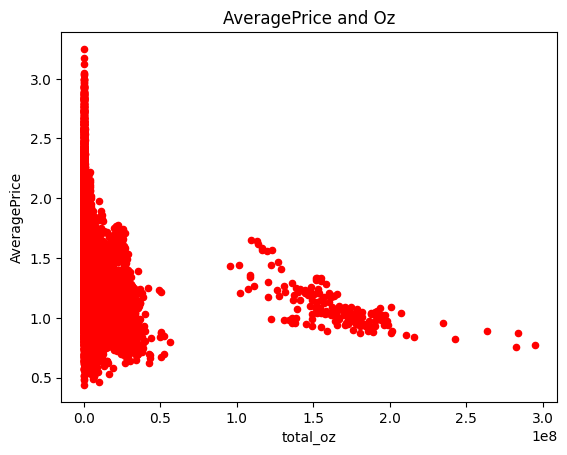

In [236]:
avdf.plot.scatter(x='total_oz', y='AveragePrice', title='AveragePrice and Oz', color='red')

In [237]:
avdf.plot.scatter(x='Total Volume', y='Total Bags', title='Comparing Volume and Total Bags', color='green')

<Axes: title={'center': 'Comparing Volume and Total Bags'}, xlabel='Total Volume', ylabel='Total Bags'>

In [ ]:
#Here from the above scatterplot it is clear that if total bags increases Total volume also increases

In [377]:
avdf.plot.scatter(x='Total Volume', y='Small Bags', title='Comparing Volume and Small Bags', color='blue')

<Axes: title={'center': 'Comparing Volume and Small Bags'}, xlabel='Total Volume', ylabel='Small Bags'>

In [18]:
#Here from the above scatterplot it is clear that if small  bags increases Total volume also increases

<Axes: title={'center': 'Comparing Volume and Large Bags'}, xlabel='Total Volume', ylabel='Large Bags'>

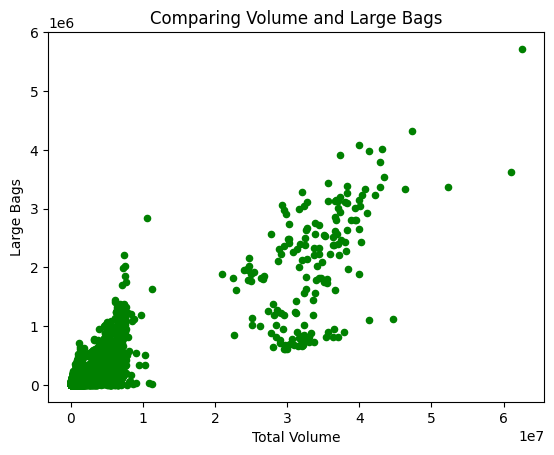

In [239]:
avdf.plot.scatter(x='Total Volume', y='Large Bags', title='Comparing Volume and Large Bags', color='green')

In [ ]:
#Here from the above plot it is not clear as the no of large bags increase total volume also increases

<Axes: title={'center': 'Comparing Total Bags and Price'}, xlabel='Total Bags', ylabel='AveragePrice'>

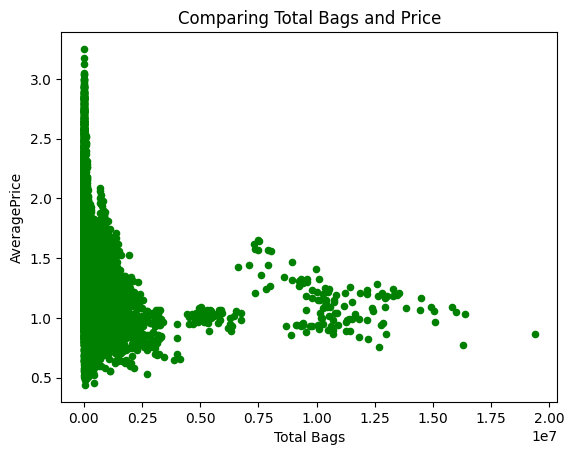

In [20]:
avdf.plot.scatter(x='Total Bags', y='AveragePrice', title='Comparing Total Bags and Price', color='green')

In [13]:
avdf.plot.scatter(x='Large Bags', y='AveragePrice', title='Comparing Large Bags and Price', color='green')

<Axes: title={'center': 'Comparing Large Bags and Price'}, xlabel='Large Bags', ylabel='AveragePrice'>

In [ ]:
#From above sactter plot it is clear the there is no correlation between bag count and AveragePrice

In [21]:
plt.figure(figsize=(10,6))
mean_region=avdf.groupby('region')['AveragePrice'].mean().sort_values(ascending =False)
mean_region.plot(kind='bar')

<Axes: xlabel='region'>

<Axes: xlabel='region'>

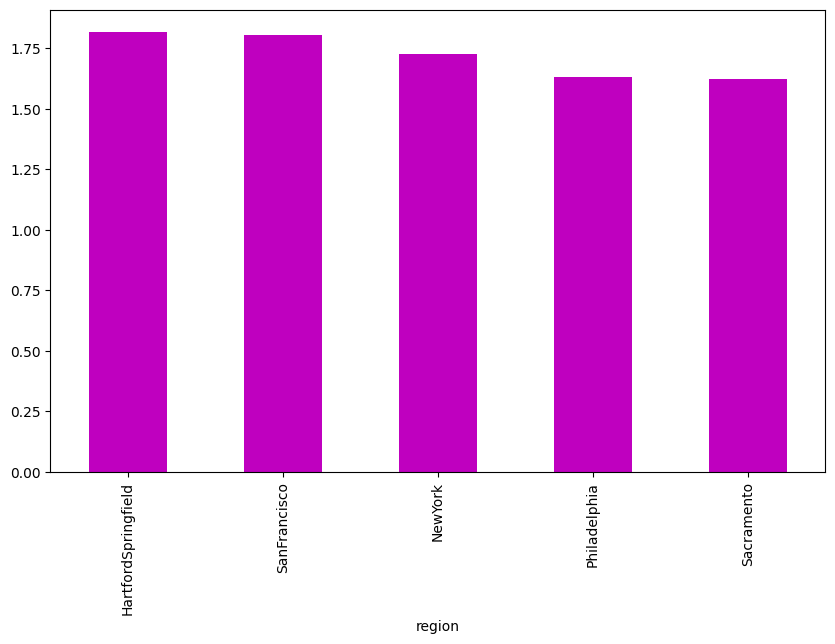

In [22]:
plt.figure(figsize=(10,6))
mean_region=avdf.groupby('region')['AveragePrice'].mean().sort_values(ascending =False)
top_5_region=mean_region.head(5)
top_5_region.plot(kind='bar',color='m')

In [ ]:
# here from the above observation by conclude that the top five region where average price of avocado is high

In [21]:
plt.figure(figsize=(10,6))
mean_year=avdf.groupby('month')['AveragePrice'].mean().sort_values(ascending =False)
mean_year.plot(kind='bar',color='m')

<Axes: xlabel='month'>

In [23]:
plt.figure(figsize=(10,6))
region_volume_sales=avdf.groupby('region')['Total Volume'].max()
region_volume_sales.sort_values(ascending=False).plot(kind='bar',color='g')

<Axes: xlabel='region'>

<Axes: title={'center': 'Comparing Dates and Volume'}, xlabel='month', ylabel='Total Volume'>

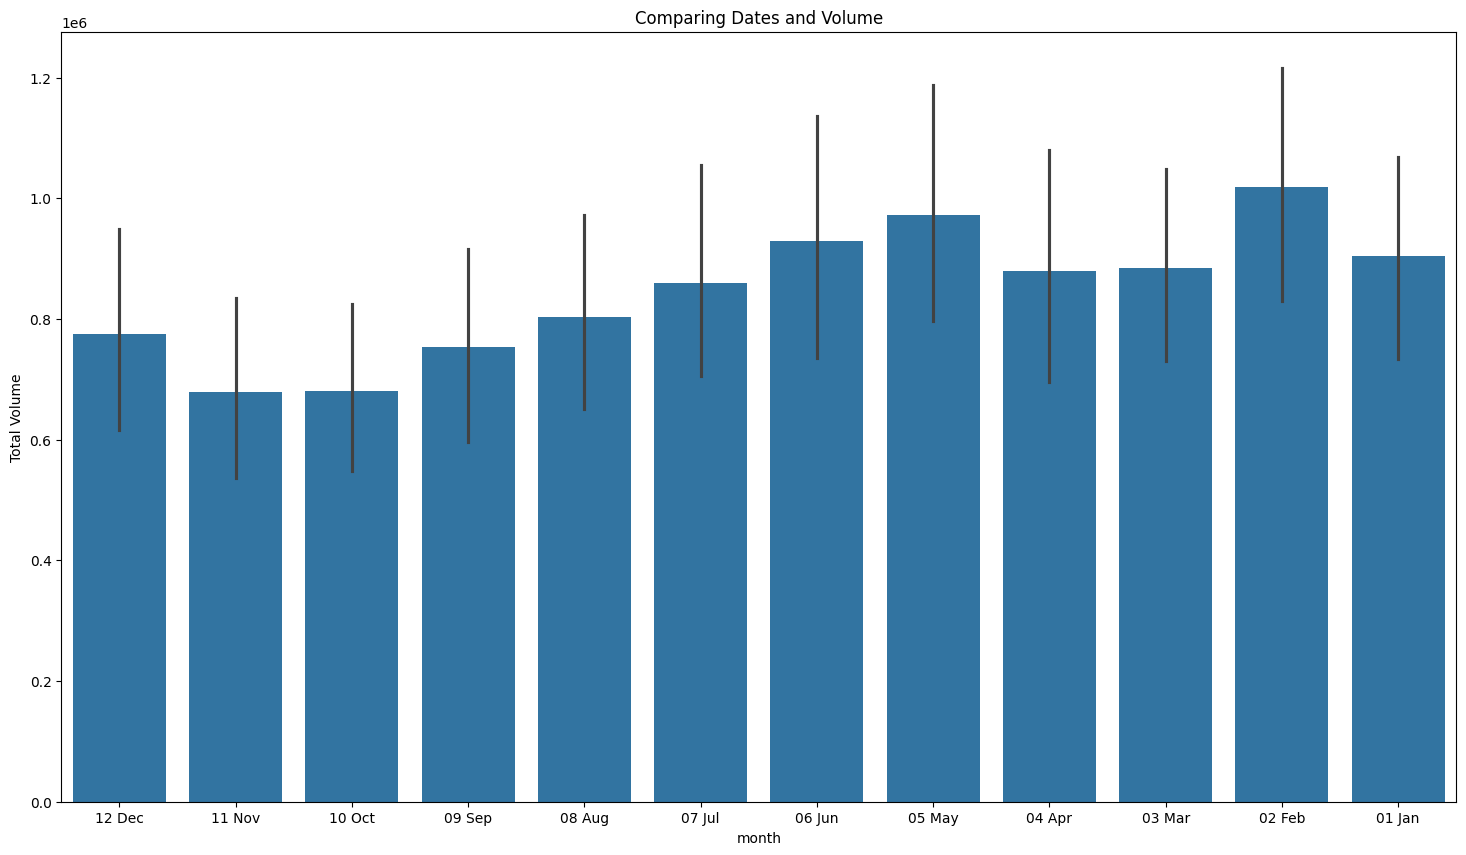

In [24]:
plt.figure(figsize=(18,10))
plt.title('Comparing Dates and Volume')
sns.barplot(data=avdf, x='month', y='Total Volume')


<Axes: title={'center': 'Comparing Dates and Price'}, xlabel='month', ylabel='AveragePrice'>

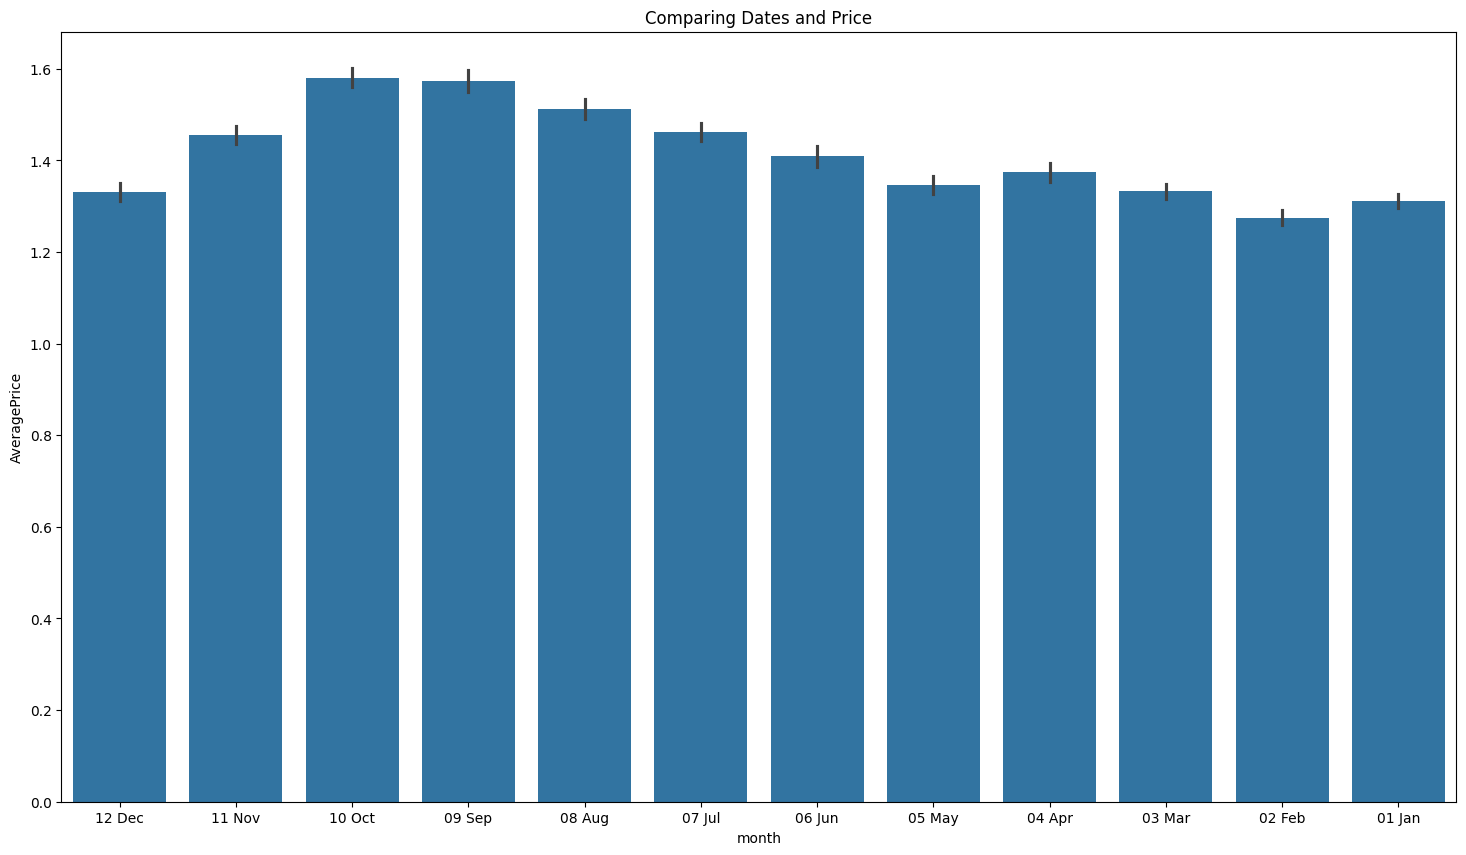

In [23]:
plt.figure(figsize=(18,10))
plt.title('Comparing Dates and Price')
sns.barplot(data=avdf, x='month', y='AveragePrice')

In [ ]:
#Here from the above observation it is clear that as the decrease in fall of months averagePrice ofavocado increases

In [385]:
avdf

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region   month  Day    total_oz      revenue  
0                Albany  12 Dec   27  494842.610   85434.7046  
1                Albany  12 Dec   20  405175.535   74083.9230  
2                Albany  12 Dec   13  987157.080  109944.8046  
3                Albany  12 Dec    6  653222.940   85311.5220  
4                Albany  11 Nov   29  399258.680   65330.6880  
...                 ...     ...  ...         ...          ...  
18244  WestTexNewMexico  02 Feb    4   21950.640   27831.9729  
18245  WestTexNewMexico  01 Jan   28   35650.300   23748.5484  
18246  WestTexNewMexico  01 Jan   21   35942.040   25743.8412  
18247  WestTexNewMexico  01 Jan   14   42027.505   31276.0746  
18248  WestTexNewMexico  01 Jan    7   35590.875   28333.1196  

[18249 rows x 16 columns]

In [386]:
avdf['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [387]:
super_region = {'Albany': 'NorthEast', 'Atlanta': 'SouthEast', 'BaltimoreWashington': 'NorthEast', 'Boise': 'Mountains', 
                'Boston': 'NorthEast',
       'BuffaloRochester': 'NorthEast', 'California': 'WestCoast', 'Charlotte': 'SouthEast', 'Chicago': 'MidWest',
       'CincinnatiDayton': 'MidWest', 'Columbus': 'MidWest', 'DallasFtWorth': 'SouthEast', 'Denver': 'Mountains',
       'Detroit': 'MidWest', 'GrandRapids': 'MidWest', 'GreatLakes': 'MidWest', 'HarrisburgScranton': 'NorthEast',
       'HartfordSpringfield': 'NorthEast', 'Houston': 'SouthEast', 'Indianapolis': 'MidWest', 'Jacksonville': 'SouthEast',
       'LasVegas': 'SouthWest', 'LosAngeles': 'WestCoast', 'Louisville': 'MidWest', 'MiamiFtLauderdale': 'SouthEast',
       'Midsouth': 'SouthEast', 'Nashville': 'SouthEast', 'NewOrleansMobile': 'SouthEast', 'NewYork': 'NorthEast',
       'Northeast': 'NorthEast', 'NorthernNewEngland': 'NorthEast', 'Orlando': 'SouthEast', 'Philadelphia': 'NorthEast',
       'PhoenixTucson': 'SouthWest', 'Pittsburgh': 'NorthEast', 'Plains': 'MidWest', 'Portland': 'WestCoast',
       'RaleighGreensboro': 'SouthEast', 'RichmondNorfolk': 'SouthEast', 'Roanoke': 'SouthEast', 'Sacramento': 'WestCoast',
       'SanDiego': 'WestCoast', 'SanFrancisco': 'WestCoast', 'Seattle': 'WestCoast', 'SouthCarolina': 'SouthEast',
       'SouthCentral': 'SouthEast', 'Southeast': 'SouthEast', 'Spokane': 'WestCoast', 'StLouis': 'Midwest', 'Syracuse': 'NorthEast',
       'Tampa': 'SouthEast', 'TotalUS': 'TotalUS', 'West': 'WestCoast', 'WestTexNewMexico': 'SouthWest'}
avdf['super_region'] = avdf['region'].replace(super_region)


In [388]:
avdf.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region   month  \
0     8603.62       93.25          0.0  conventional  2015  Albany  12 Dec   
1     9408.07       97.49          0.0  conventional  2015  Albany  12 Dec   
2     8042.21      103.14          0.0  conventional  2015  Albany  12 Dec   
3     5677.40      133.76          0.0  conventional  2015  Albany  12 Dec   
4     5986.26      197.69          0.0  conventional  2015  Albany  11 Nov   

   Day    total_oz      revenue super_region  
0   27  494842.610   85434.7046    NorthEast  
1   20  405175.535   74083.9230    NorthEast  
2   13  987157.080  109944.8046    NorthEast  
3    6  653222.940   85311.5220    NorthEast  
4   29  399258.680   65330.6880    NorthEast

In [317]:
plt.figure(figsize=(18,10))
plt.title('Comparing Regions and Volume')
sns.barplot(data=avdf, x='super_region', y='Total Volume')

<Axes: title={'center': 'Comparing Regions and Volume'}, xlabel='super_region', ylabel='Total Volume'>

In [ ]:
# Here from the above plot we observed that TotalUS creating a problem for us in not getting enough insights so make it samll

<Axes: title={'center': 'Comparing Regions and Volume'}, xlabel='super_region', ylabel='Total Volume'>

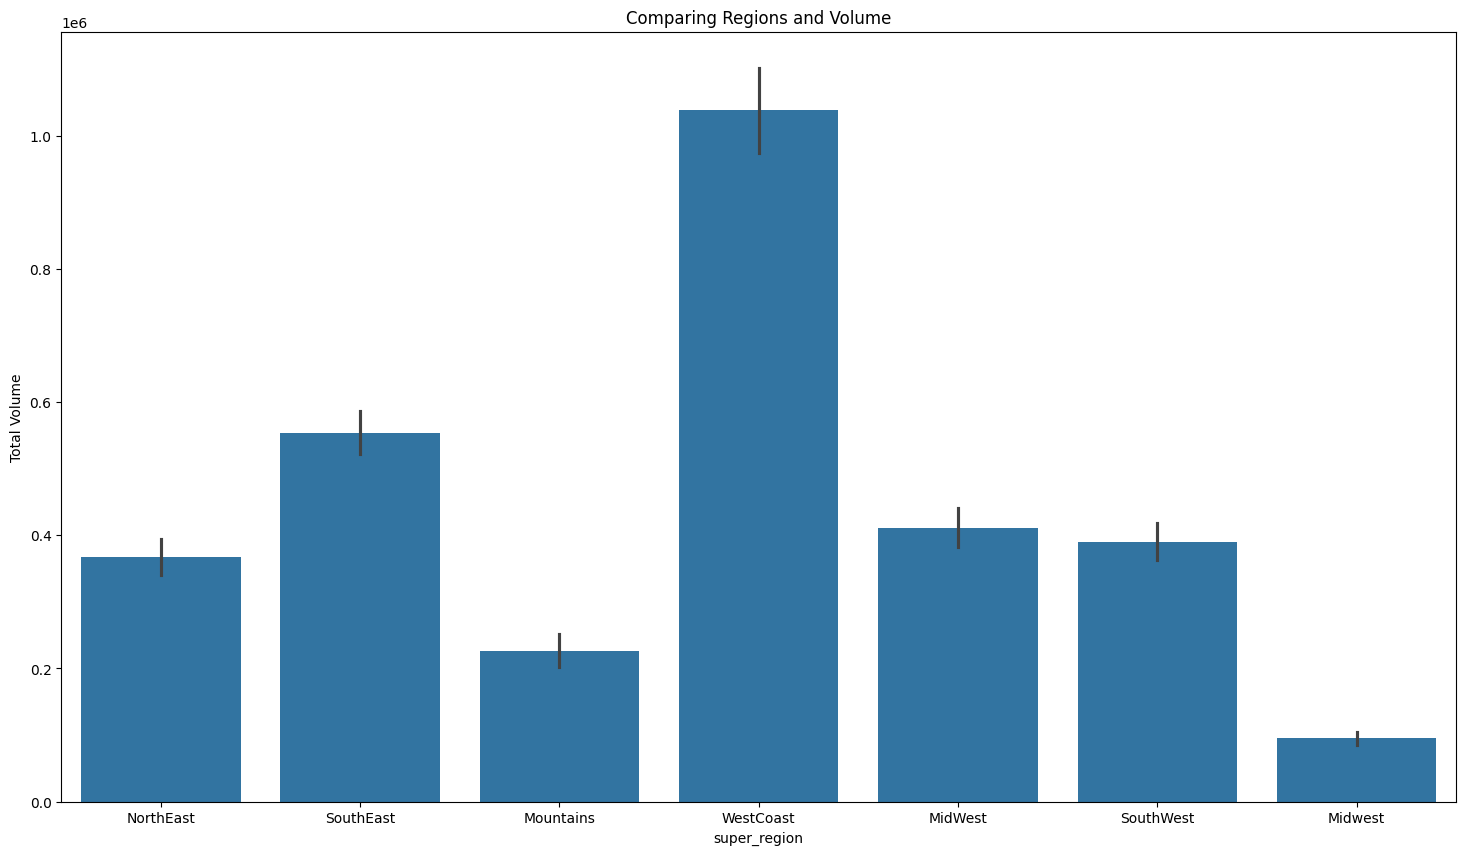

In [318]:
plt.figure(figsize=(18,10))
plt.title('Comparing Regions and Volume')
sns.barplot(data=avdf[avdf['super_region'] != 'TotalUS'], x='super_region', y='Total Volume')

In [378]:
for i in avdf.columns:
    print(avdf[i].value_counts())

Date
2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: count, Length: 169, dtype: int64
AveragePrice
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: count, Length: 259, dtype: int64
Total Volume
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: count, Length: 18237, dtype: int64
4046
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: count, Length: 17702, dtype: int64
4225
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1


In [389]:
avdf['month'].value_counts()

month
01 Jan    1944
03 Mar    1836
02 Feb    1728
10 Oct    1512
07 Jul    1512
05 May    1512
11 Nov    1404
08 Aug    1404
04 Apr    1404
12 Dec    1403
09 Sep    1296
06 Jun    1294
Name: count, dtype: int64

In [26]:
avdf['year'].value_counts()

year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

<Axes: xlabel='month'>

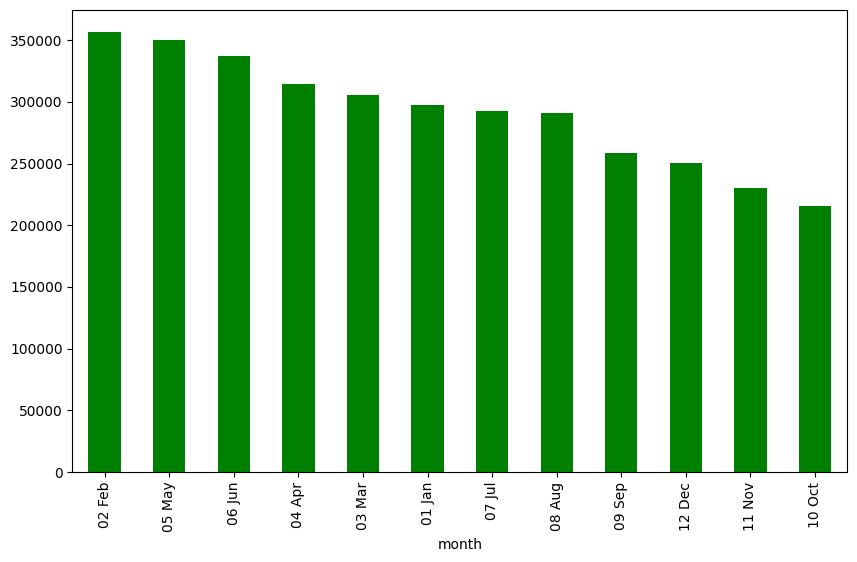

In [246]:
plt.figure(figsize=(10,6))
mean_sales=avdf.groupby('month')['4046'].mean()
mean_sales.sort_values(ascending=False).plot(kind='bar',color='g')

In [247]:
plt.figure(figsize=(10,6))
mean_sales=avdf.groupby('region')['4225'].mean()
mean_sales.sort_values(ascending=False).plot(kind='bar',color='g')

<Axes: xlabel='region'>

Text(0, 0.5, 'PLU -4225')

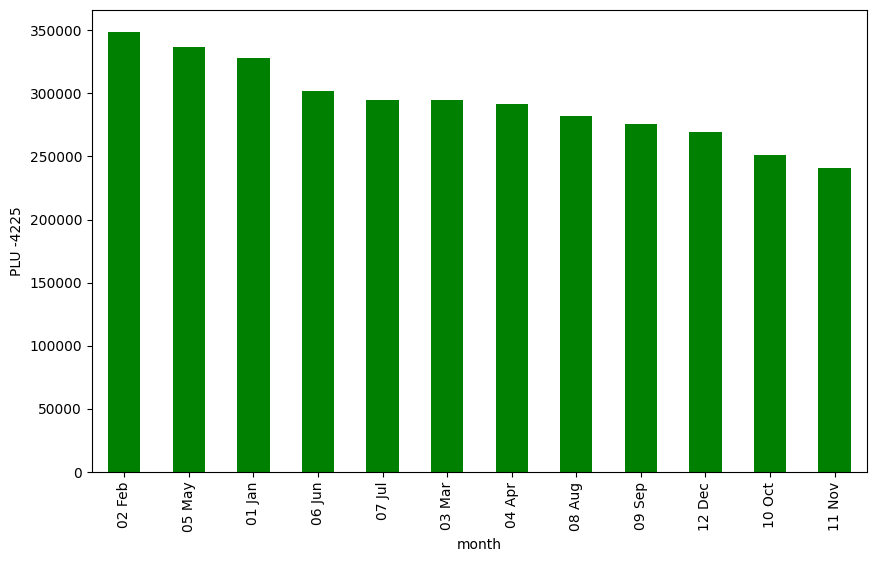

In [29]:
plt.figure(figsize=(10,6))
mean_sales=avdf.groupby('month')['4225'].mean()
mean_sales.sort_values(ascending=False).plot(kind='bar',color='g')
plt.ylabel('PLU -4225')

Text(0, 0.5, 'PLU -4770')

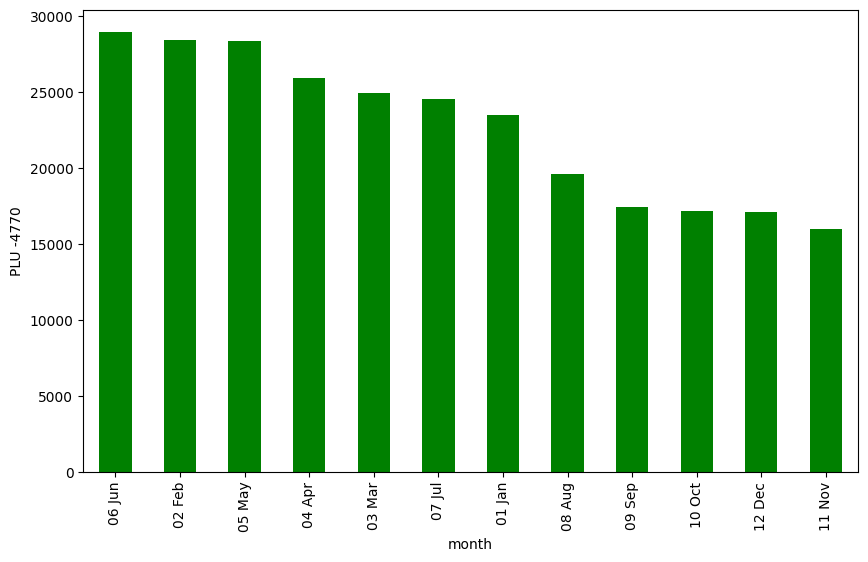

In [55]:
plt.figure(figsize=(10,6))
mean_sales=avdf.groupby('month')['4770'].mean()
mean_sales.sort_values(ascending=False).plot(kind='bar',color='g')
plt.ylabel('PLU -4770')

<Axes: xlabel='type'>

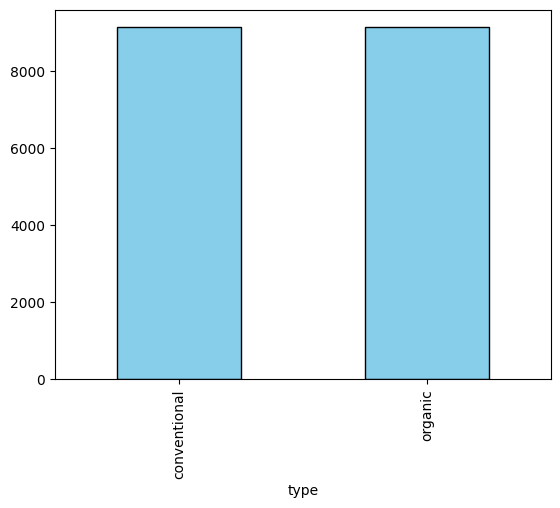

In [43]:
avdf['type'].value_counts().plot(kind='bar',color='skyblue', edgecolor='black')

In [31]:
avdf['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

<Axes: xlabel='type'>

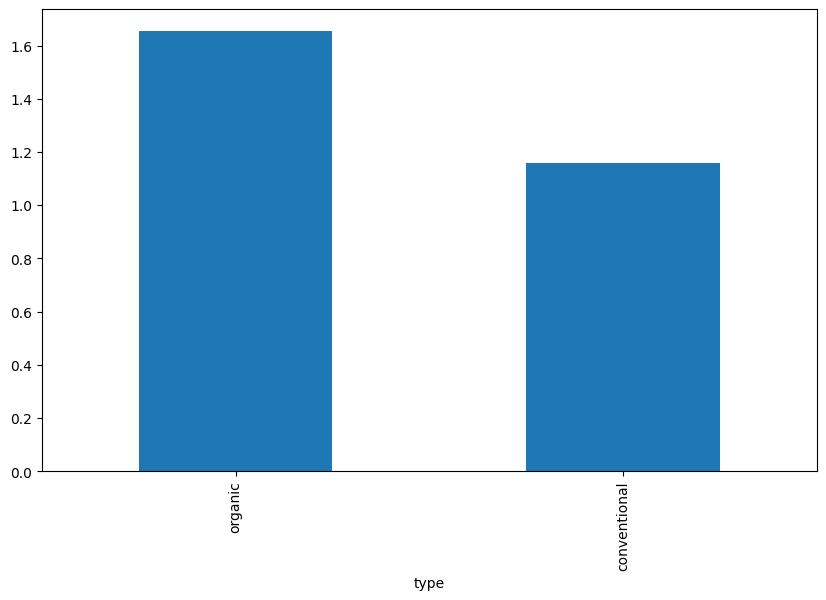

In [32]:
plt.figure(figsize=(10,6))
mean_price_type=avdf.groupby('type')['AveragePrice'].mean()
mean_price_type.sort_values(ascending=False).plot(kind='bar')

<Axes: xlabel='type'>

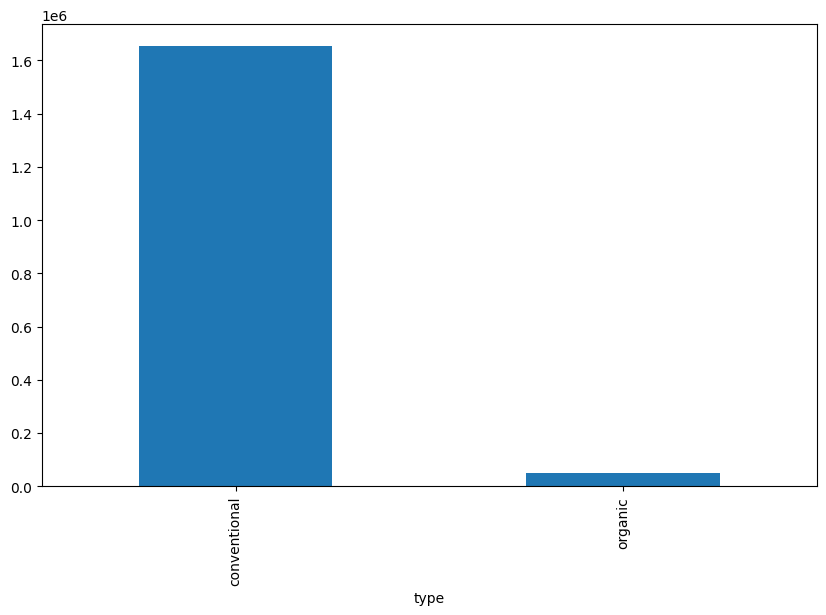

In [33]:
plt.figure(figsize=(10,6))
mean_volume_type=avdf.groupby('type')['Total Volume'].mean()
mean_volume_type.sort_values(ascending=False).plot(kind='bar')

In [390]:
avdf['revenue'] = avdf['AveragePrice']*avdf['Total Volume']

In [ ]:
#avdf.drop('Unnamed: 0',axis=1,inplace=True)

In [391]:
avdf

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region   month  Day    total_oz      revenue super_region  
0                Albany  12 Dec   27  494842.610   85434.7046    NorthEast  
1                Albany  12 Dec   20  405175.535   74083.9230    NorthEast  
2                Albany  12 Dec   13  987157.080  109944.8046    NorthEast  
3                Albany  12 Dec    6  653222.940   85311.5220    NorthEast  
4                Albany  11 Nov   29  399258.680   65330.6880    NorthEast  
...                 ...     ...  ...         ...          ...          ...  
18244  WestTexNewMexico  02 Feb    4   21950.640   27831.9729    SouthWest  
18245  WestTexNewMexico  01 Jan   28   35650.300   23748.5484    SouthWest  
18246  WestTexNewMexico  01 Jan   21   35942.040   25743.8412    SouthWest  
18247  WestTexNewMexico  01 Jan   14   42027.505   31276.0746    SouthWest  
18248  WestTexNewMexico  01 Jan    7   35590.875   28333.1196    SouthWest  

[18249 rows x 17 columns]

In [381]:
avdf.drop('Date',axis=1,inplace=True)

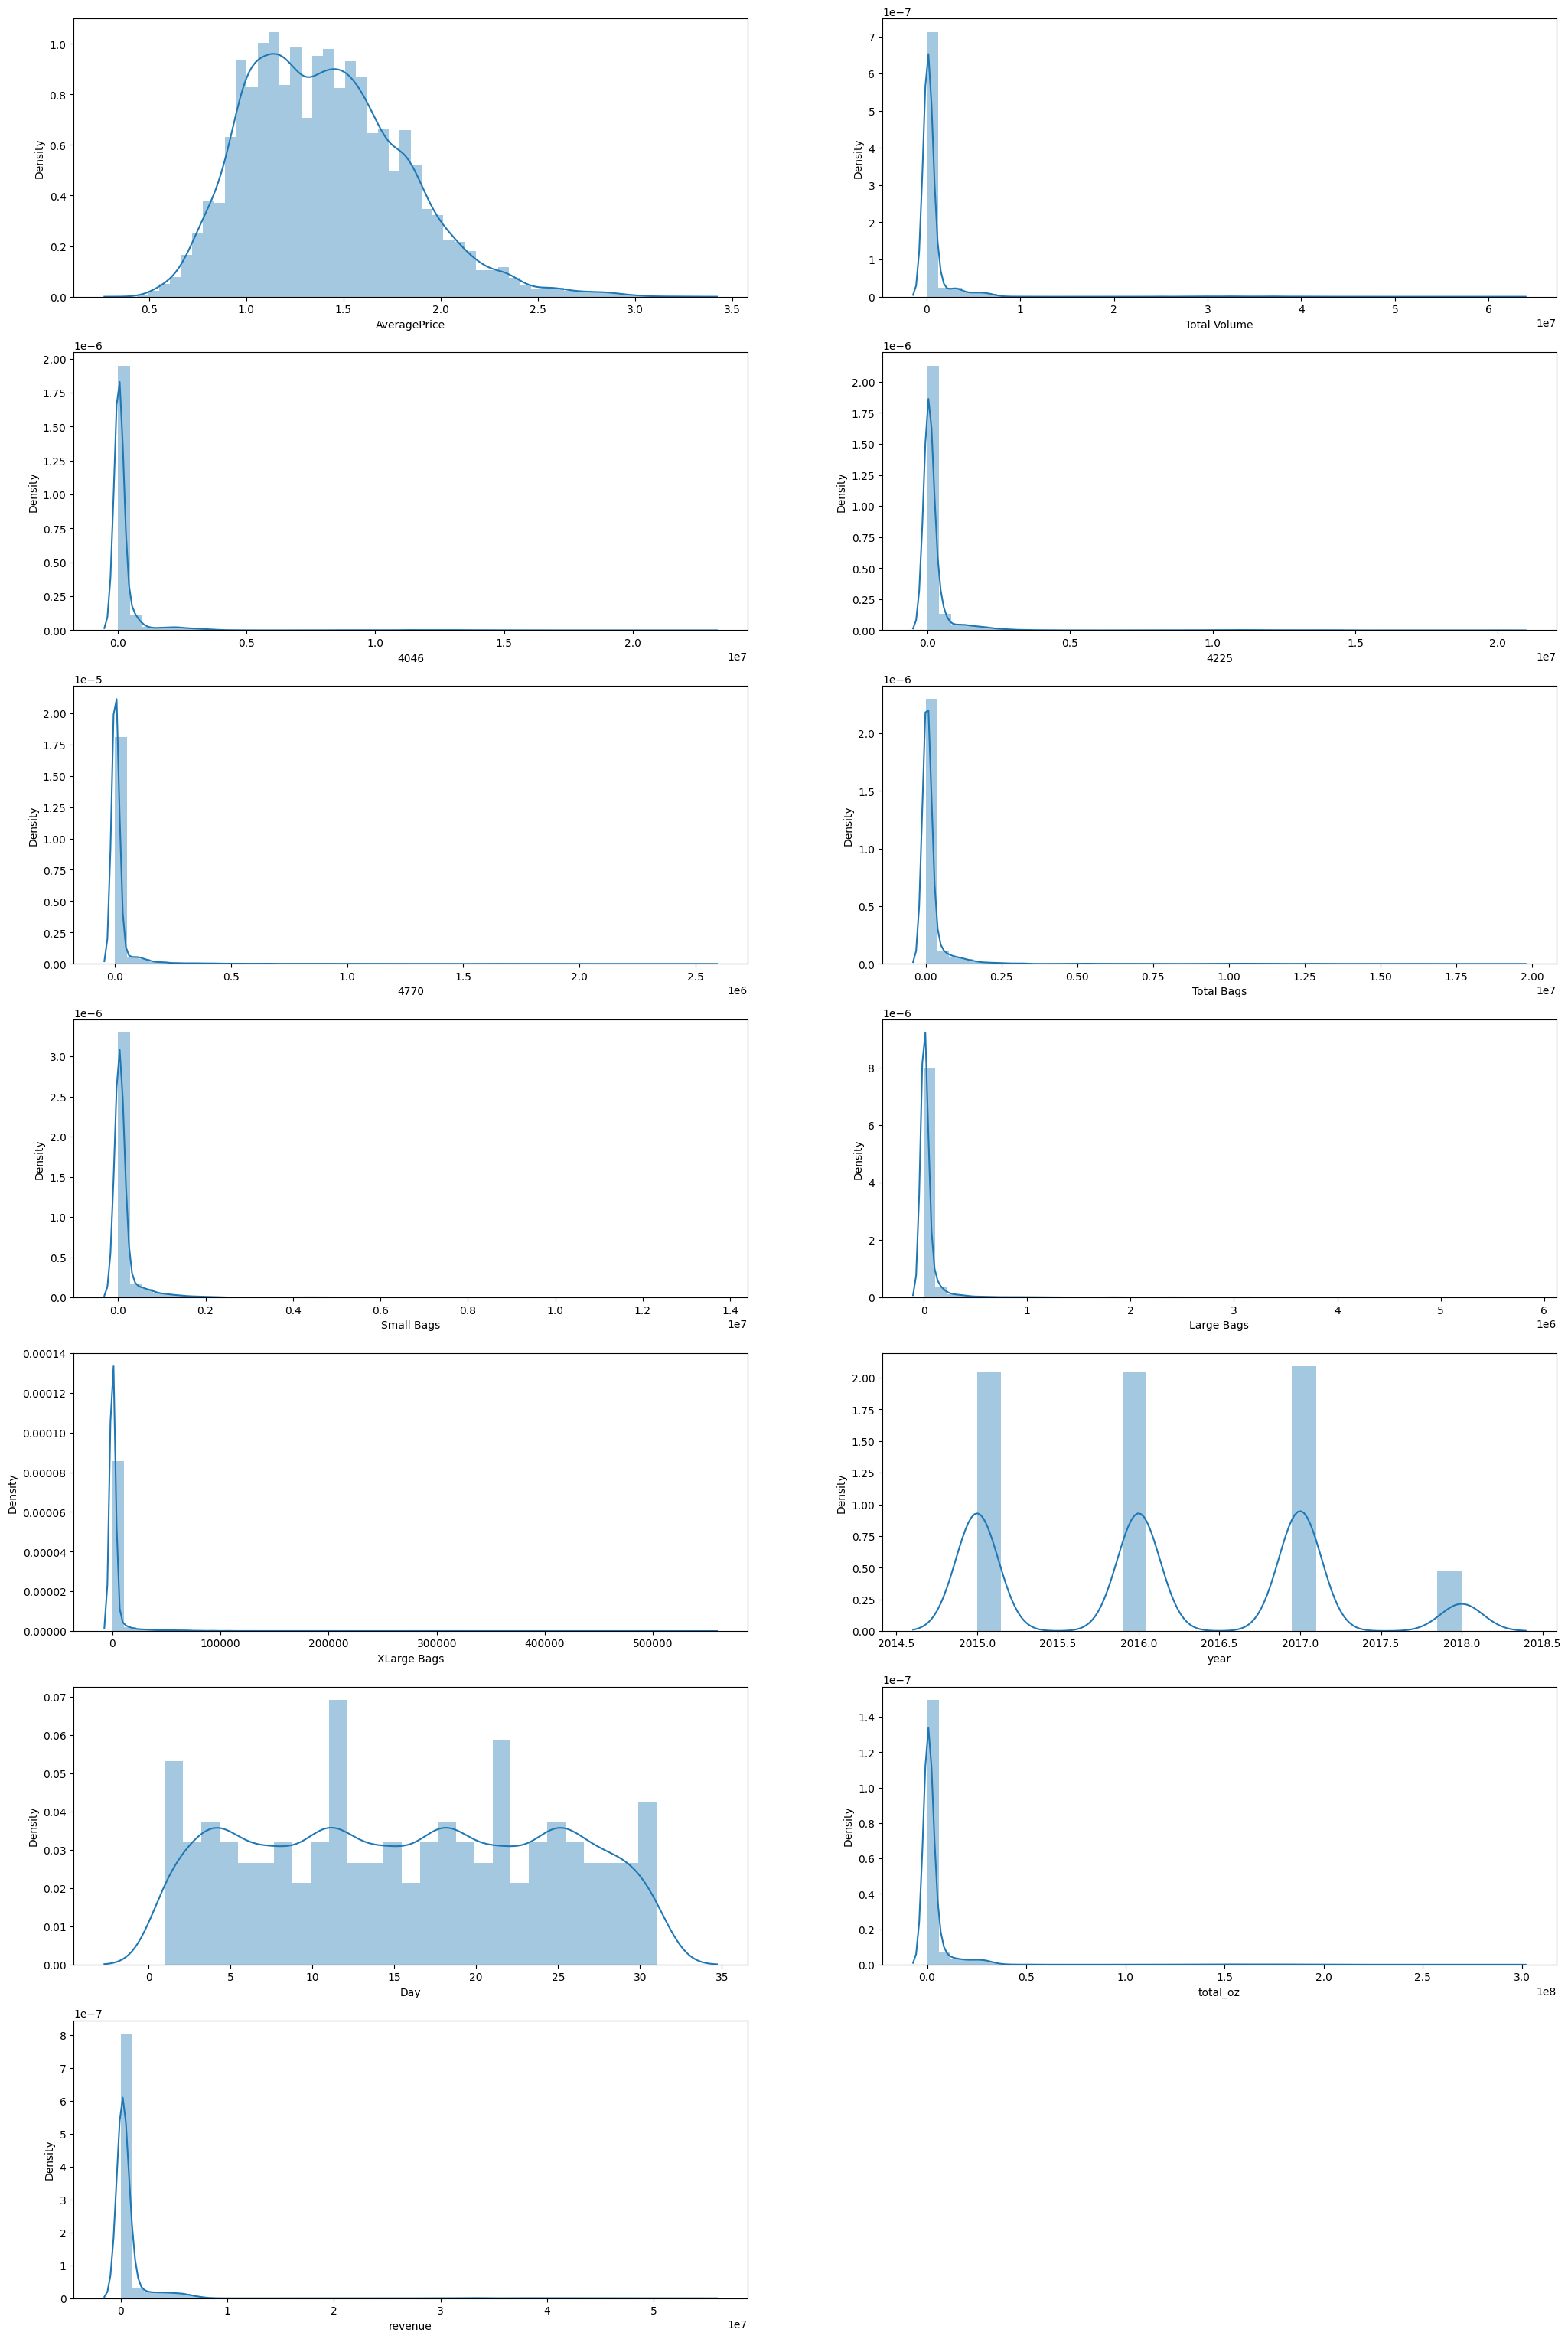

In [393]:
plt.figure(figsize=(25,50))
category_df=avdf.drop(['type','region','month','super_region'],axis=1)
counter=1
for i in category_df.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.distplot(category_df[i])
        counter+=1
plt.show()

In [ ]:
plt.figure(figsize=(25,50))
category_num=avdf.drop(['type','region','super_region'],axis=1)
counter=1
for i in category_num.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.histplot(category_num[i])
        counter+=1
plt.show()

In [55]:
avdf['month'].dtype

dtype('O')

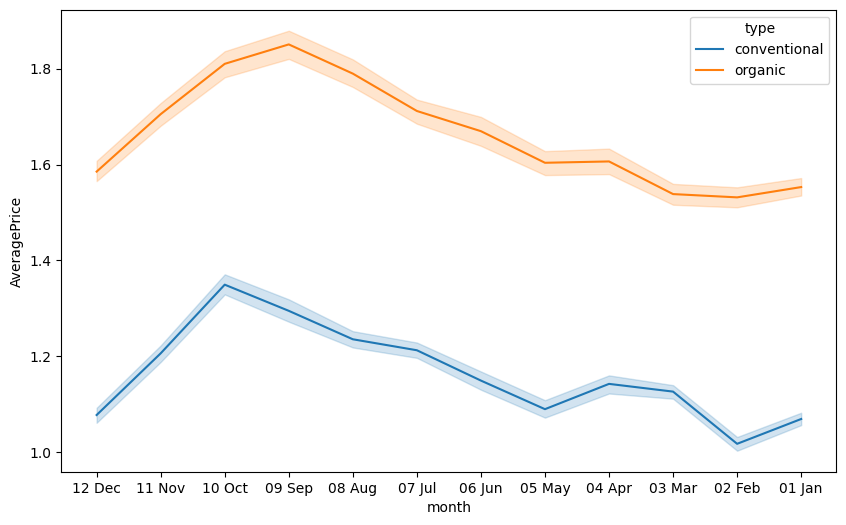

In [56]:
plt.figure(figsize=(10,6))
sns.lineplot(x='month',y='AveragePrice',hue='type',data=avdf)
plt.show()

In [295]:
avdf

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0              1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1              1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2              0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3              1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4              1.28     10.840377  6.848515  10.688288  4.340944    8.729874   
...             ...           ...       ...        ...       ...         ...   
18244          1.63      9.745419  7.624599   7.333154  0.000000    9.510421   
18245          1.71      9.538855  7.083975   8.141044  0.000000    9.134090   
18246          1.87      9.530085  7.084159   7.805389  6.591591    9.147945   
18247          1.93      9.693150  7.332127   8.000363  6.590315    9.302969   
18248          1.62      9.769418  7.971006   7.765200  5.418453    9.393924   

       Small Bags  Large Bags  XLarge Bags  type  year  region  month  Day  \
0        9.060055    4.545951          0.0     0  2015       0     11   27   
1        9.149429    4.589955          0.0     0  2015       0     11   20   
2        8.992584    4.645736          0.0     0  2015       0     11   13   
3        8.644425    4.903495          0.0     0  2015       0     11    6   
4        8.697389    5.291746          0.0     0  2015       0     10   29   
...           ...         ...          ...   ...   ...     ...    ...  ...   
18244    9.477908    6.070391          0.0     1  2018      53      1    4   
18245    9.098407    5.786284          0.0     1  2018      53      0   28   
18246    9.143431    3.768384          0.0     1  2018      53      0   21   
18247    9.298401    3.931826          0.0     1  2018      53      0   14   
18248    9.391757    3.296207          0.0     1  2018      53      0    7   

        total_oz  super_region    revenue  
0      13.111997             3  11.355519  
1      12.912078             3  11.212967  
2      13.802585             3  11.607743  
3      13.389675             3  11.354077  
4      12.897367             3  11.087232  
...          ...           ...        ...  
18244   9.996597             5  10.233977  
18245  10.481541             5  10.075319  
18246  10.489691             5  10.155990  
18247  10.646103             5  10.350641  
18248  10.479873             5  10.251822  

[18249 rows x 17 columns]

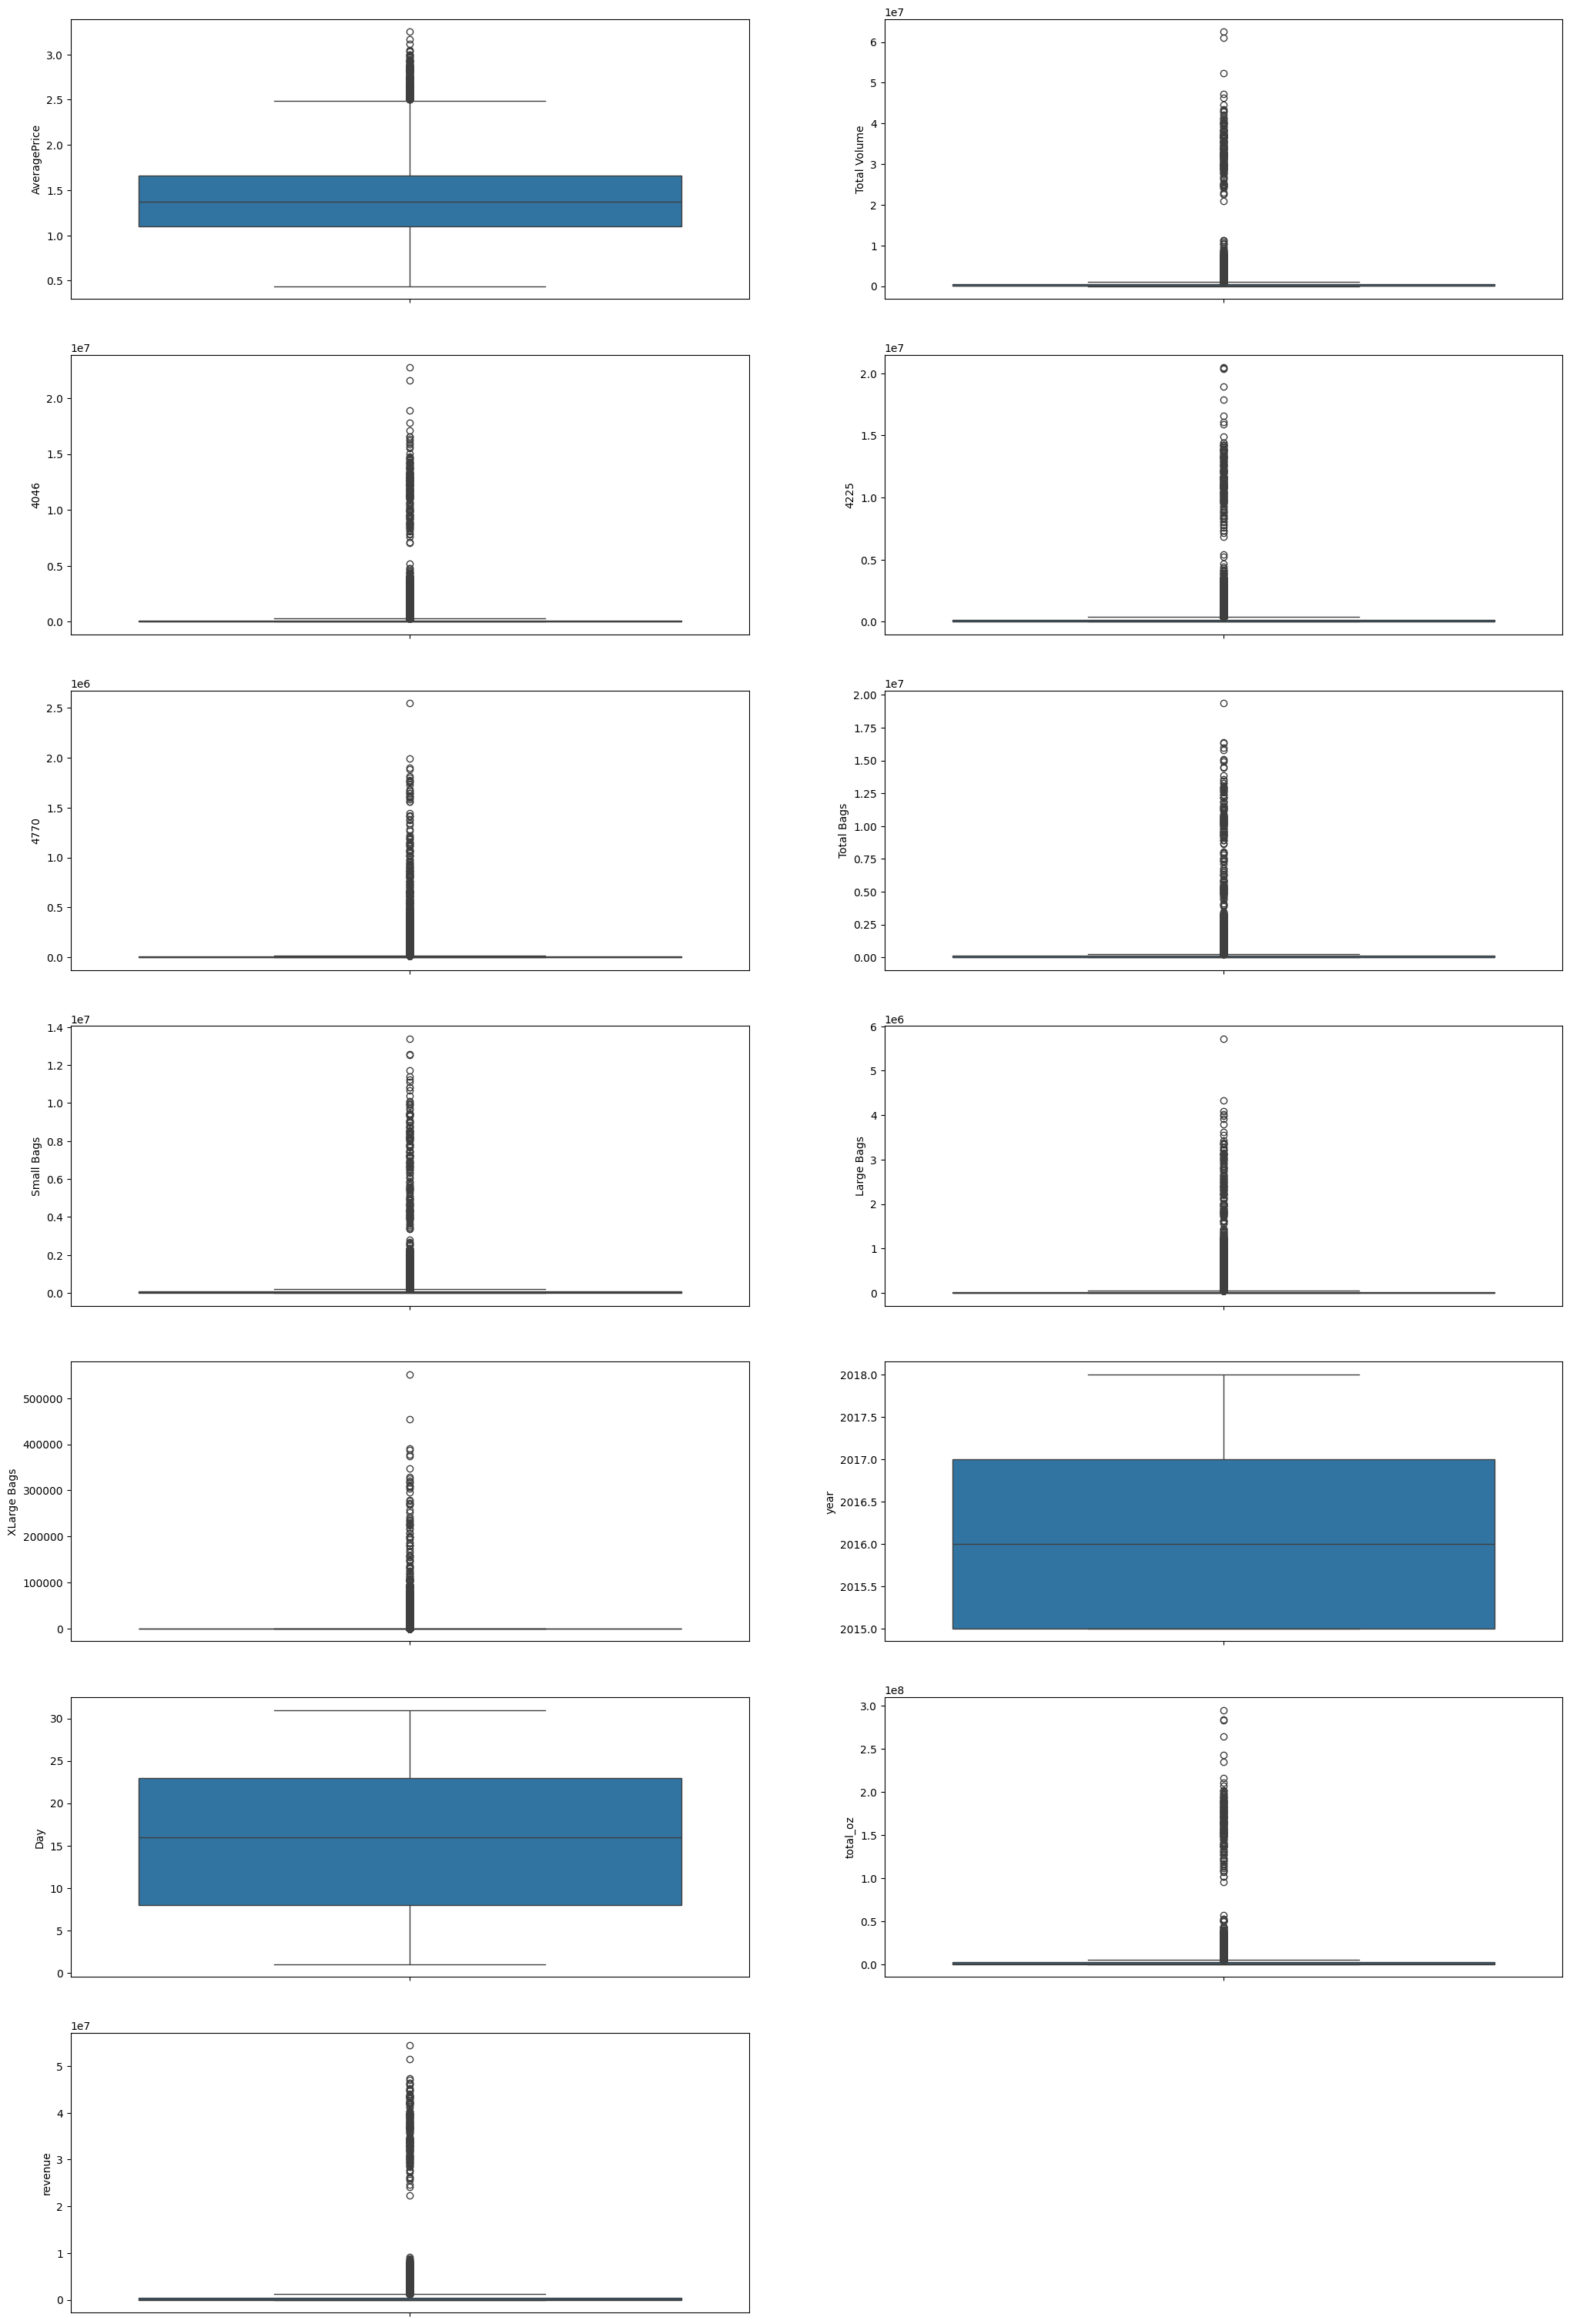

In [395]:
plt.figure(figsize=(25,50))
category_num=avdf.drop(['type','region','super_region','month'],axis=1)
counter=1
for i in category_num.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.boxplot(category_num[i])
        counter+=1
plt.show()

In [ ]:
# Here from the above boxplot we conclude that outliers are present in the features 

In [ ]:
                    EXPLORATORY DATA ANALYSIS COMPLETED

                                    FEATURE ENGINEERING 

In [812]:
# Here i am droping DATE  feature as i have already extracted dayy ,month from date as new feature 
#avdf.drop('Date',axis=1,inplace=True)

In [253]:
avdf.nunique().to_frame('Unique values in the features')

Unique values in the features
AveragePrice                            259
Total Volume                          18237
4046                                  17702
4225                                  18103
4770                                  12071
Total Bags                            18097
Small Bags                            17321
Large Bags                            15082
XLarge Bags                            5588
type                                      2
year                                      4
region                                   54
month                                    12
Day                                      31
total_oz                              18246
super_region                              8
revenue                               18249

In [60]:
# here it will be very difficult to encode it as it has 54 uniqe value
avdf['region'].nunique()

54

In [61]:
avdf['type'].nunique()

2

In [396]:
avdf.duplicated().sum()

0

In [321]:

from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [397]:
le=LabelEncoder()
avdf['type']=le.fit_transform(avdf['type'])

In [398]:
avdf['region']=le.fit_transform(avdf['region'])

In [399]:
avdf['super_region']=le.fit_transform(avdf['super_region'])

In [400]:
avdf['month']=le.fit_transform(avdf['month'])


In [326]:
avdf

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  month  Day  \
0         8603.62       93.25          0.0     0  2015       0     11   27   
1         9408.07       97.49          0.0     0  2015       0     11   20   
2         8042.21      103.14          0.0     0  2015       0     11   13   
3         5677.40      133.76          0.0     0  2015       0     11    6   
4         5986.26      197.69          0.0     0  2015       0     10   29   
...           ...         ...          ...   ...   ...     ...    ...  ...   
18244    13066.82      431.85          0.0     1  2018      53      1    4   
18245     8940.04      324.80          0.0     1  2018      53      0   28   
18246     9351.80       42.31          0.0     1  2018      53      0   21   
18247    10919.54       50.00          0.0     1  2018      53      0   14   
18248    11988.14       26.01          0.0     1  2018      53      0    7   

         total_oz  super_region  
0      494842.610             3  
1      405175.535             3  
2      987157.080             3  
3      653222.940             3  
4      399258.680             3  
...           ...           ...  
18244   21950.640             5  
18245   35650.300             5  
18246   35942.040             5  
18247   42027.505             5  
18248   35590.875             5  

[18249 rows x 16 columns]

In [327]:
avdf['region'].nunique()

54

In [401]:
correlation =avdf.corr()

In [402]:
avdf.corr()['AveragePrice'].sort_values(ascending=False).drop('AveragePrice')


type            0.615845
month           0.162409
year            0.093197
Day             0.027386
super_region    0.014027
region         -0.011716
XLarge Bags    -0.117592
revenue        -0.163061
4225           -0.172928
Large Bags     -0.172940
Small Bags     -0.174730
Total Bags     -0.177088
4770           -0.179446
total_oz       -0.188189
Total Volume   -0.192752
4046           -0.208317
Name: AveragePrice, dtype: float64

<Axes: >

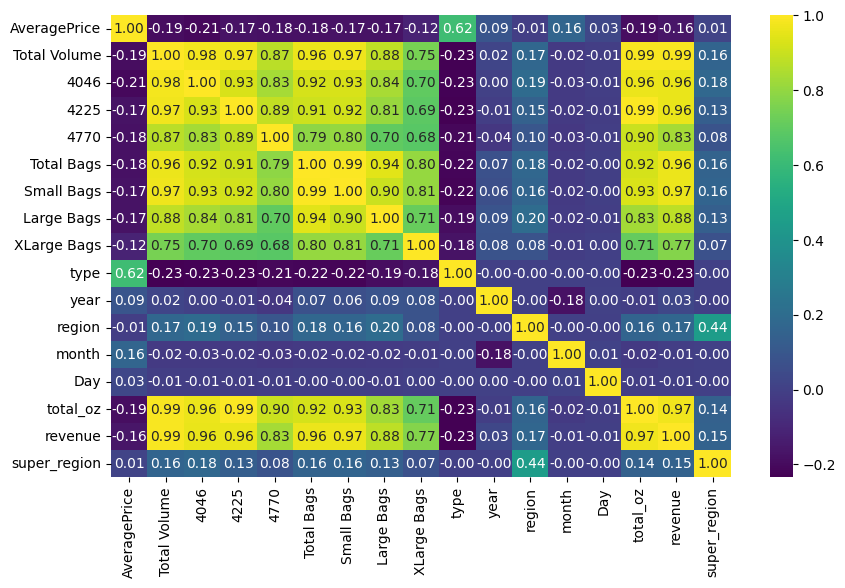

In [403]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot=True,cmap='viridis',fmt='.2f')

In [535]:
#avdf.drop('Date',axis=1,inplace=True)

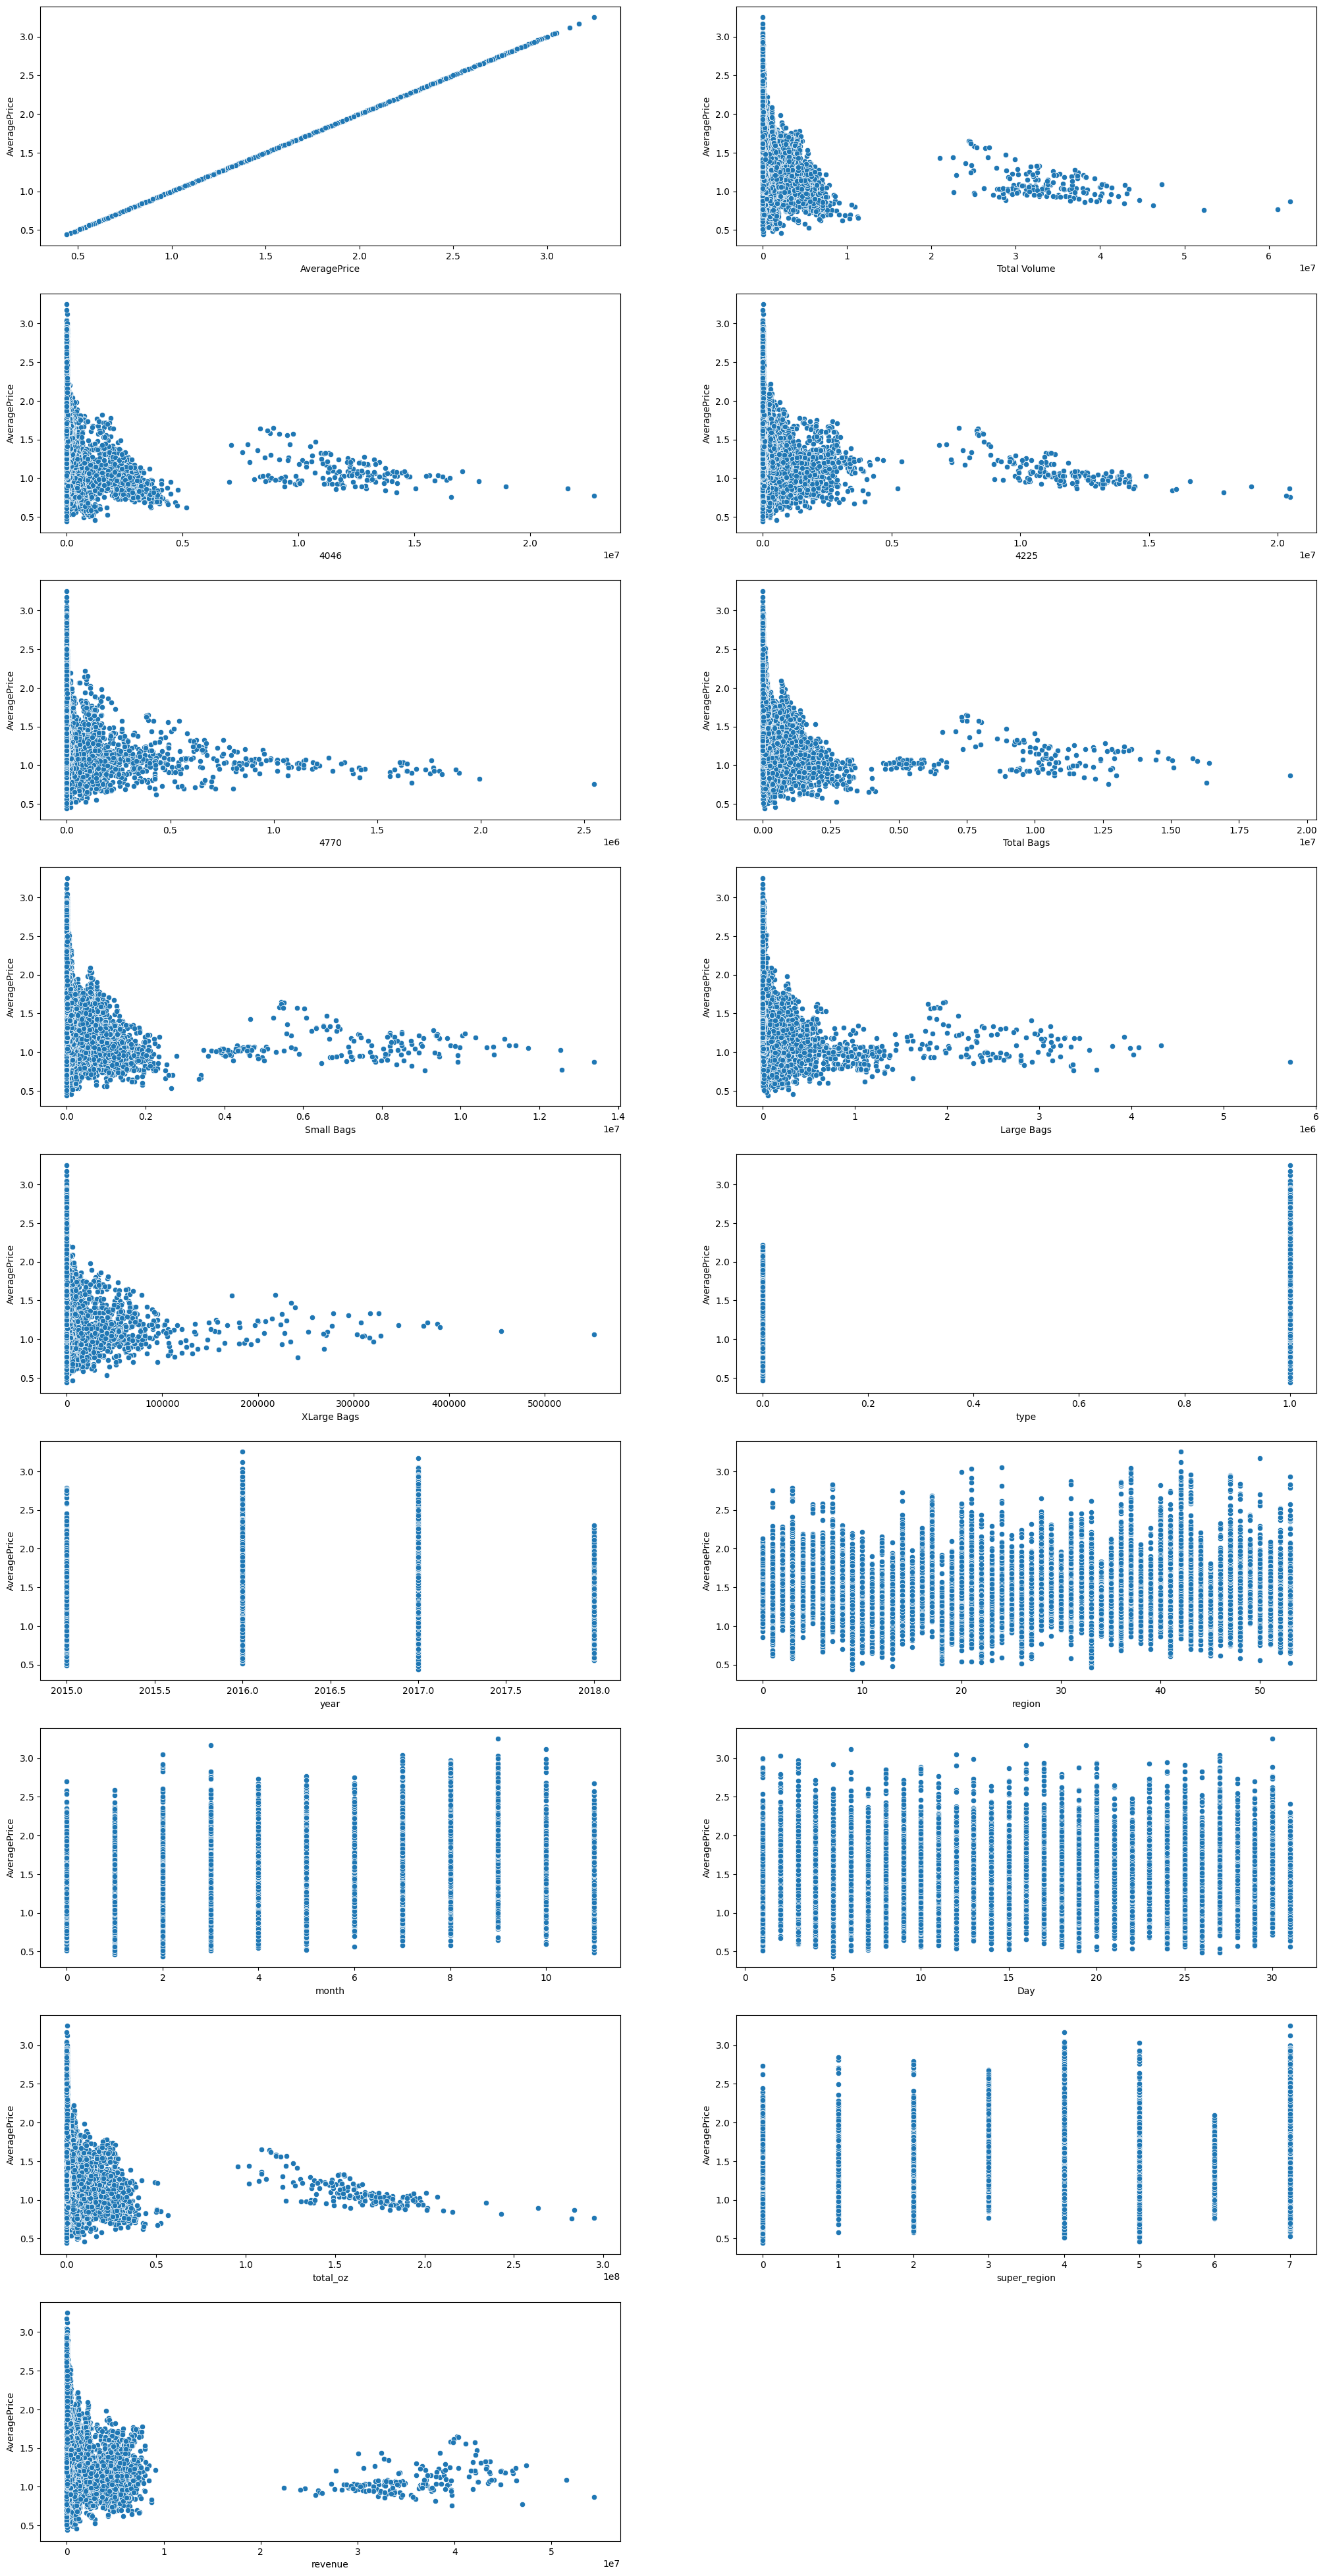

In [48]:
plt.figure(figsize=(25,50))
#category_num=avdf.drop(['type','region'],axis=1)
counter=1
for i in avdf.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.scatterplot(x=avdf[i],y=avdf['AveragePrice'])
        counter+=1
plt.show()

In [49]:
plt.figure(figsize=(25,50))
#category_num=avdf.drop(['type','region'],axis=1)
counter=1
for i in avdf.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.regplot(x=avdf[i],y=avdf['AveragePrice'])
        counter+=1
plt.show()

In [79]:
avdf

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags  type  year  region  Day  month  \
0         8603.62       93.25          0.0     0  2015       0   27     11   
1         9408.07       97.49          0.0     0  2015       0   20     11   
2         8042.21      103.14          0.0     0  2015       0   13     11   
3         5677.40      133.76          0.0     0  2015       0    6     11   
4         5986.26      197.69          0.0     0  2015       0   29     10   
...           ...         ...          ...   ...   ...     ...  ...    ...   
18244    13066.82      431.85          0.0     1  2018      53    4      1   
18245     8940.04      324.80          0.0     1  2018      53   28      0   
18246     9351.80       42.31          0.0     1  2018      53   21      0   
18247    10919.54       50.00          0.0     1  2018      53   14      0   
18248    11988.14       26.01          0.0     1  2018      53    7      0   

         total_oz      revenue  super_region  
0      494842.610   85434.7046             3  
1      405175.535   74083.9230             3  
2      987157.080  109944.8046             3  
3      653222.940   85311.5220             3  
4      399258.680   65330.6880             3  
...           ...          ...           ...  
18244   21950.640   27831.9729             5  
18245   35650.300   23748.5484             5  
18246   35942.040   25743.8412             5  
18247   42027.505   31276.0746             5  
18248   35590.875   28333.1196             5  

[18249 rows x 17 columns]

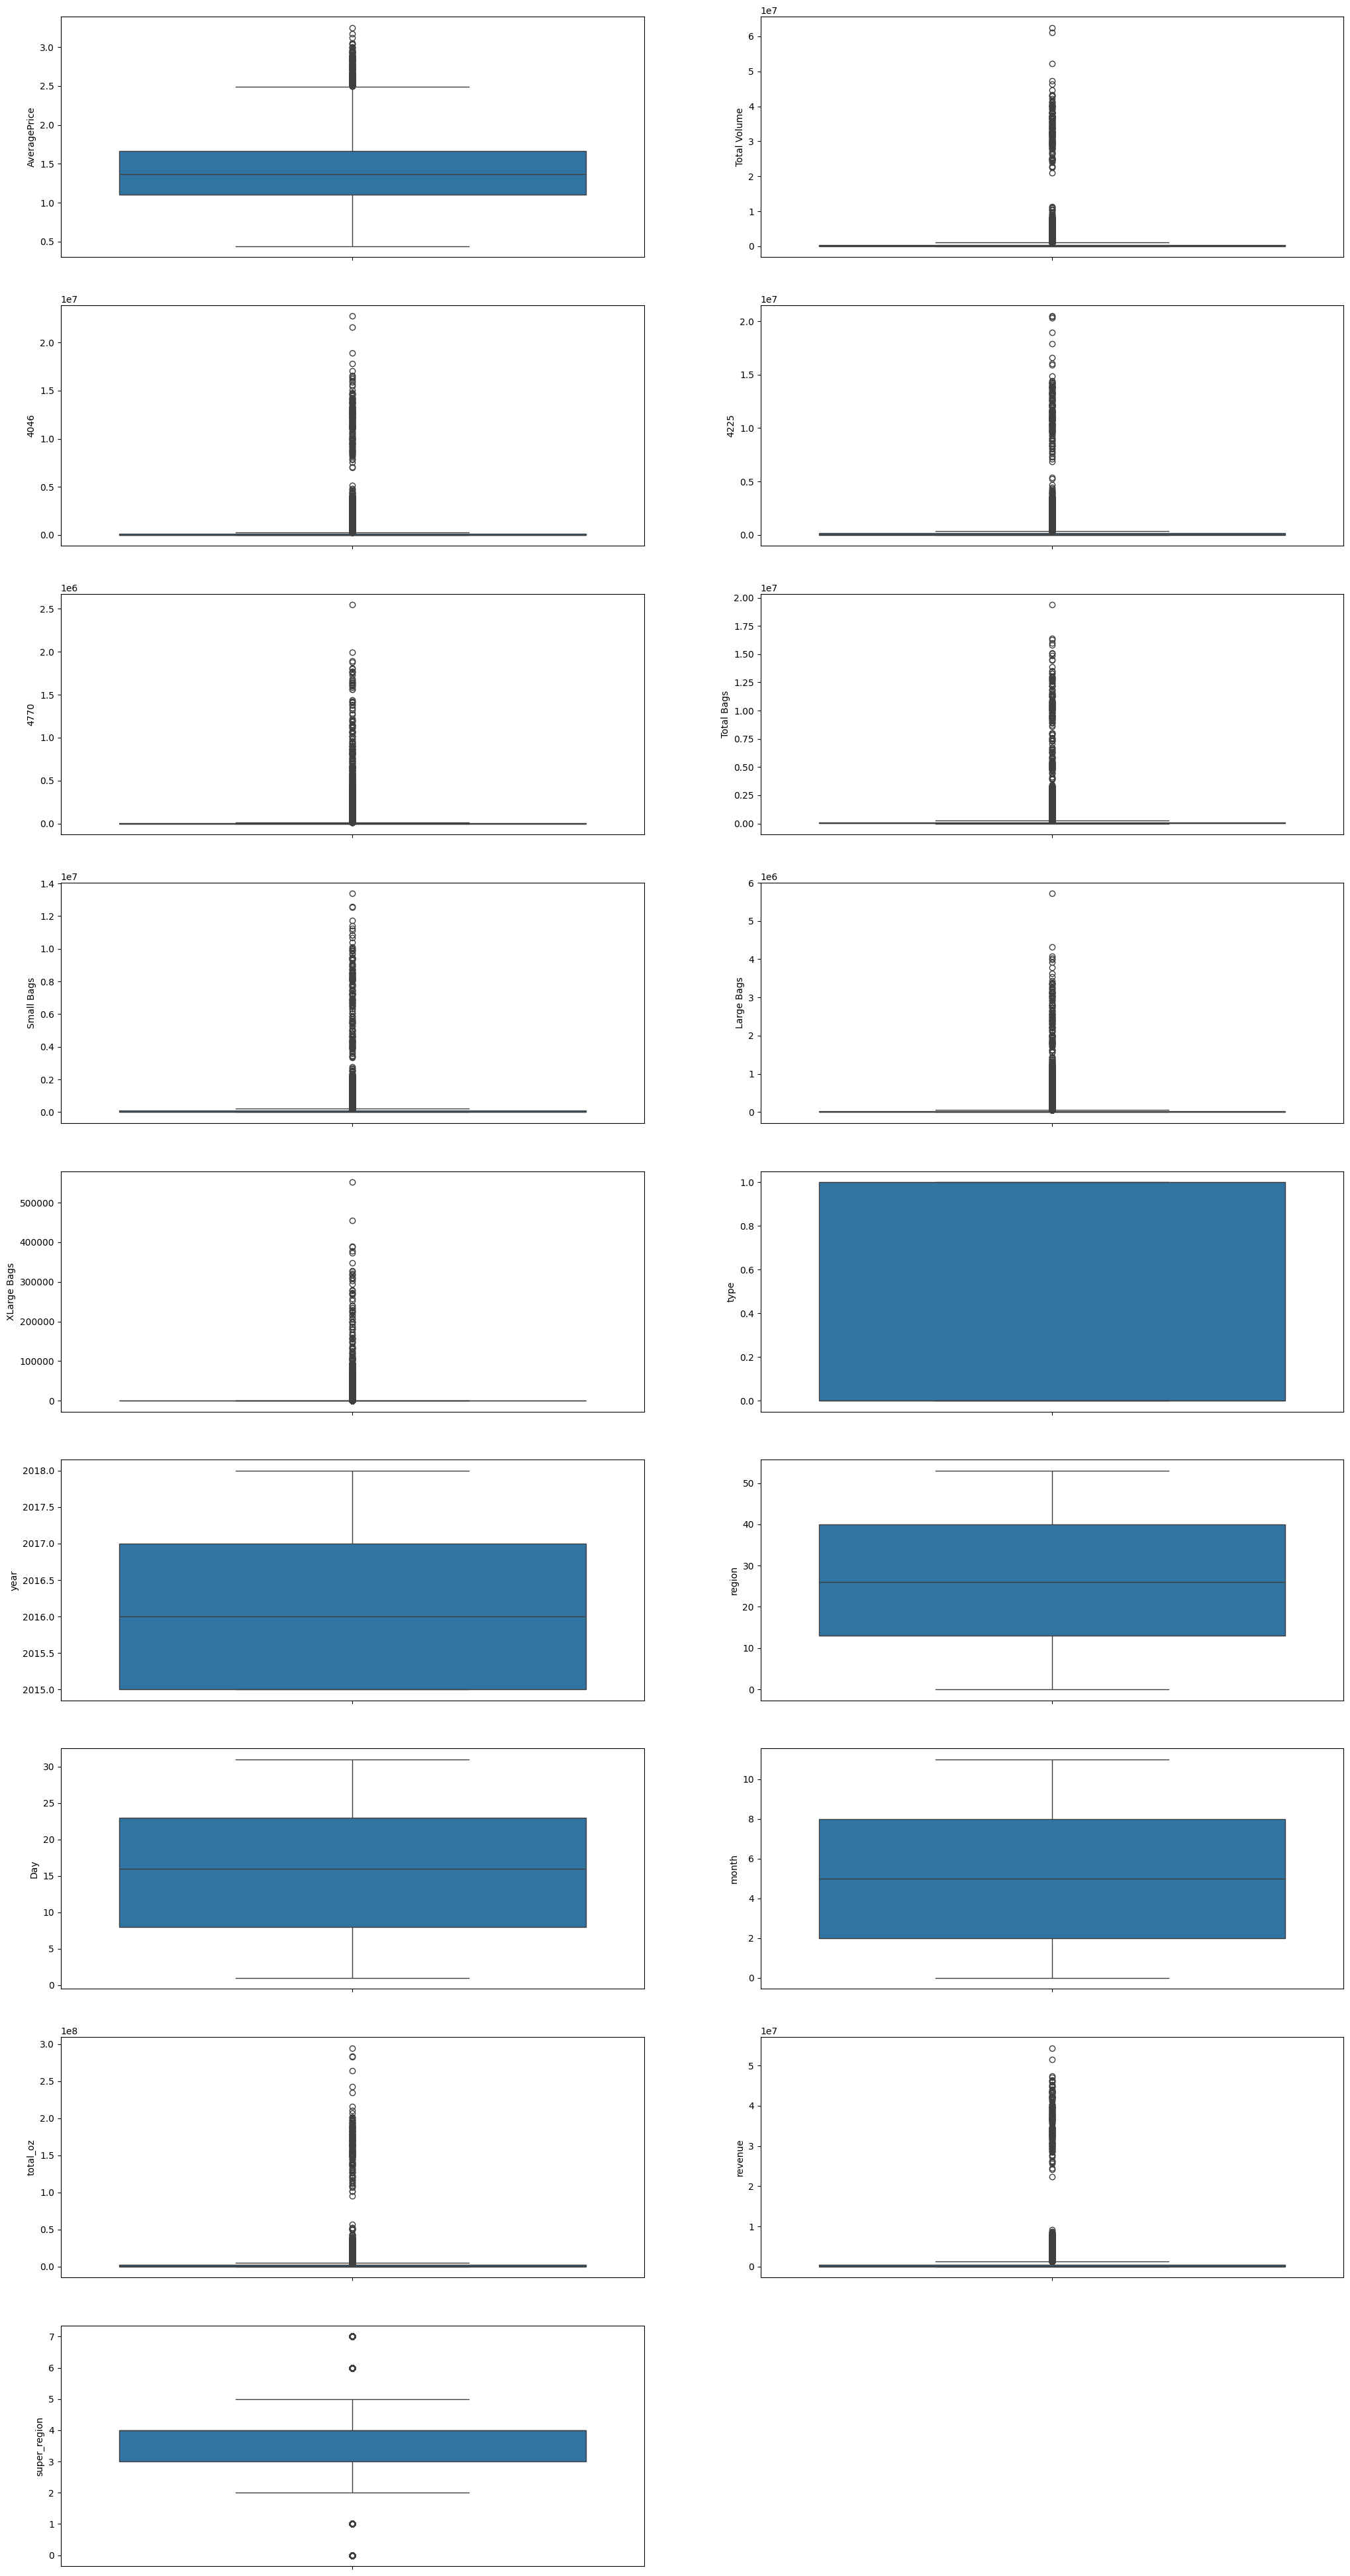

In [78]:
plt.figure(figsize=(25,50))
#category_num=avdf.drop(['type','region'],axis=1)
counter=1
for i in avdf.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.boxplot(avdf[i])
        counter+=1
plt.show()

In [817]:
avdf['XLarge Bags'].value_counts()

XLarge Bags
0.00       12048
3.33          29
6.67          16
1.11          15
5.00          12
           ...  
3018.05        1
2739.44        1
9301.67        1
8640.00        1
24.18          1
Name: count, Length: 5588, dtype: int64

In [818]:
avdf.drop('XLarge Bags',axis=1,inplace=True)

In [404]:
from feature_engine.outliers import ArbitraryOutlierCapper
def remove_outliers(col):
    
    plt.figure(figsize=(20,10))  
#for i in avdf.columns:
    Q1=avdf[col].quantile(0.25)
   # Q2=avdf[i].quantile(0.5)
    Q3=avdf[col].quantile(0.75)
    iqr=Q3-Q1
    lowfence=Q1-1.5*iqr
    uppfence=Q3+1.5*iqr
    print(lowfence)
    print(uppfence)

    arb=ArbitraryOutlierCapper(min_capping_dict={col:lowfence},max_capping_dict={col:uppfence})
    avdf[[col]]=arb.fit_transform(avdf[[col]])
    plt.boxplot(avdf[col])


In [343]:
avdf.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'Day', 'total_oz', 'super_region'],
      dtype='object')

-622346.985
1066147.855
-164395.12499999997
276269.39499999996
-217788.34
371003.98
-9365.130000000001
15608.550000000001
-153453.455
269325.46499999997
-117882.955
204070.04499999998
-32725.199999999997
54881.92
-198.75
331.25
-3072985.7075
5220533.3525
-728376.6610000001
1259732.259


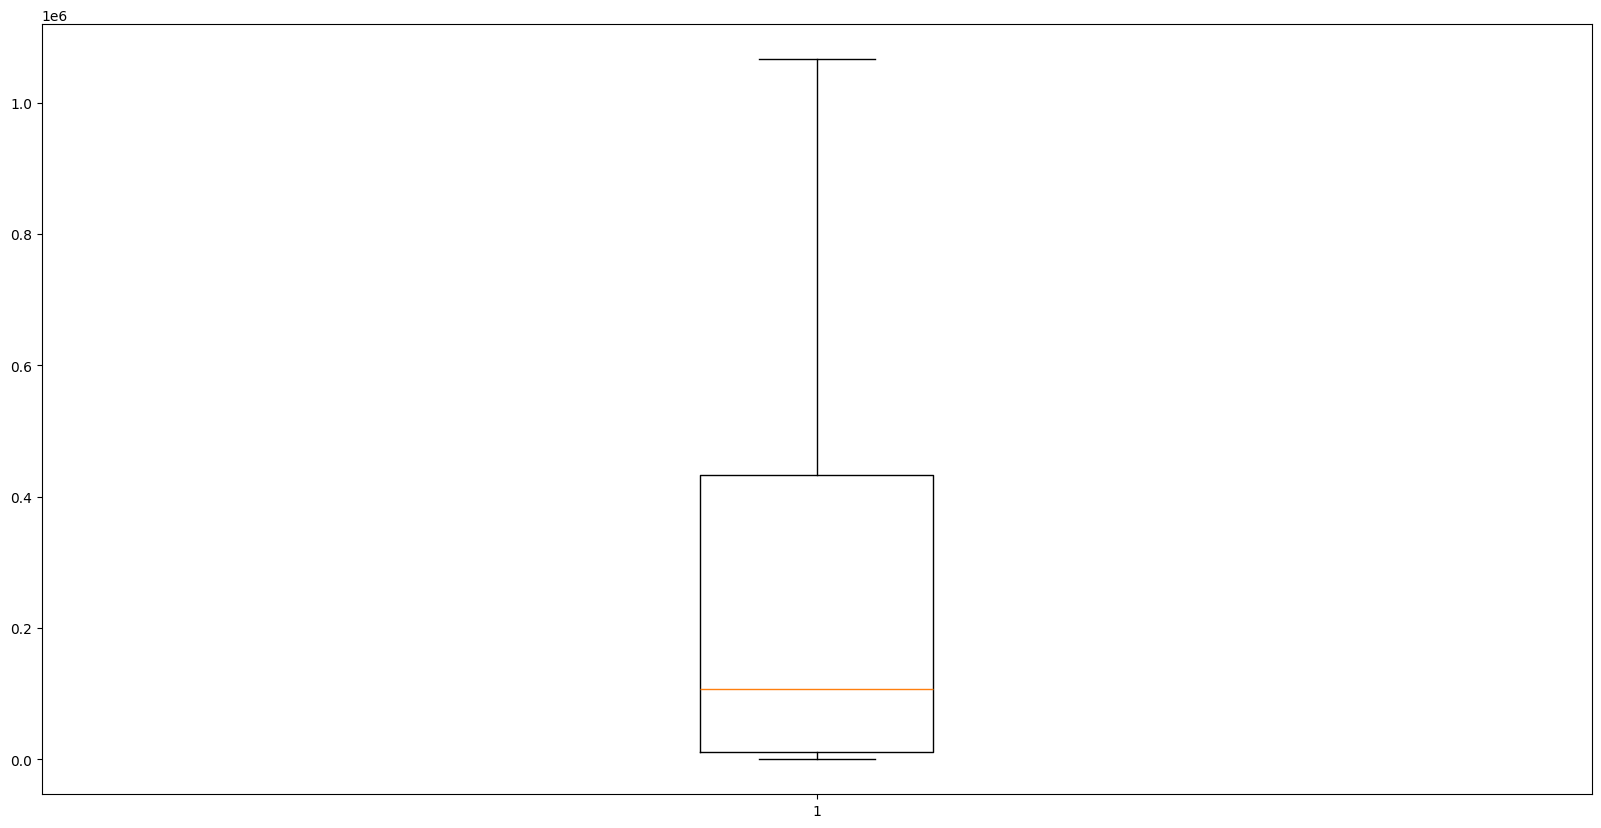

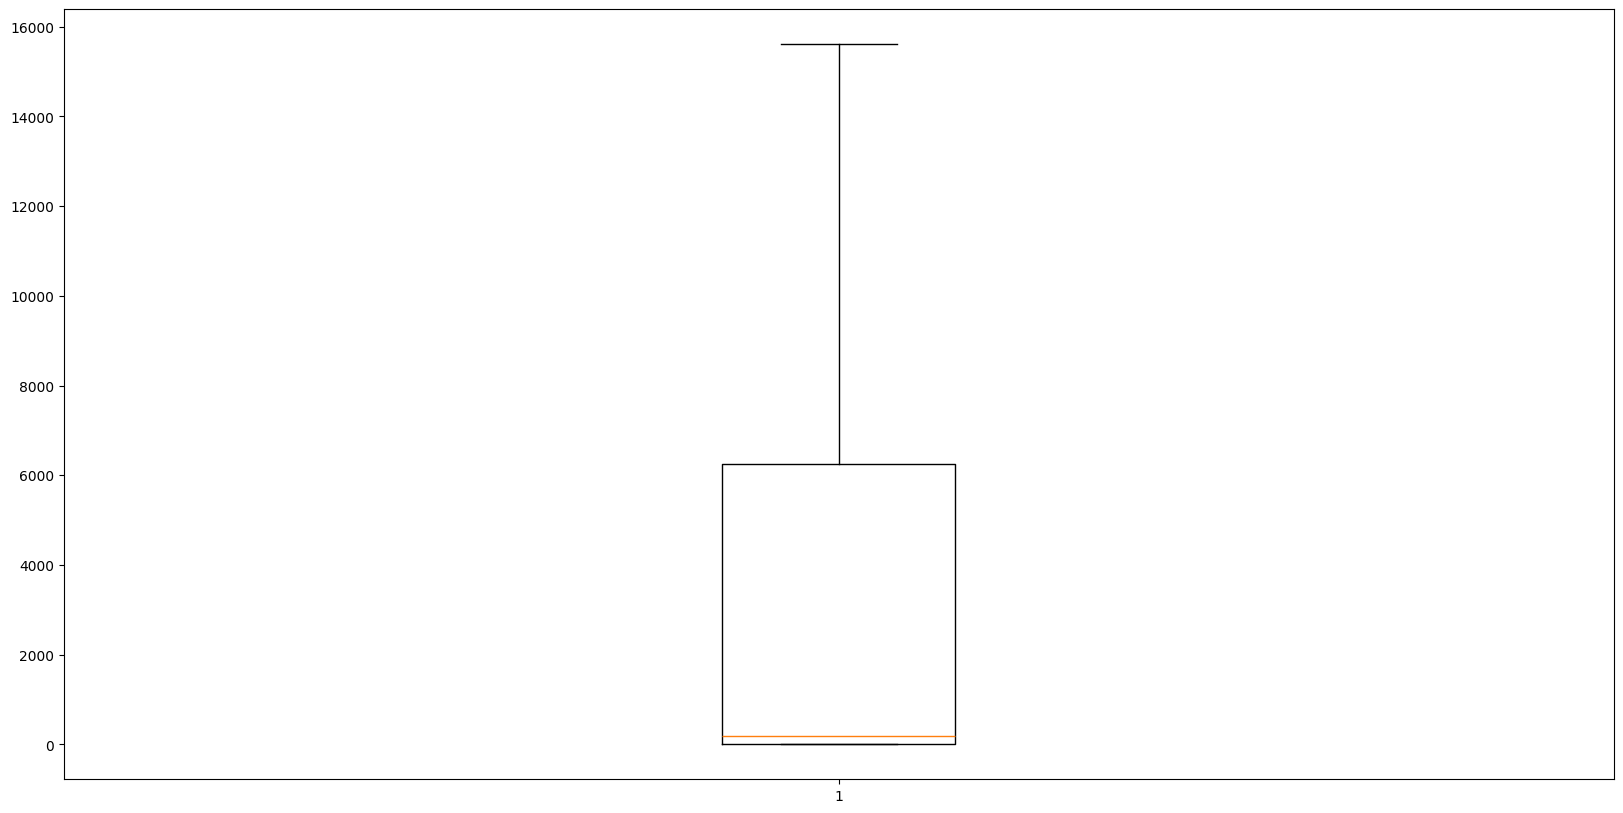

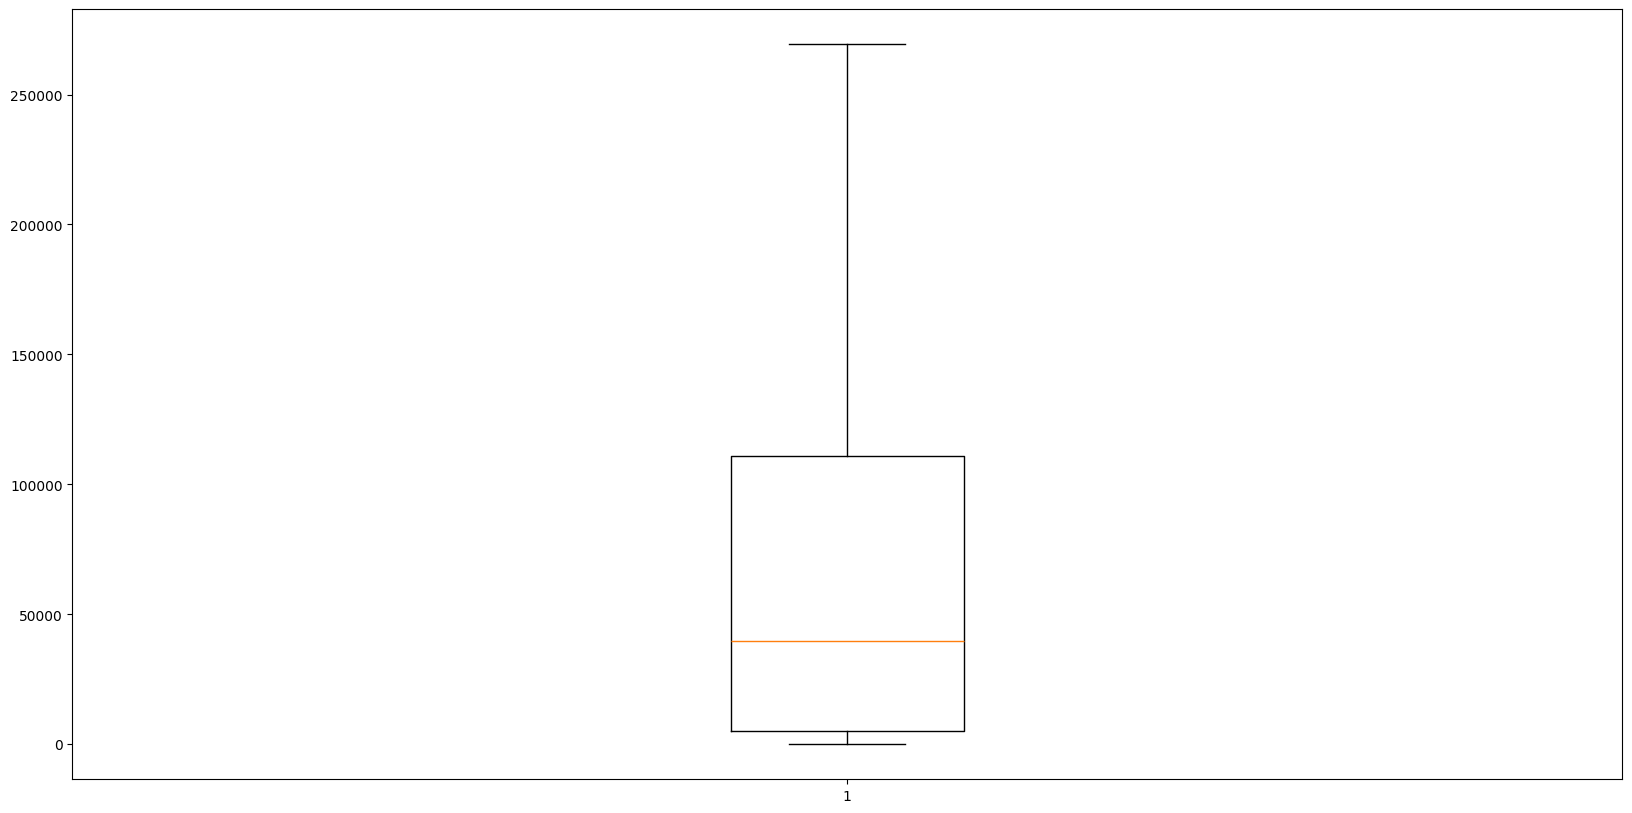

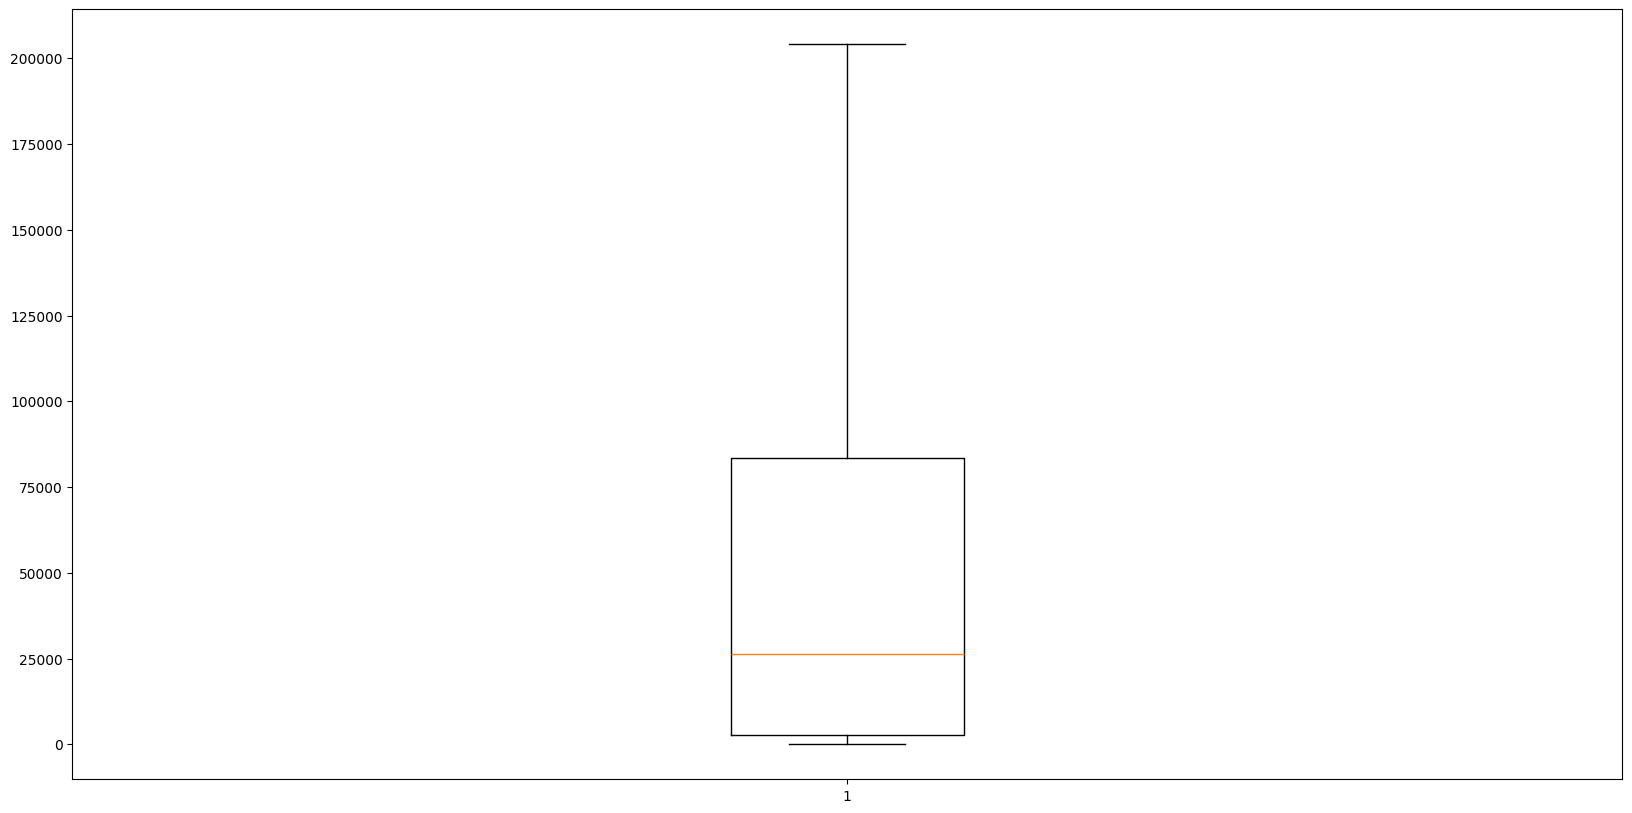

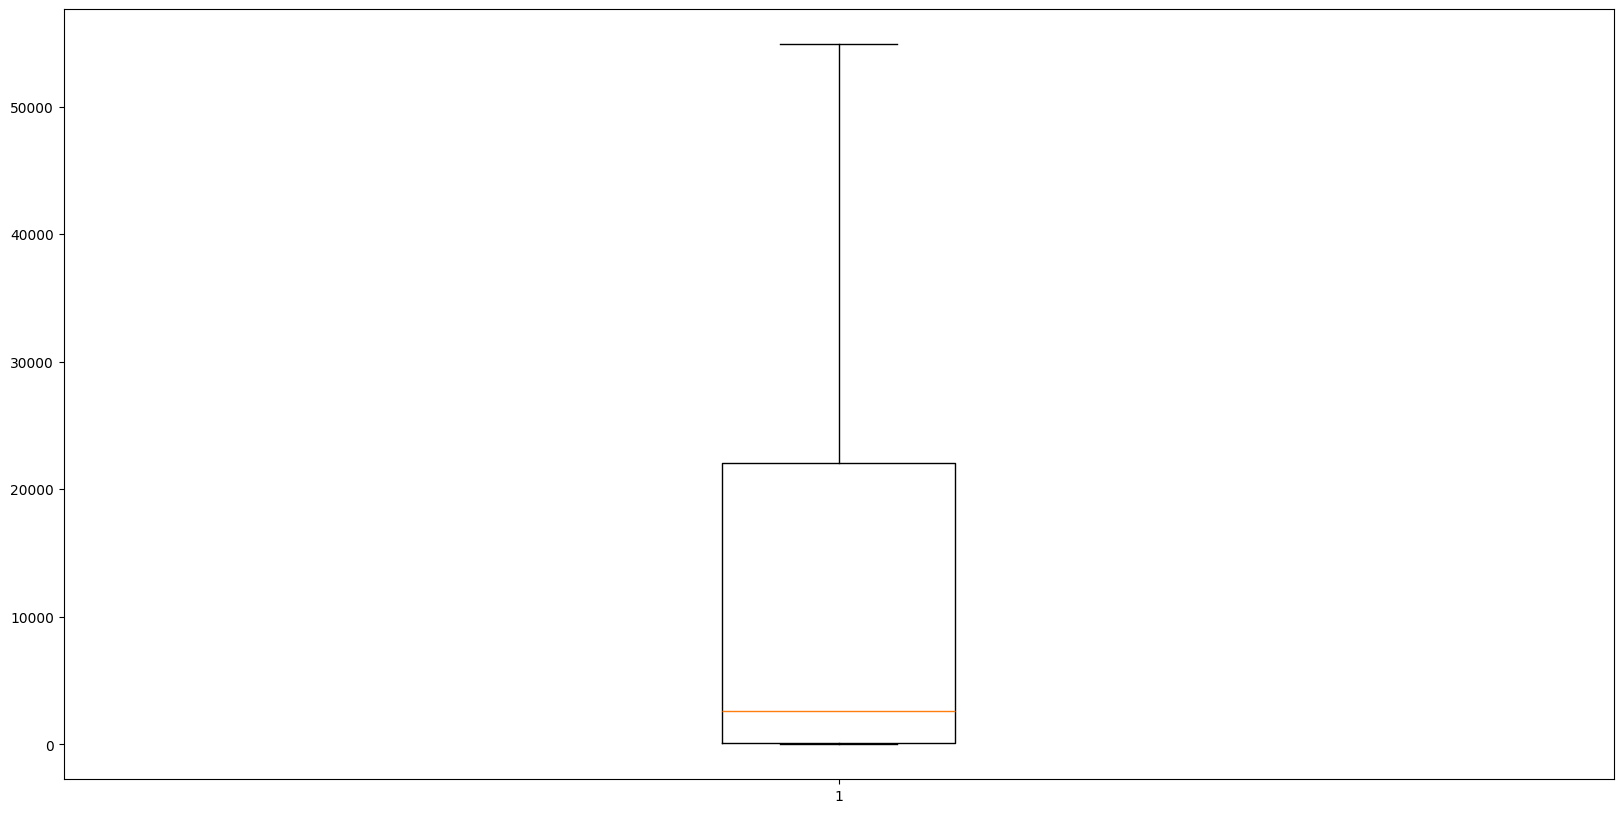

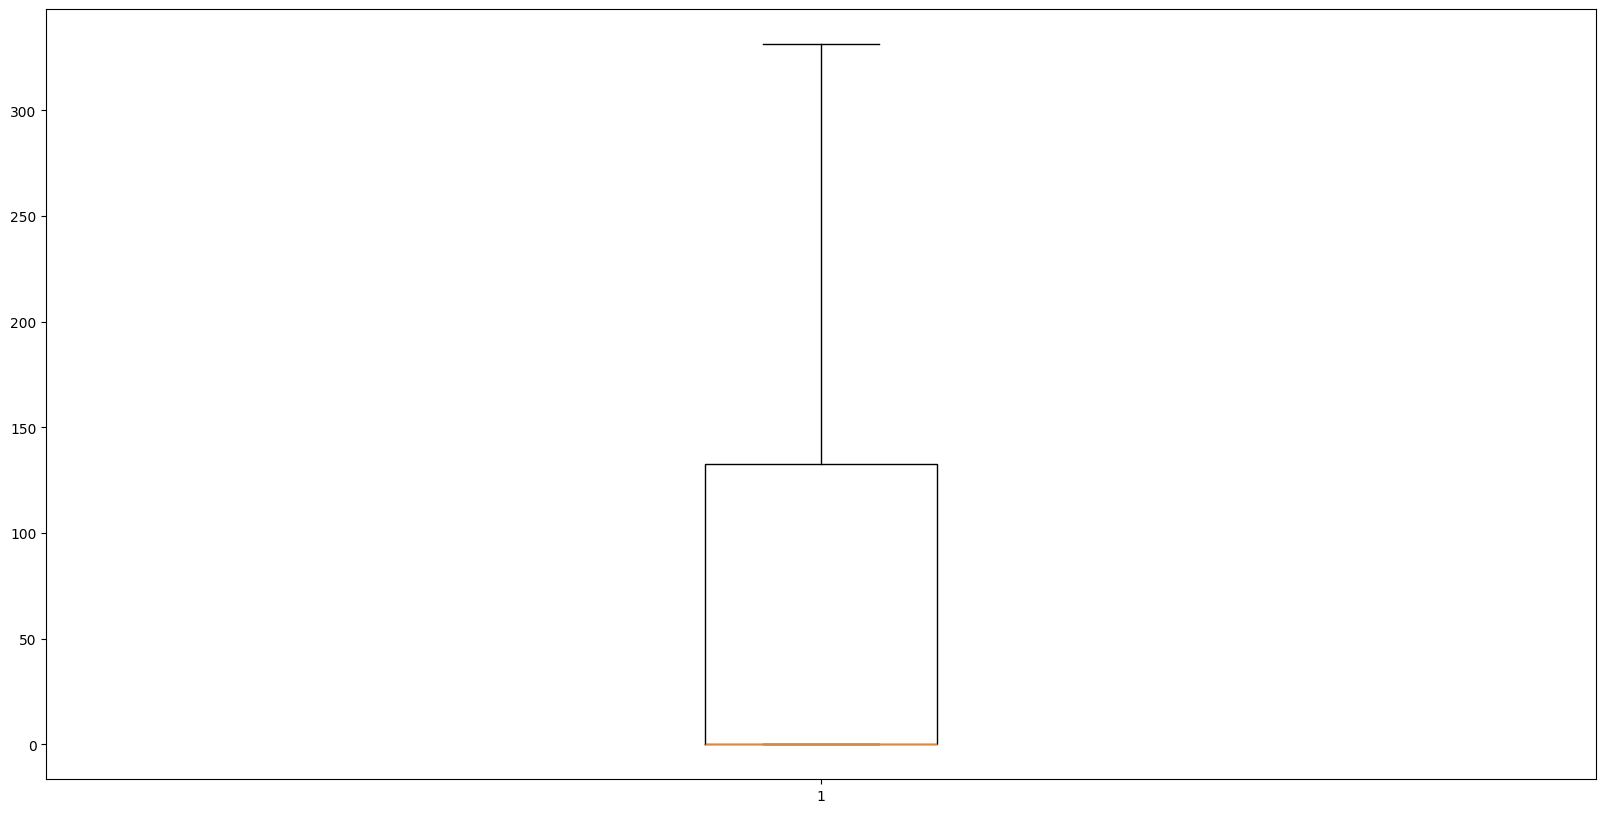

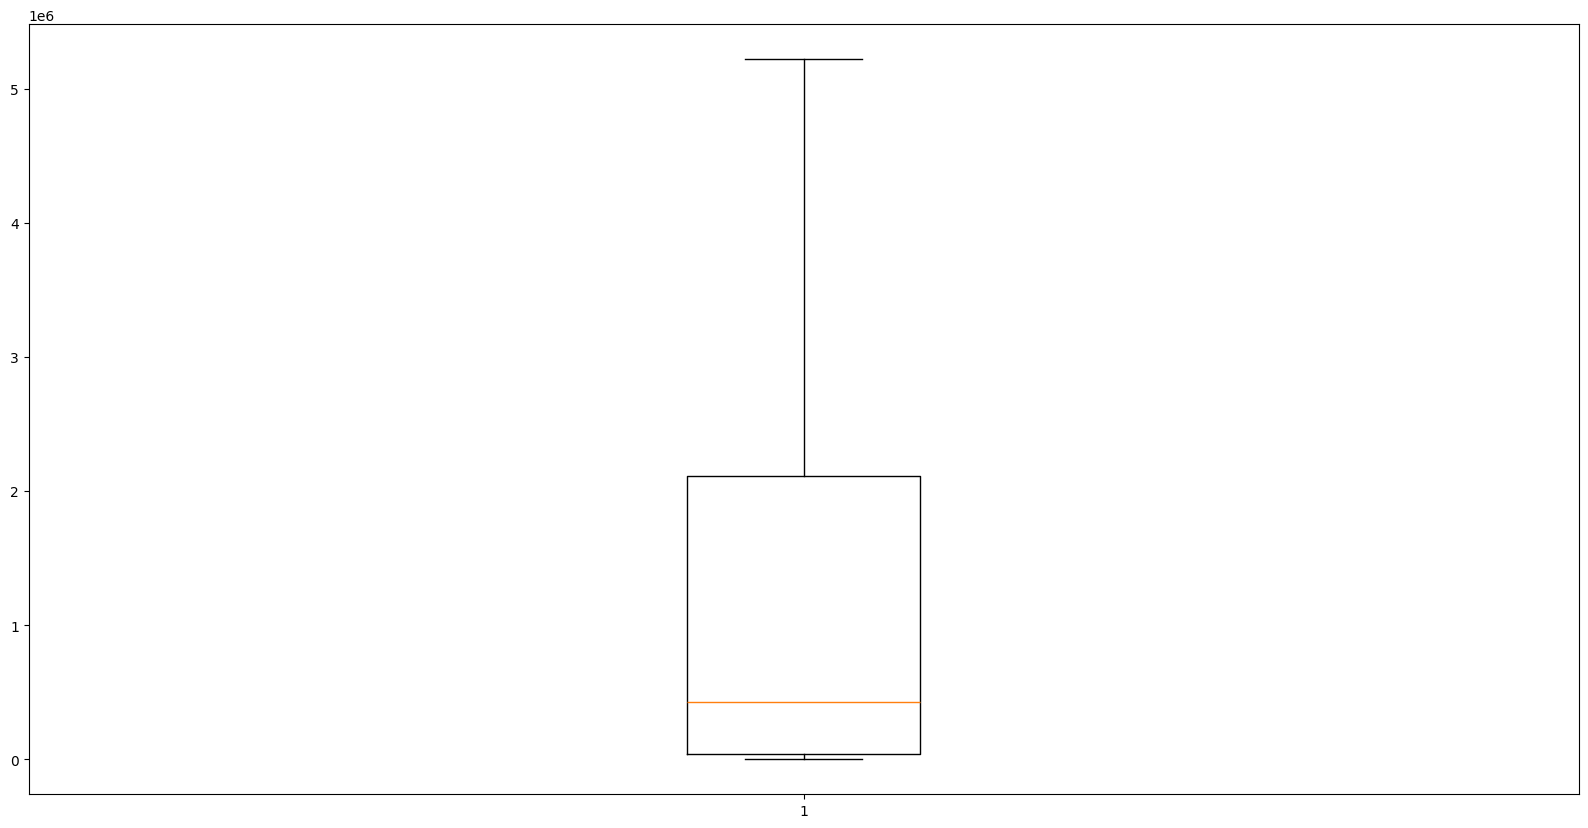

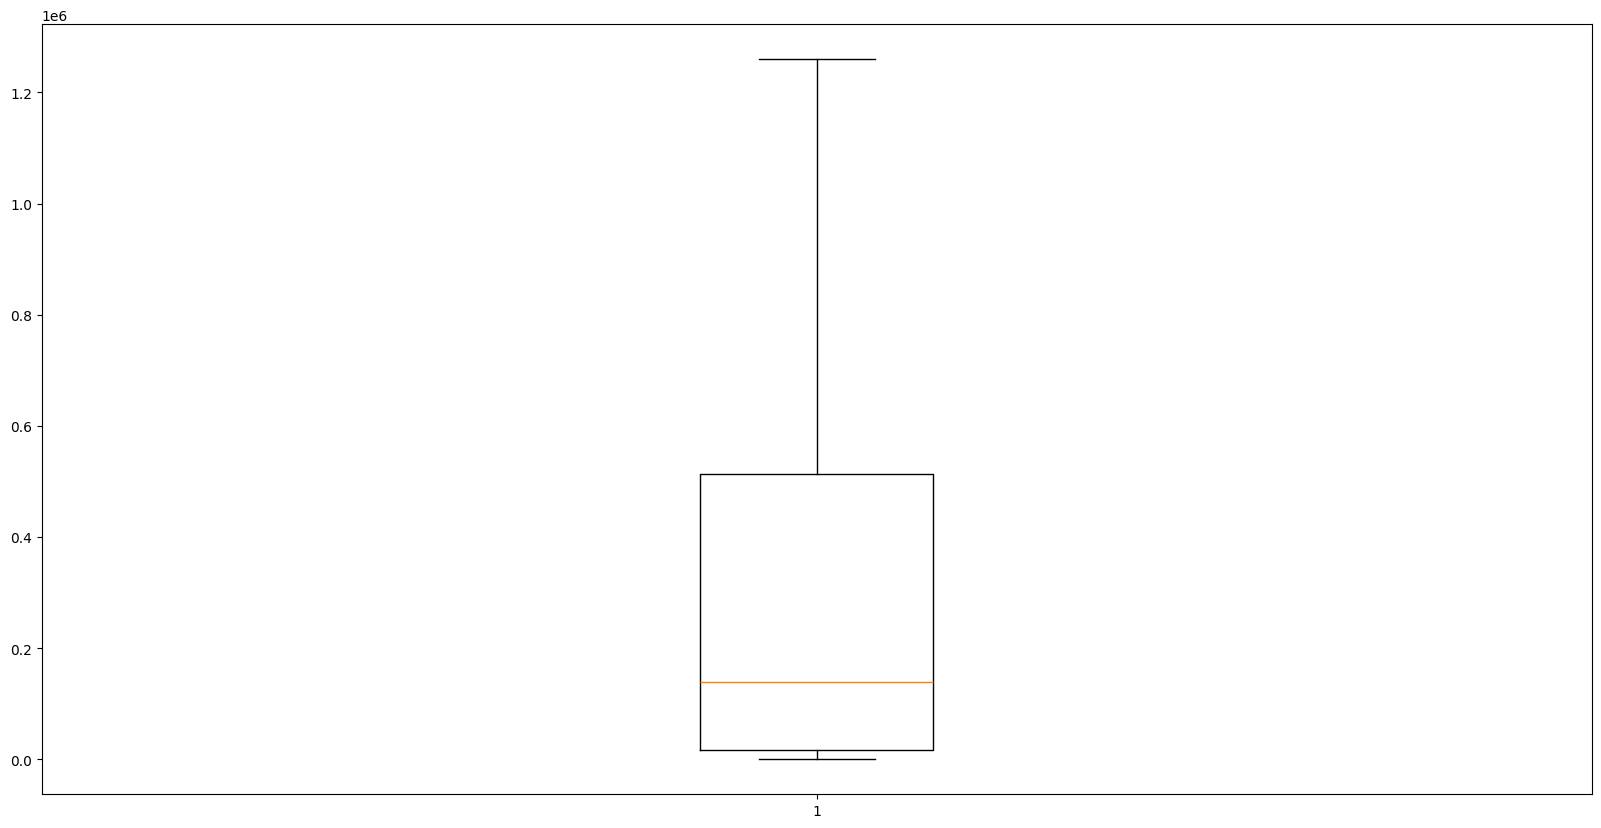

In [405]:
features=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','total_oz','revenue']
for col in features:
    remove_outliers(col)


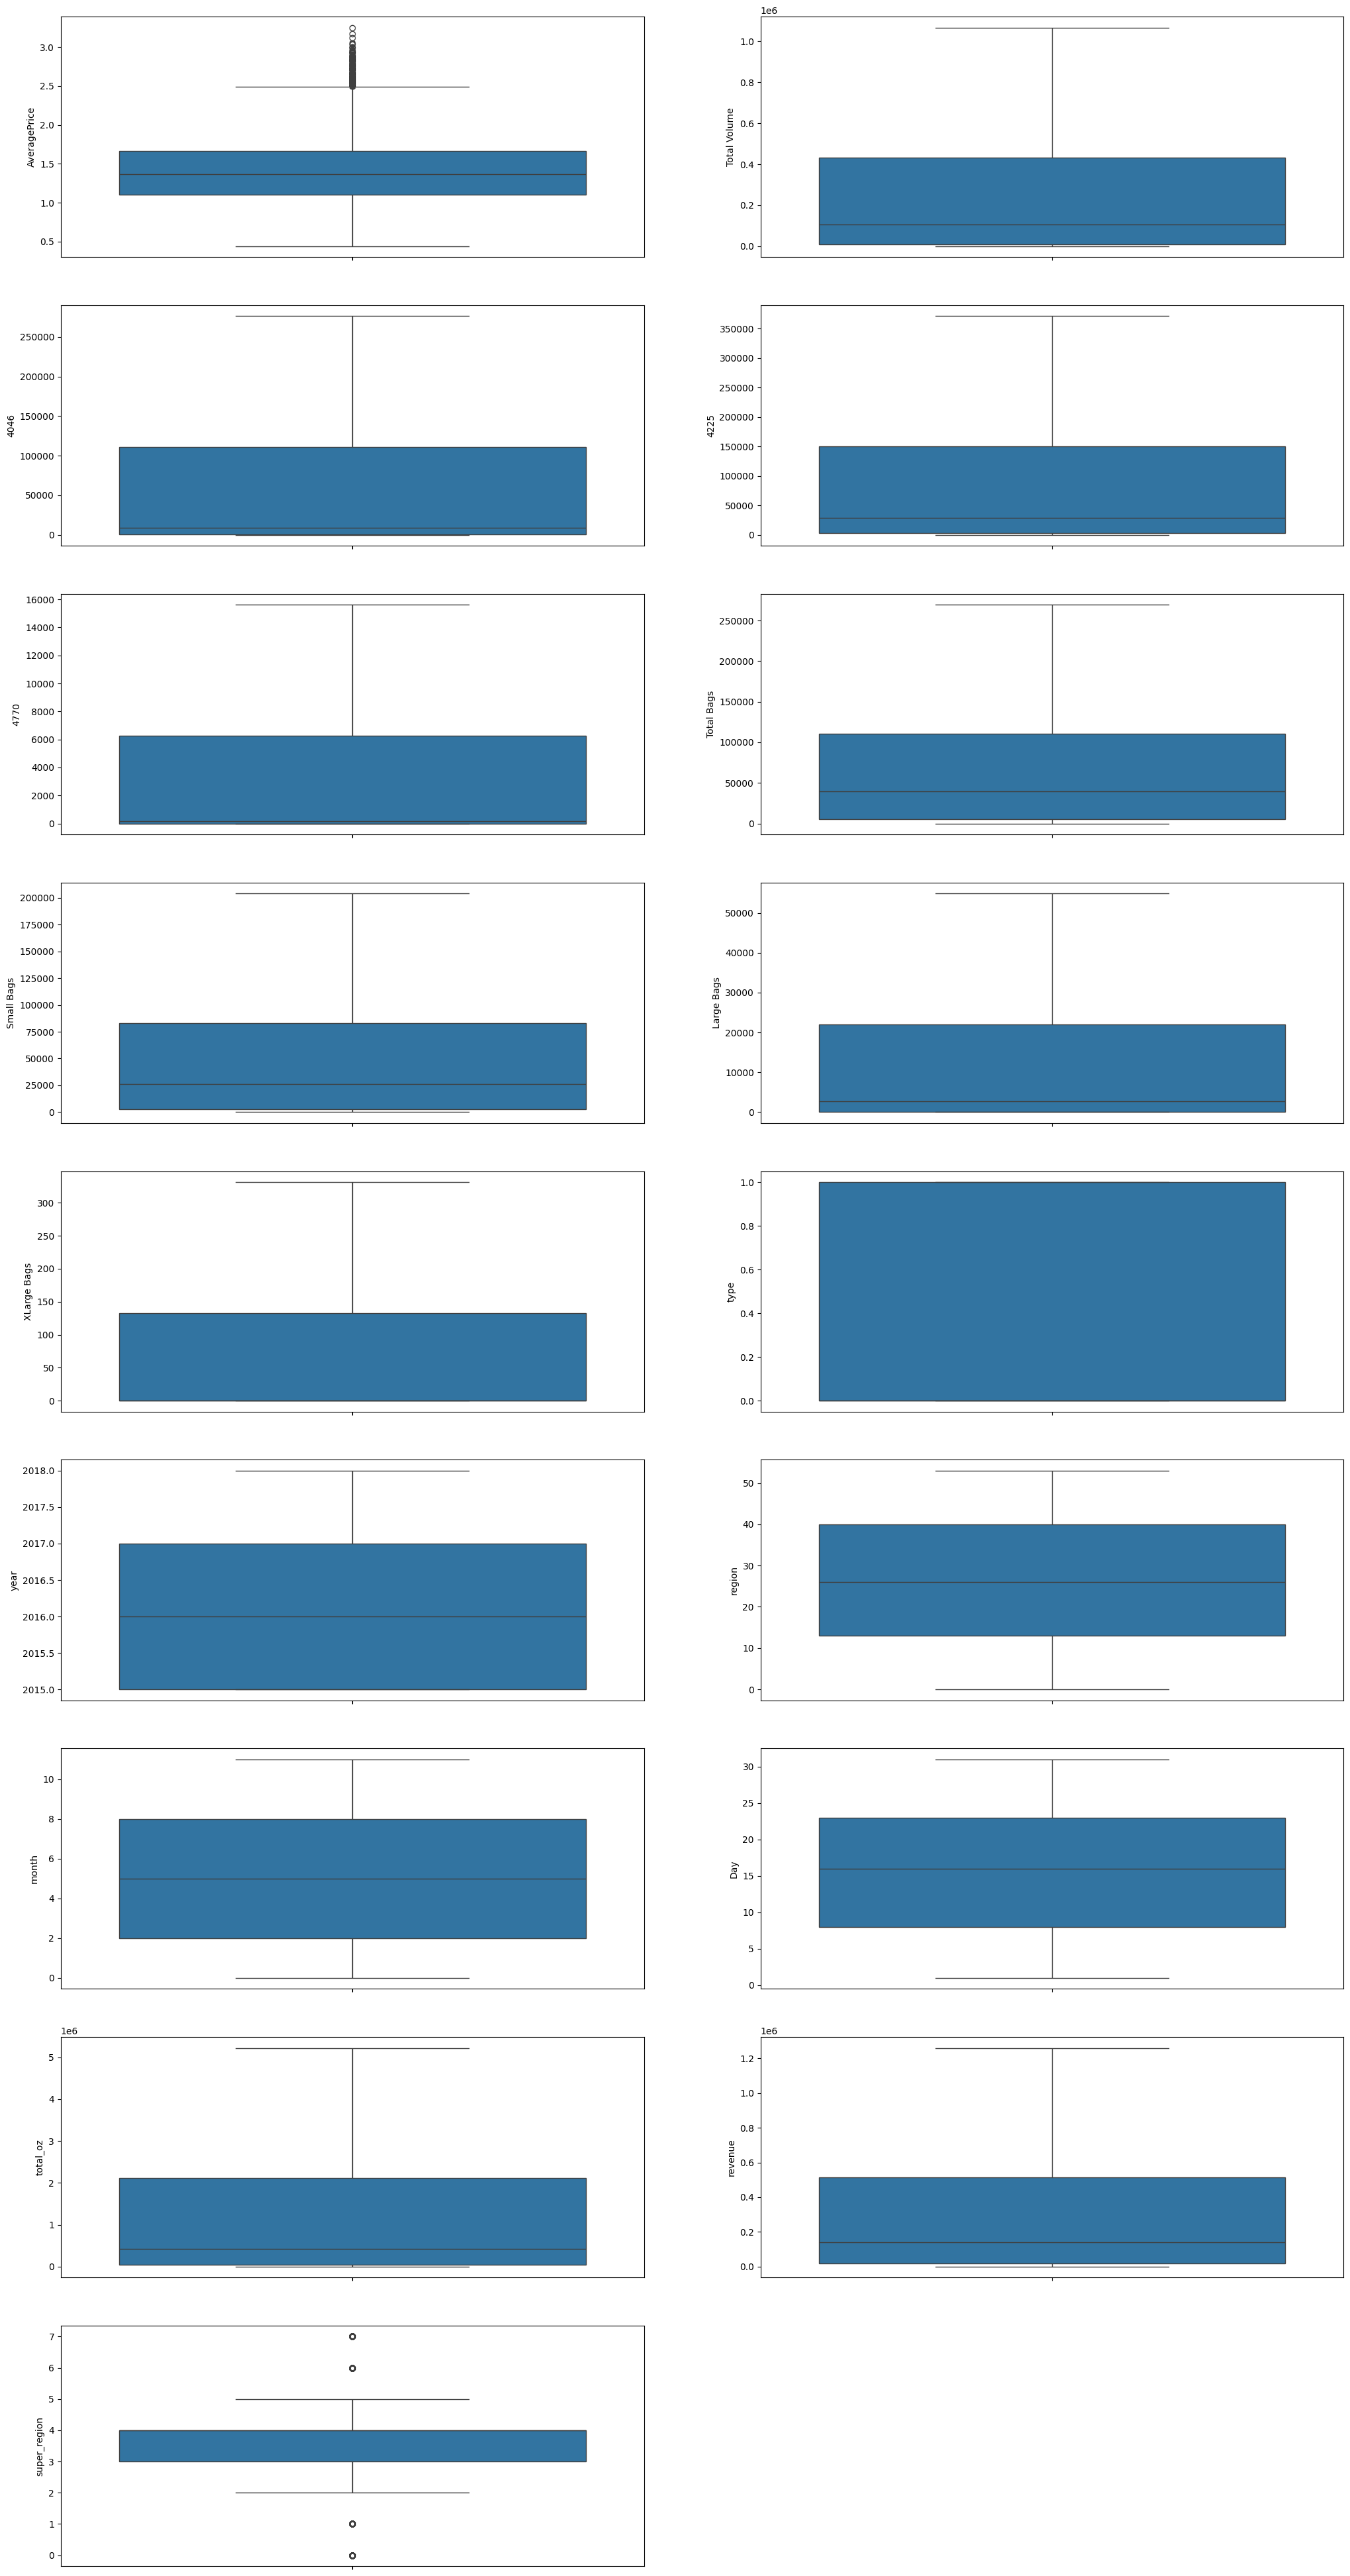

In [406]:
plt.figure(figsize=(25,50))
#category_num=avdf.drop(['type','region'],axis=1)
counter=1
for i in avdf.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.boxplot(avdf[i])
        counter+=1
plt.show()

In [407]:
avdf.skew()

AveragePrice    0.580303
Total Volume    1.206542
4046            1.251184
4225            1.219271
4770            1.212184
Total Bags      1.158550
Small Bags      1.186103
Large Bags      1.215301
XLarge Bags     1.175351
type            0.000329
year            0.215339
region          0.000030
month           0.106617
Day             0.014310
total_oz        1.223052
revenue         1.231143
super_region   -0.095421
dtype: float64

In [408]:
feature=['Total Volume','4046','4225','4770','Total Bags','Small Bags','XLarge Bags','total_oz','revenue']
for col in feature:
    avdf[col]=avdf[col].apply(np.log1p)

In [409]:

round(avdf.skew(),2)

AveragePrice    0.58
Total Volume   -0.29
4046           -0.64
4225           -0.81
4770           -0.10
Total Bags     -0.71
Small Bags     -1.09
Large Bags      1.22
XLarge Bags     0.87
type            0.00
year            0.22
region          0.00
month           0.11
Day             0.01
total_oz       -0.56
revenue        -0.30
super_region   -0.10
dtype: float64

In [88]:
avdf['XLarge Bags']=avdf['4770'].apply(np.cbrt)

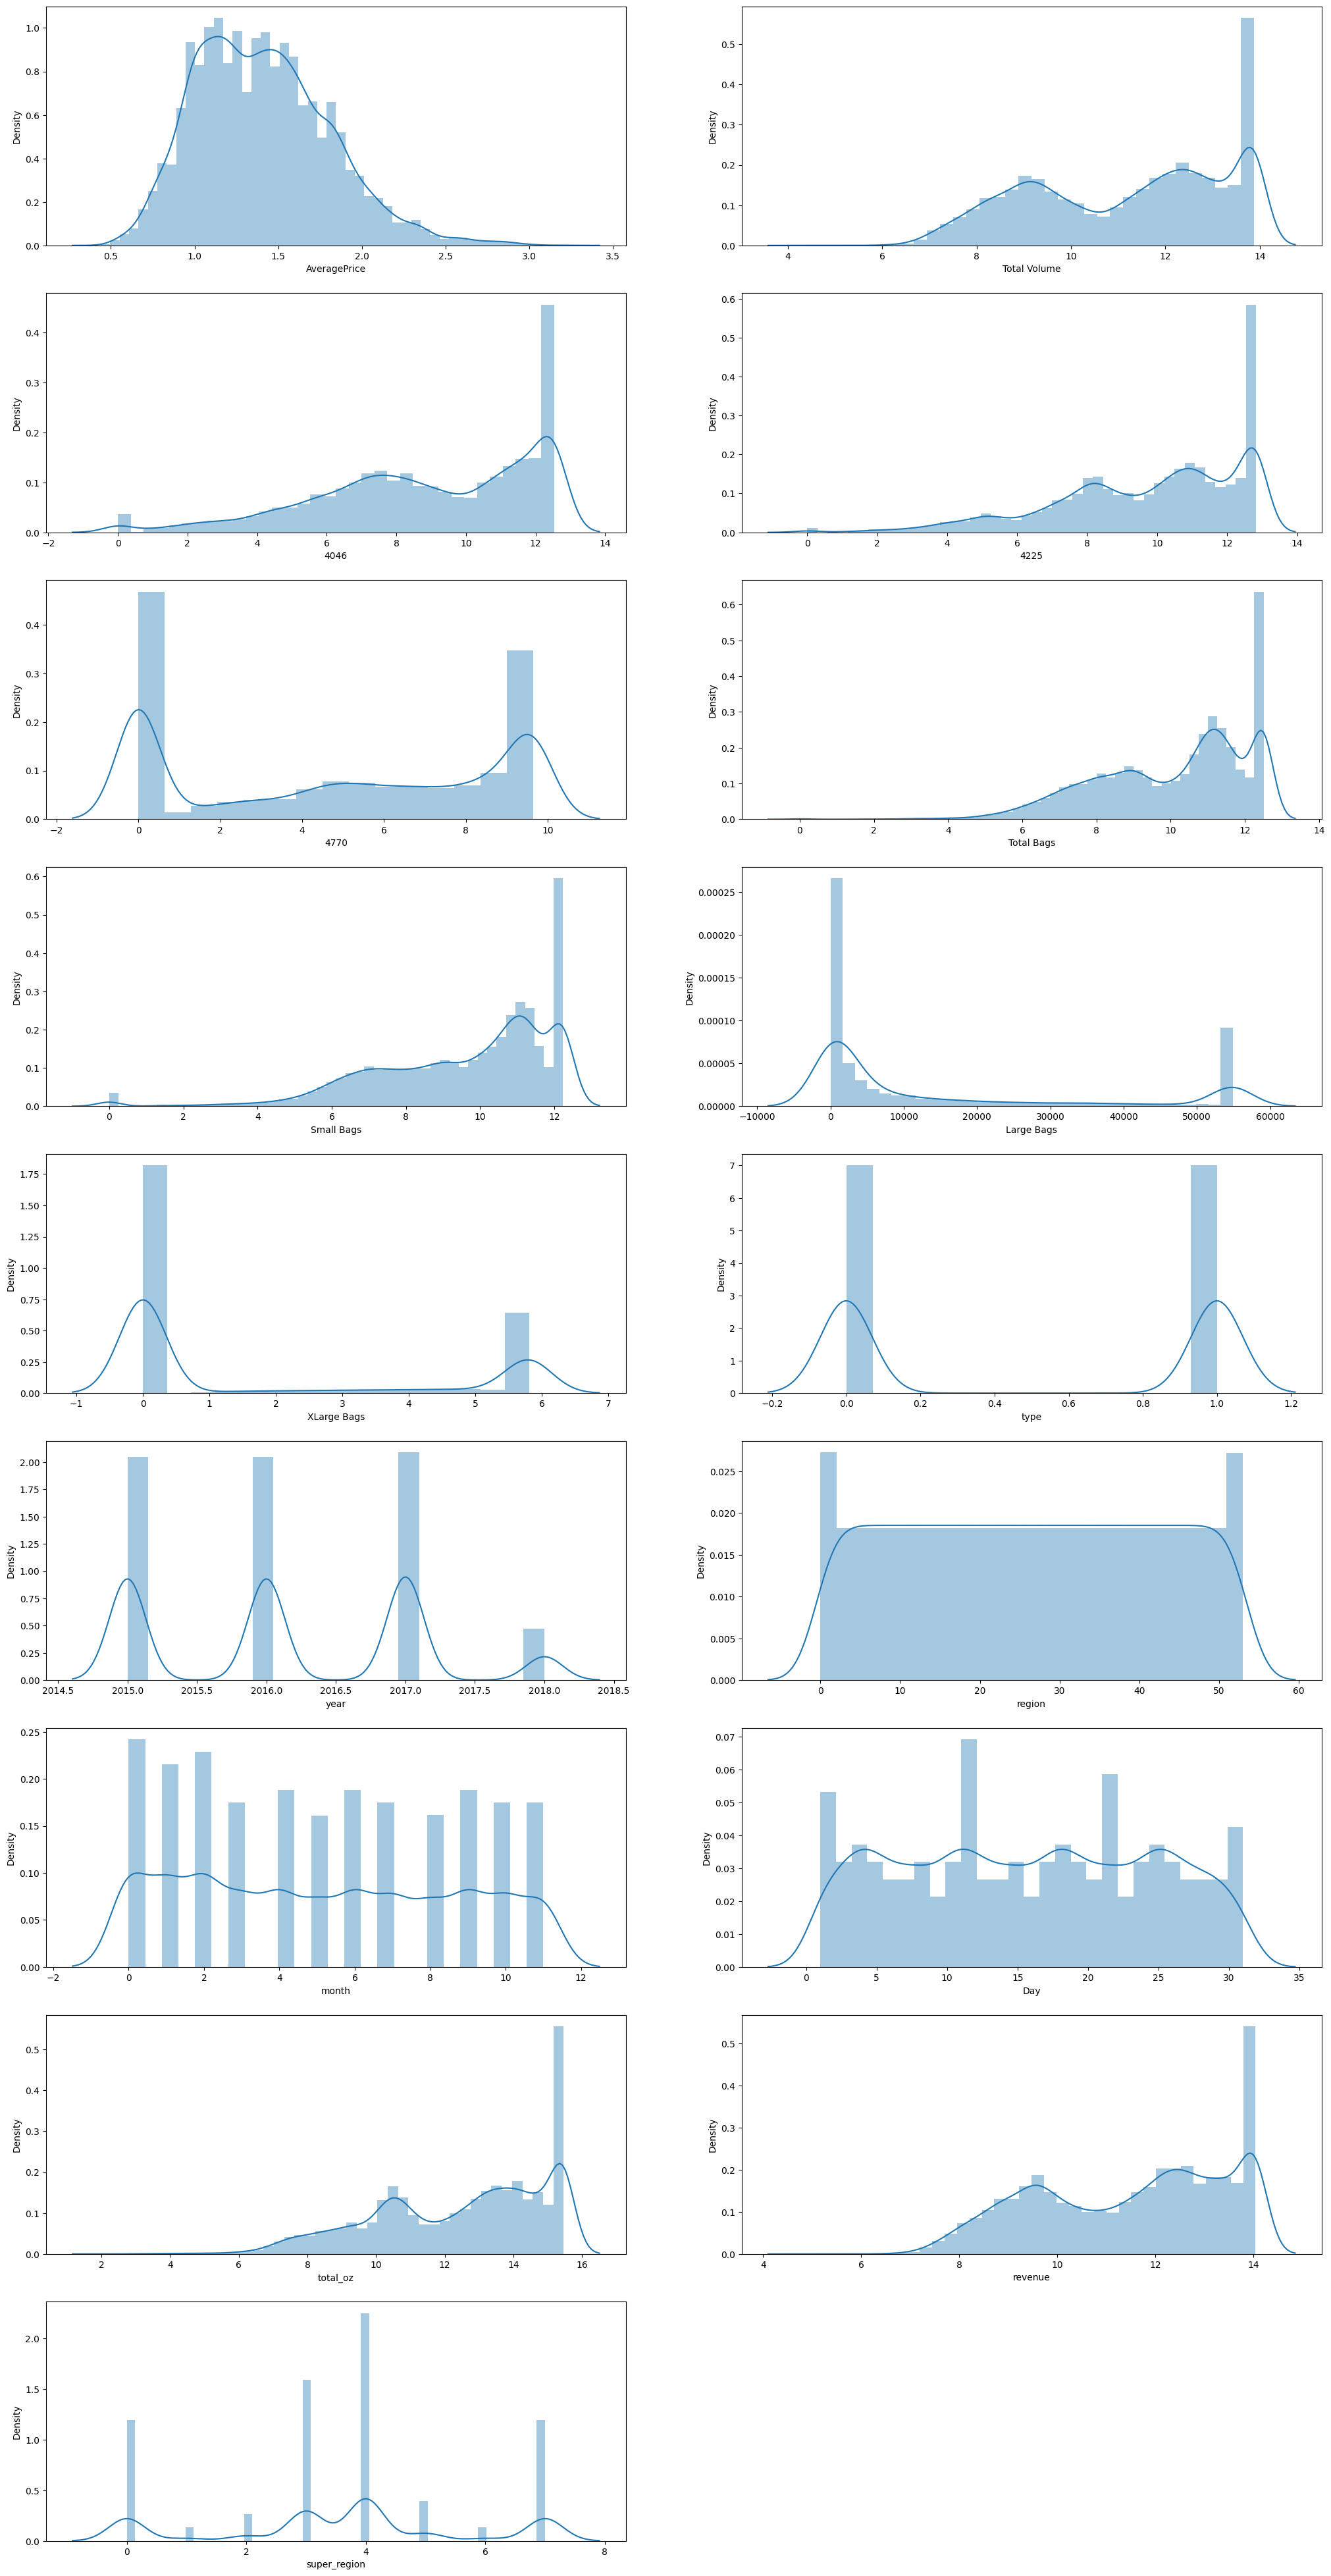

In [410]:
plt.figure(figsize=(25,50))
#category_num=avdf.drop(['type','region'],axis=1)
counter=1
for i in avdf.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.distplot(avdf[i])
        counter+=1
plt.show()

In [161]:
# Here we are separating Dependend Feature and Independent feature

In [411]:
x=avdf.drop('AveragePrice',axis=1)

In [412]:
x

Total Volume      4046       4225      4770  Total Bags  Small Bags  \
0         11.070344  6.944801  10.905146  3.895080    9.070833    9.060055   
1         10.912867  6.515127  10.706381  4.083115    9.159737    9.149429   
2         11.680313  6.679222  11.600485  4.879007    9.005325    8.992584   
3         11.277116  7.032624  11.184108  4.298373    8.667708    8.644425   
4         10.840377  6.848515  10.688288  4.340944    8.729874    8.697389   
...             ...       ...        ...       ...         ...         ...   
18244      9.745419  7.624599   7.333154  0.000000    9.510421    9.477908   
18245      9.538855  7.083975   8.141044  0.000000    9.134090    9.098407   
18246      9.530085  7.084159   7.805389  6.591591    9.147945    9.143431   
18247      9.693150  7.332127   8.000363  6.590315    9.302969    9.298401   
18248      9.769418  7.971006   7.765200  5.418453    9.393924    9.391757   

       Large Bags  XLarge Bags  type  year  region  month  Day   total_oz  \
0           93.25          0.0     0  2015       0     11   27  13.111997   
1           97.49          0.0     0  2015       0     11   20  12.912078   
2          103.14          0.0     0  2015       0     11   13  13.802585   
3          133.76          0.0     0  2015       0     11    6  13.389675   
4          197.69          0.0     0  2015       0     10   29  12.897367   
...           ...          ...   ...   ...     ...    ...  ...        ...   
18244      431.85          0.0     1  2018      53      1    4   9.996597   
18245      324.80          0.0     1  2018      53      0   28  10.481541   
18246       42.31          0.0     1  2018      53      0   21  10.489691   
18247       50.00          0.0     1  2018      53      0   14  10.646103   
18248       26.01          0.0     1  2018      53      0    7  10.479873   

         revenue  super_region  
0      11.355519             3  
1      11.212967             3  
2      11.607743             3  
3      11.354077             3  
4      11.087232             3  
...          ...           ...  
18244  10.233977             5  
18245  10.075319             5  
18246  10.155990             5  
18247  10.350641             5  
18248  10.251822             5  

[18249 rows x 16 columns]

In [413]:
y=avdf.loc[:,'AveragePrice']

In [414]:
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 18249, dtype: float64

In [415]:
from sklearn.preprocessing import MinMaxScaler
scaled=MinMaxScaler()
x=pd.DataFrame(scaled.fit_transform(x),columns =x.columns)

In [286]:
x.shape

(18249, 16)

In [272]:
x


Total Volume      4046      4225      4770  Total Bags  Small Bags  \
0          0.490398  0.409970  0.647786  0.264070    0.540594    0.552119   
1          0.478734  0.384605  0.635979  0.276817    0.545892    0.557565   
2          0.535575  0.394292  0.689090  0.330775    0.536689    0.548007   
3          0.505712  0.415154  0.664356  0.291411    0.516568    0.526790   
4          0.473365  0.404286  0.634904  0.294297    0.520273    0.530018   
...             ...       ...       ...       ...         ...         ...   
18244      0.392266  0.450100  0.435603  0.000000    0.566792    0.577583   
18245      0.376967  0.418185  0.483593  0.000000    0.544363    0.554456   
18246      0.376317  0.418196  0.463654  0.446881    0.545189    0.557200   
18247      0.388395  0.432834  0.475236  0.446795    0.554428    0.566643   
18248      0.394044  0.470549  0.461267  0.367348    0.559849    0.572333   

       Large Bags  XLarge Bags  type  year  region     month       Day  \
0        0.292169          0.0   0.0   0.0     0.0  1.000000  0.866667   
1        0.294997          0.0   0.0   0.0     0.0  1.000000  0.633333   
2        0.298582          0.0   0.0   0.0     0.0  1.000000  0.400000   
3        0.315148          0.0   0.0   0.0     0.0  1.000000  0.166667   
4        0.340101          0.0   0.0   0.0     0.0  0.909091  0.933333   
...           ...          ...   ...   ...     ...       ...       ...   
18244    0.390145          0.0   1.0   1.0     1.0  0.090909  0.100000   
18245    0.371885          0.0   1.0   1.0     1.0  0.000000  0.900000   
18246    0.242195          0.0   1.0   1.0     1.0  0.000000  0.666667   
18247    0.252699          0.0   1.0   1.0     1.0  0.000000  0.433333   
18248    0.211848          0.0   1.0   1.0     1.0  0.000000  0.200000   

       total_oz  super_region   revenue  
0      0.630753      0.428571  0.499648  
1      0.619200      0.428571  0.488600  
2      0.670661      0.428571  0.519196  
3      0.646800      0.428571  0.499537  
4      0.618350      0.428571  0.478856  
...         ...           ...       ...  
18244  0.450717      0.714286  0.412727  
18245  0.478742      0.714286  0.400430  
18246  0.479213      0.714286  0.406683  
18247  0.488252      0.714286  0.421768  
18248  0.478645      0.714286  0.414110  

[18249 rows x 16 columns]

In [273]:
x.drop('XLarge Bags',axis=1,inplace=True)

In [416]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)


In [417]:
X_pca.shape

(18249, 2)

In [140]:
y.shape

(18249,)

In [162]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [163]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [164]:
vif

values      features
0   1745.933194  Total Volume
1     70.459066          4046
2    303.987041          4225
3     32.074668          4770
4    381.849366    Total Bags
5    161.279583    Small Bags
6     12.033578    Large Bags
7     32.185831   XLarge Bags
8      6.875292          type
9      3.524699          year
10     5.000836        region
11     3.730280           Day
12     3.450510         month
13   660.656455      total_oz
14  1462.386579       revenue
15     5.679599  super_region

In [165]:
x.drop('XLarge Bags',axis=1,inplace=True)

In [168]:
x.drop('revenue',axis=1,inplace=True)

In [169]:
vif=pd.DataFrame()
vif['values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns

In [170]:
vif

values      features
0   361.665221  Total Volume
1    69.758133          4046
2   294.041516          4225
3     9.888877          4770
4   344.399352    Total Bags
5   153.673119    Small Bags
6    11.970594    Large Bags
7     6.144661          type
8     3.256441          year
9     4.988682        region
10    3.728391           Day
11    3.248425         month
12  659.831970      total_oz
13    5.648792  super_region

In [182]:
x.drop('region',axis=1,inplace=True)

In [418]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost 
from xgboost import XGBRegressor

In [419]:
mxac=0
mxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(X_pca,y,test_size=.30,random_state=i)
    lr=LinearRegression()
    
    lr.fit(x_train,y_train)
    pred_test=lr.predict(x_test)
    acc=r2_score(y_test,pred_test)
    if acc>mxac:
        mxac=acc
        mxrs=i
print('maximum r2 score is',mxac,'at random state',mxrs)

maximum r2 score is 0.3869167665944707 at random state 113


In [420]:
x_train,x_test,y_train,y_test=train_test_split(X_pca,y,test_size=.30,random_state=mxrs)

In [421]:
lr=LinearRegression()
ls=Lasso()
etc=ExtraTreesRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
knr=KNeighborsRegressor(n_neighbors=2)


In [422]:
def regressor_models(model,x_train,y_tain,x_test,y_test):
    model.fit(x_train,y_train)
    pred_test=model.predict(x_test)

    pred_train=model.predict(x_train)
    print('R2_score',r2_score(y_test,pred_test)*100)
    print('R2 score on training data',r2_score(y_train,pred_train)*100)
    print('Mean Absolute Error',mean_absolute_error(y_test,pred_test))
    print('Mean Squared  Error',mean_squared_error(y_test,pred_test))
    print('Root Mean Absolute Error',np.sqrt(mean_squared_error(y_test,pred_test)))

    

In [423]:
models=[lr,ls,etc,gbr,rfr,knr]


for model in models:
    print('Score for {}'.format(model))
    regressor_models(model,x_train,y_train,x_test,y_test)
    print('*'*50)

Score for LinearRegression()
R2_score 38.69167665944707
R2 score on training data 35.209784451655764
Mean Absolute Error 0.24486436564713793
Mean Squared  Error 0.10019934514554879
Root Mean Absolute Error 0.31654280144326263
**************************************************
Score for Lasso()
R2_score -0.014456152260411415
R2 score on training data 0.0
Mean Absolute Error 0.32683230534626195
Mean Squared  Error 0.16345876816559365
Root Mean Absolute Error 0.4043003440087501
**************************************************
Score for ExtraTreesRegressor()
R2_score 47.95399065243879
R2 score on training data 100.0
Mean Absolute Error 0.21079989041095887
Mean Squared  Error 0.08506146914337898
Root Mean Absolute Error 0.29165299440153014
**************************************************
Score for GradientBoostingRegressor()
R2_score 46.44760646618619
R2 score on training data 45.19239830647543
Mean Absolute Error 0.22715295405994185
Mean Squared  Error 0.08752343027321927
Root Mean Abs

In [424]:
def cross_validation(model,x,y):
    score=cross_val_score(model,x,y,scoring='r2')
    print(score)
    print(score.mean())
    print('difference between r2 score and cross validation score is ',(r2_score(y_test,pred_test)-score.mean())*100)

In [425]:
models=[lr,ls,etc,gbr,rfr,knr]

In [427]:


for model in models:
    print('Cross validation for {}'.format(model))
    cross_validation(model,x,y)
    print('*'*50)

Cross validation for LinearRegression()
[0.68700347 0.73632507 0.91500948 0.95053894 0.90152751]
0.838080896332696
difference between r2 score and cross validation score is  -122.04675573809554
**************************************************
Cross validation for Lasso()
[-3.98236185 -0.75045983 -0.01749803 -0.47032699 -0.80592045]
-1.2053134266962335
difference between r2 score and cross validation score is  82.29267656479742
**************************************************
Cross validation for ExtraTreesRegressor()
[0.06122012 0.64237614 0.7166361  0.43360262 0.25237114]
0.4212412229262653
difference between r2 score and cross validation score is  -80.36278839745246
**************************************************
Cross validation for GradientBoostingRegressor()
[0.13342951 0.59139345 0.74688775 0.45378192 0.3457411 ]
0.4542467464139035
difference between r2 score and cross validation score is  -83.66334074621629
**************************************************
Cross validati

In [ ]:
CONCLUSION : BASED ON THE ABOVE OBSERVATION LINEAR REGRESSION MODEL IS GIVING BETTER PERFORMANCE AMONG ALL OTHER MODEL 
    cross validation score for the LinearRegression()
Cross validation for LinearRegression()
[0.68700347 0.73632507 0.91500948 0.95053894 0.90152751]
0.838080896332696
difference between r2 score and cross validation score is  -122.04675573809554
Differnce between r2 score and cross validation is very less 

PERFORMANCE EVALUATION FOR LinearRegression()
Score for LinearRegression()
R2_score 38.69167665944707
R2 score on training data 35.209784451655764
Mean Absolute Error 0.24486436564713793
Mean Squared  Error 0.10019934514554879
Root Mean Absolute Error 0.31654280144326263

In [428]:
from sklearn.model_selection import GridSearchCV

parameters = {"fit_intercept": [True, False]
                           }

model = LinearRegression()

grid_search = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error')


grid_search.fit(x_train, y_train)



GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [429]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [431]:
best_params

{'fit_intercept': True}

In [436]:
final_model_regressor=LinearRegression(fit_intercept=True,n_jobs=-1)
final_model_regressor.fit(x_train,y_train)
pred=final_model_regressor.predict(x_test)
acc=r2_score(y_test,pred)
print(acc)
score=cross_val_score(final_model_regressor,x,y,cv=5)
print(score)
print(score.mean()*100)
print('difference between r2 score and cross validation score is ',(acc-score.mean())*100)


0.3869167665944707
[0.68700347 0.73632507 0.91500948 0.95053894 0.90152751]
83.8080896332696
difference between r2 score and cross validation score is  -45.11641297382253


In [437]:
import joblib

In [438]:
joblib.dump(final_model_regressor,'Avocado_regressor.pkl')

['Avocado_regressor.pkl']

In [439]:
model_regressor=joblib.load('Avocado_regressor.pkl')

In [440]:
df=pd.DataFrame()
prediction=model_regressor.predict(x_test)

In [441]:
dummy_test=np.array(y_test)

In [442]:
df['orginal']=dummy_test
df['prediction']=prediction
df

orginal  prediction
0        1.67    1.634294
1        1.30    1.122903
2        1.42    1.213042
3        1.56    1.543114
4        1.33    1.037964
...       ...         ...
5470     1.04    1.696838
5471     1.19    1.697097
5472     1.47    1.758766
5473     1.10    1.072543
5474     0.89    1.134516

[5475 rows x 2 columns]

                                     CLASSIFICATION MODEL

In [470]:
x1=avdf.drop('type',axis=1)

In [471]:
y1=avdf.loc[:,'type']

In [472]:
x1

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0              1.33     11.070344  6.944801  10.905146  3.895080    9.070833   
1              1.35     10.912867  6.515127  10.706381  4.083115    9.159737   
2              0.93     11.680313  6.679222  11.600485  4.879007    9.005325   
3              1.08     11.277116  7.032624  11.184108  4.298373    8.667708   
4              1.28     10.840377  6.848515  10.688288  4.340944    8.729874   
...             ...           ...       ...        ...       ...         ...   
18244          1.63      9.745419  7.624599   7.333154  0.000000    9.510421   
18245          1.71      9.538855  7.083975   8.141044  0.000000    9.134090   
18246          1.87      9.530085  7.084159   7.805389  6.591591    9.147945   
18247          1.93      9.693150  7.332127   8.000363  6.590315    9.302969   
18248          1.62      9.769418  7.971006   7.765200  5.418453    9.393924   

       Small Bags  Large Bags  XLarge Bags  year  region  month  Day  \
0        9.060055       93.25          0.0  2015       0     11   27   
1        9.149429       97.49          0.0  2015       0     11   20   
2        8.992584      103.14          0.0  2015       0     11   13   
3        8.644425      133.76          0.0  2015       0     11    6   
4        8.697389      197.69          0.0  2015       0     10   29   
...           ...         ...          ...   ...     ...    ...  ...   
18244    9.477908      431.85          0.0  2018      53      1    4   
18245    9.098407      324.80          0.0  2018      53      0   28   
18246    9.143431       42.31          0.0  2018      53      0   21   
18247    9.298401       50.00          0.0  2018      53      0   14   
18248    9.391757       26.01          0.0  2018      53      0    7   

        total_oz    revenue  super_region  
0      13.111997  11.355519             3  
1      12.912078  11.212967             3  
2      13.802585  11.607743             3  
3      13.389675  11.354077             3  
4      12.897367  11.087232             3  
...          ...        ...           ...  
18244   9.996597  10.233977             5  
18245  10.481541  10.075319             5  
18246  10.489691  10.155990             5  
18247  10.646103  10.350641             5  
18248  10.479873  10.251822             5  

[18249 rows x 16 columns]

In [473]:
y1

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 18249, dtype: int32

In [474]:
y1.value_counts()

type
0    9126
1    9123
Name: count, dtype: int64

In [450]:
from imblearn.over_sampling import SMOTE

In [475]:
smt=SMOTE()
x1,y1=smt.fit_resample(x1,y1)


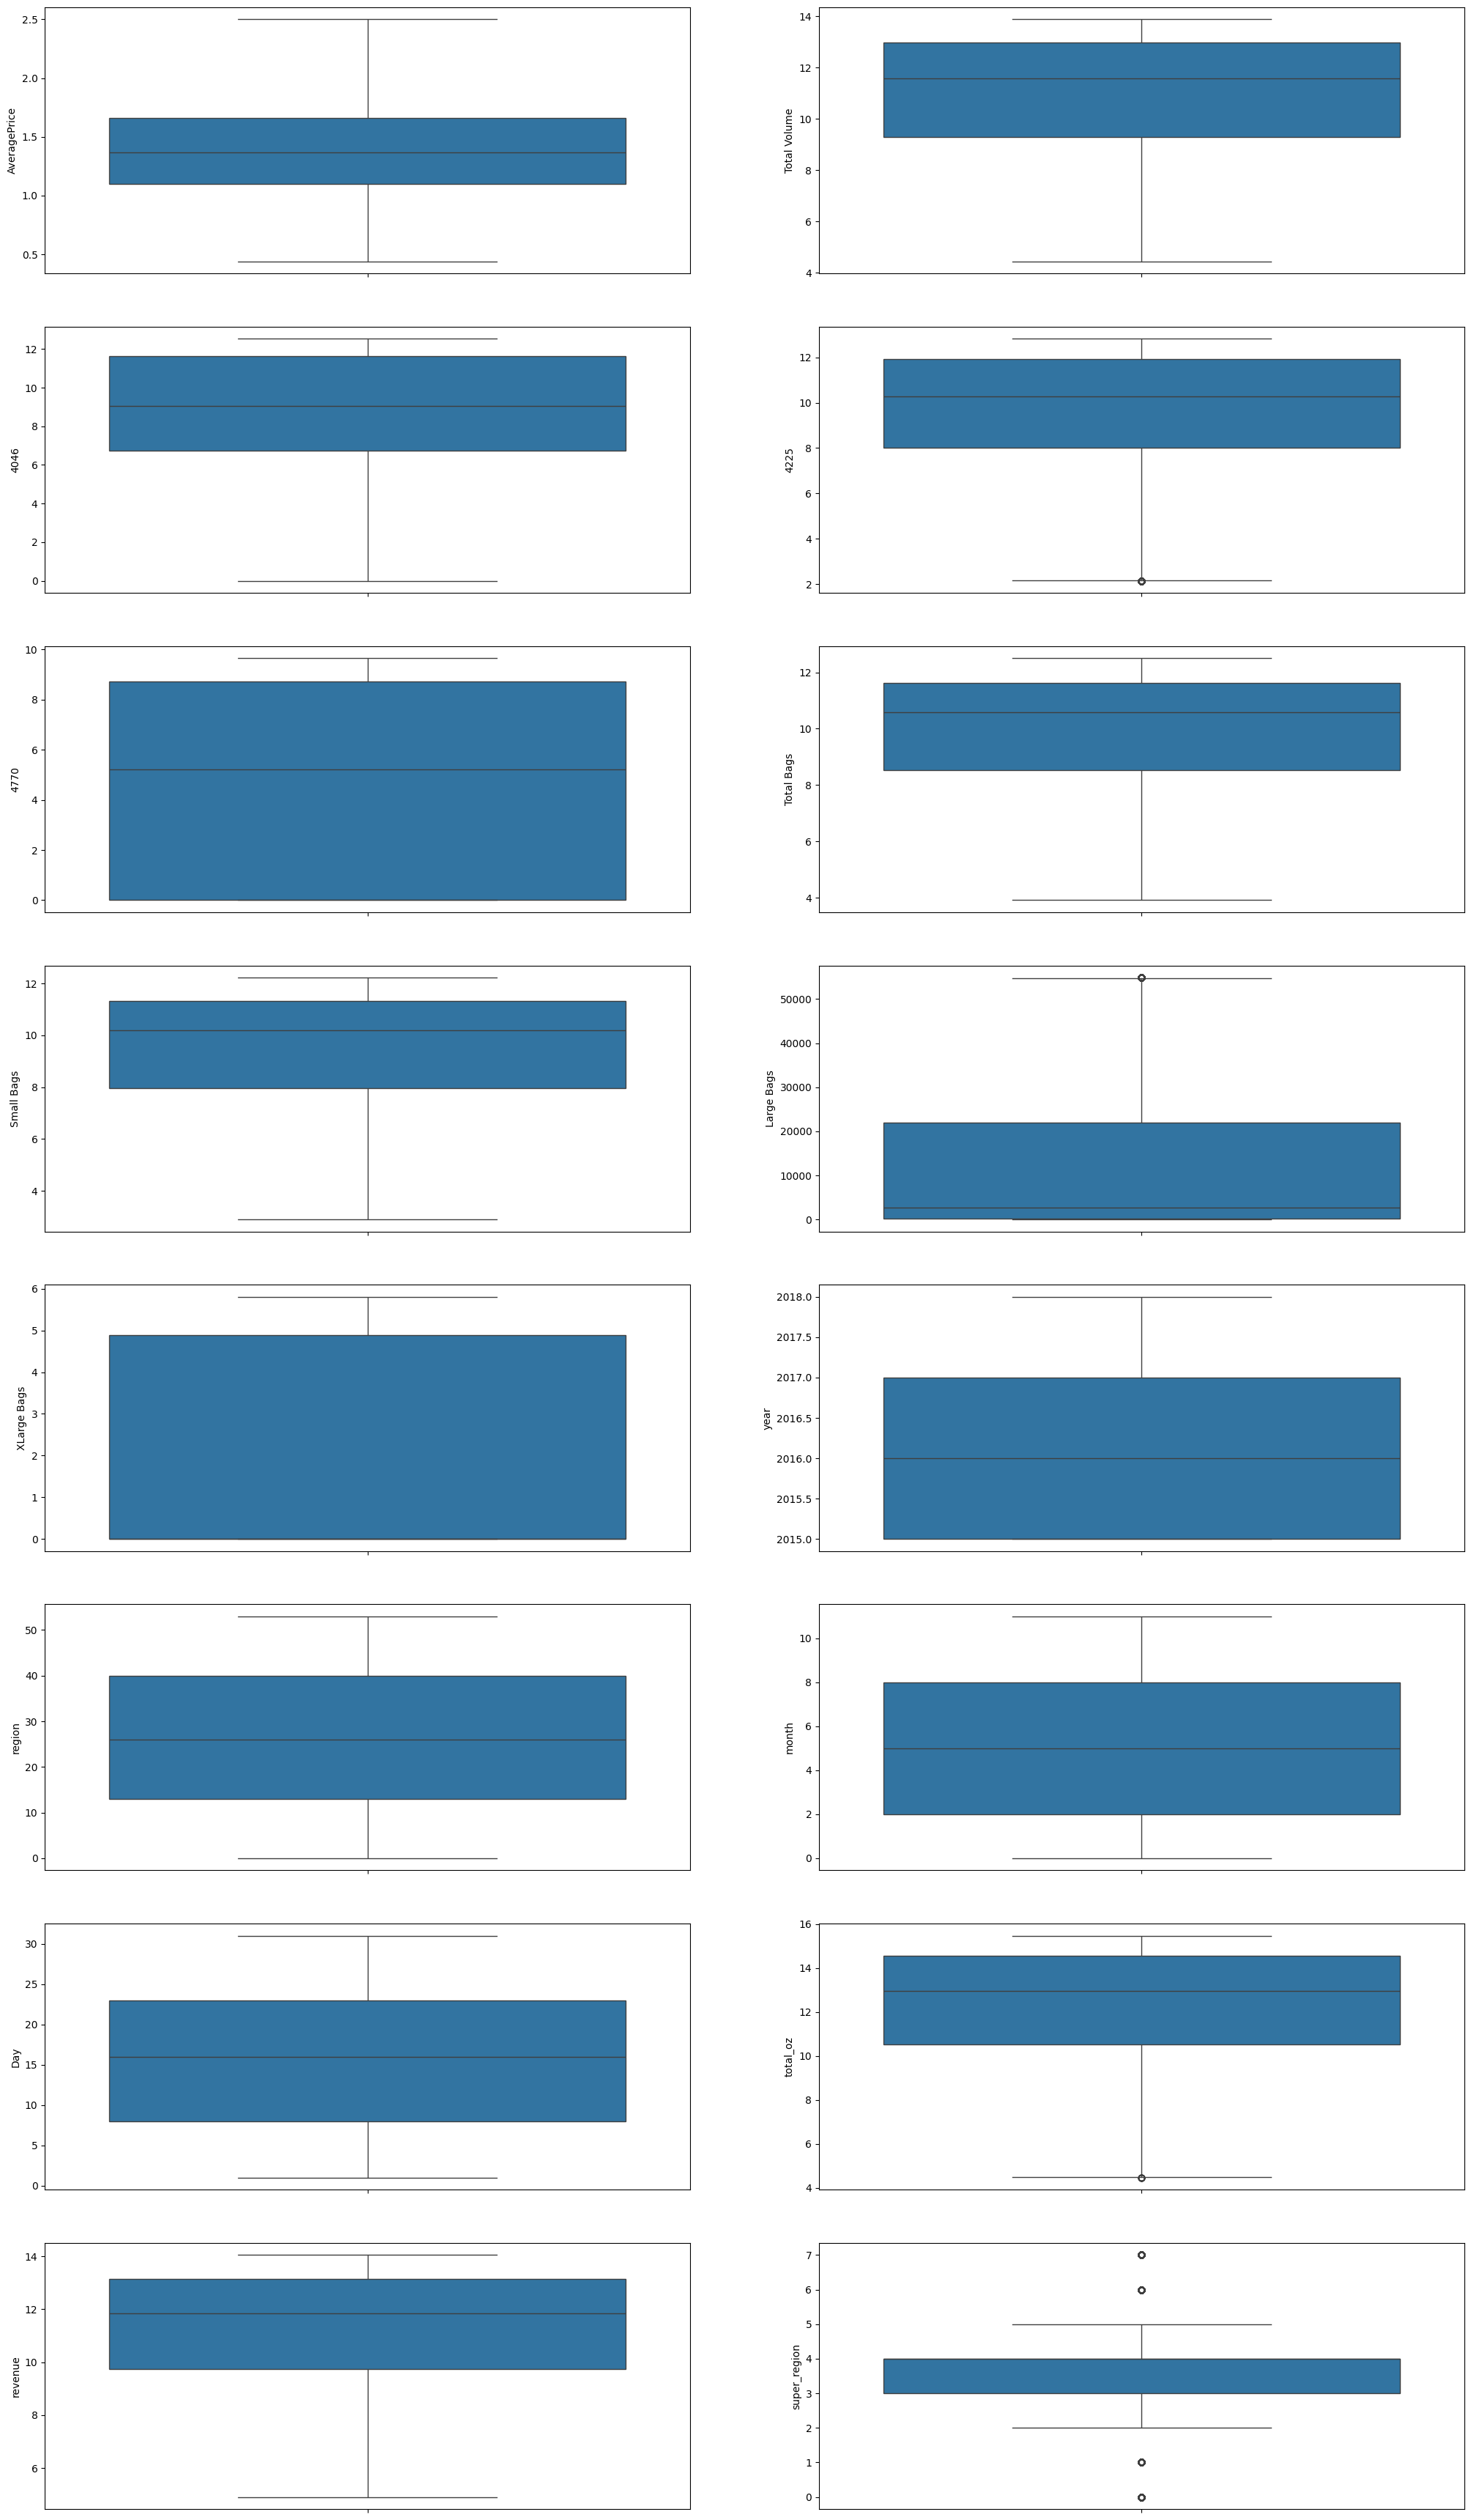

In [477]:
plt.figure(figsize=(25,50))
#category_num=avdf.drop(['type','region'],axis=1)
counter=1
for i in x1.columns:
    if counter<=17:
        ax=plt.subplot(9,2,counter)
        sns.boxplot(x1[i])
        counter+=1
plt.show()

In [463]:
from feature_engine.outliers import ArbitraryOutlierCapper
def remove_outliers(col):
    
    plt.figure(figsize=(20,10))  
#for i in avdf.columns:
    Q1=avdf[col].quantile(0.25)
   # Q2=avdf[i].quantile(0.5)
    Q3=avdf[col].quantile(0.75)
    iqr=Q3-Q1
    lowfence=Q1-1.5*iqr
    uppfence=Q3+1.5*iqr
    print(lowfence)
    print(uppfence)

    arb=ArbitraryOutlierCapper(min_capping_dict={col:lowfence},max_capping_dict={col:uppfence})
    avdf[[col]]=arb.fit_transform(avdf[[col]])
    plt.boxplot(avdf[col])


0.26000000000000034
2.4999999999999996
2.1443926426728197
17.78500496986728
3.9143944827752994
16.235908875715253
2.892052157876525
16.393837419075364
4.458787509851911
20.624597446952244


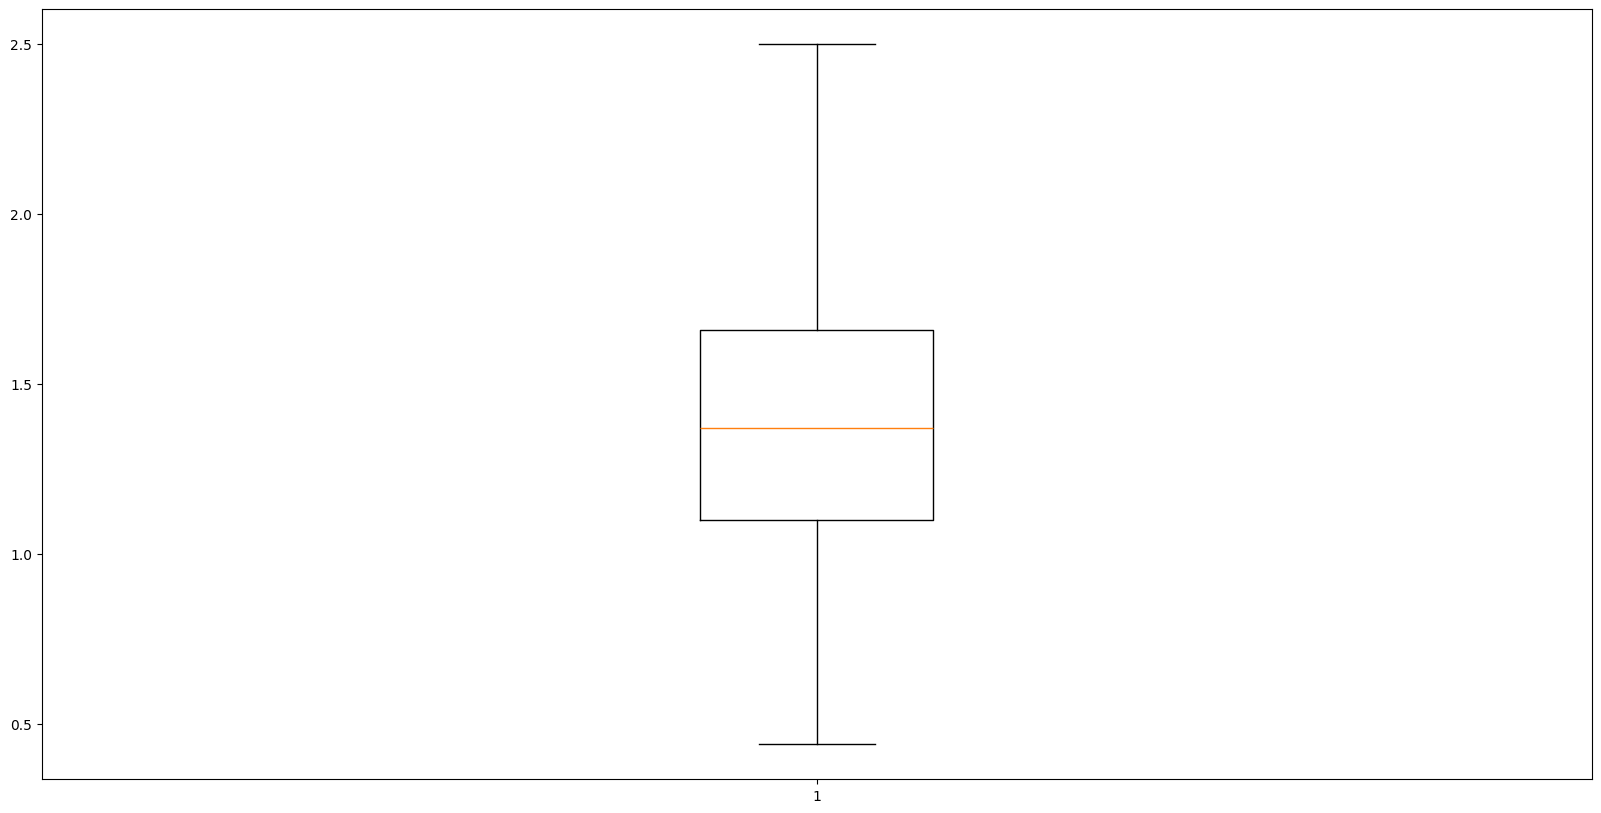

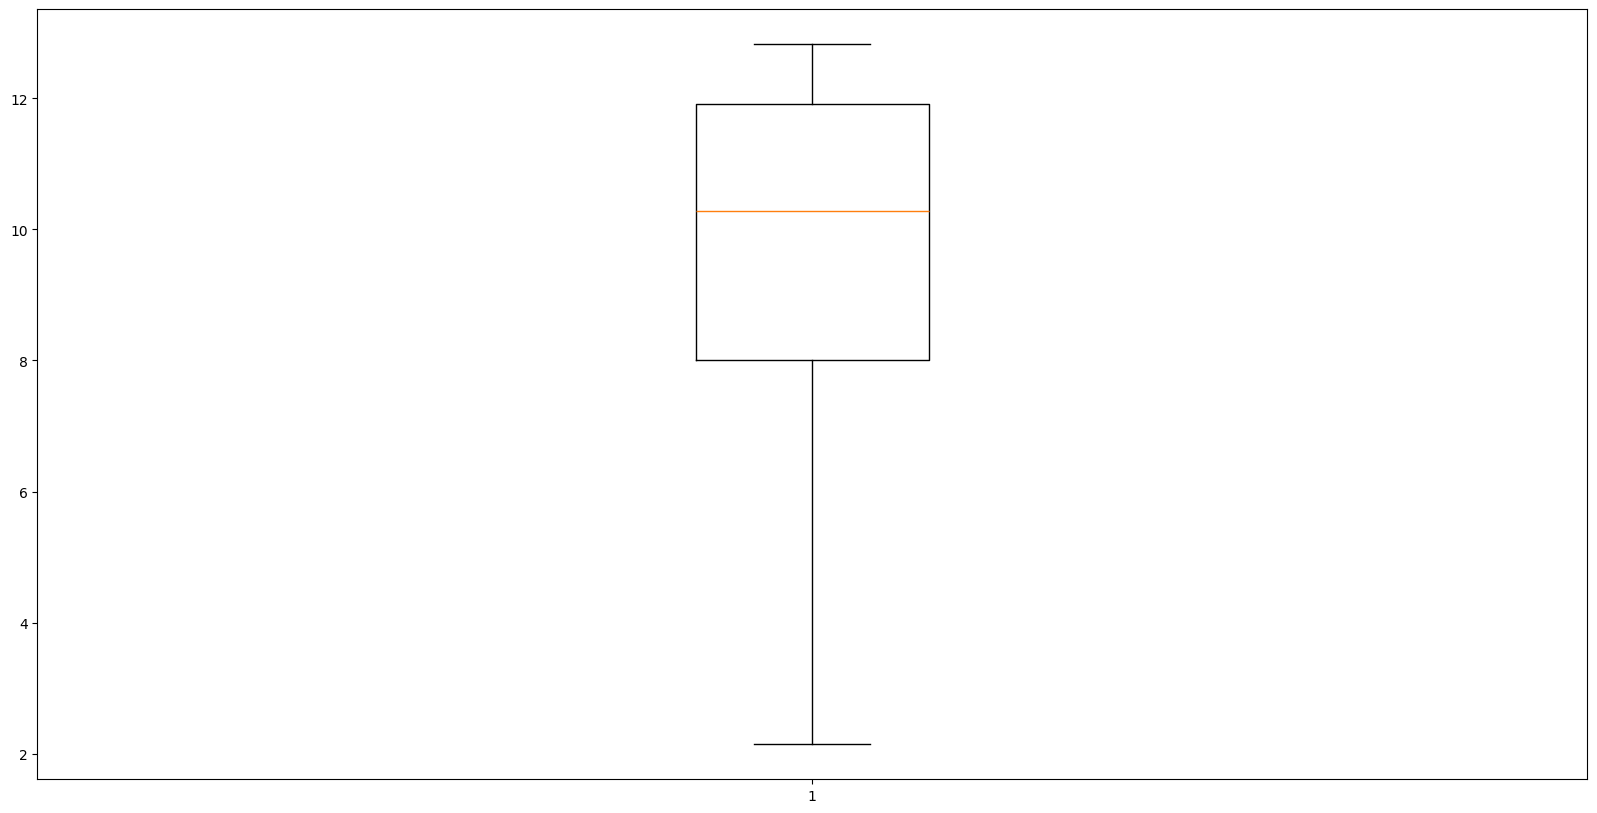

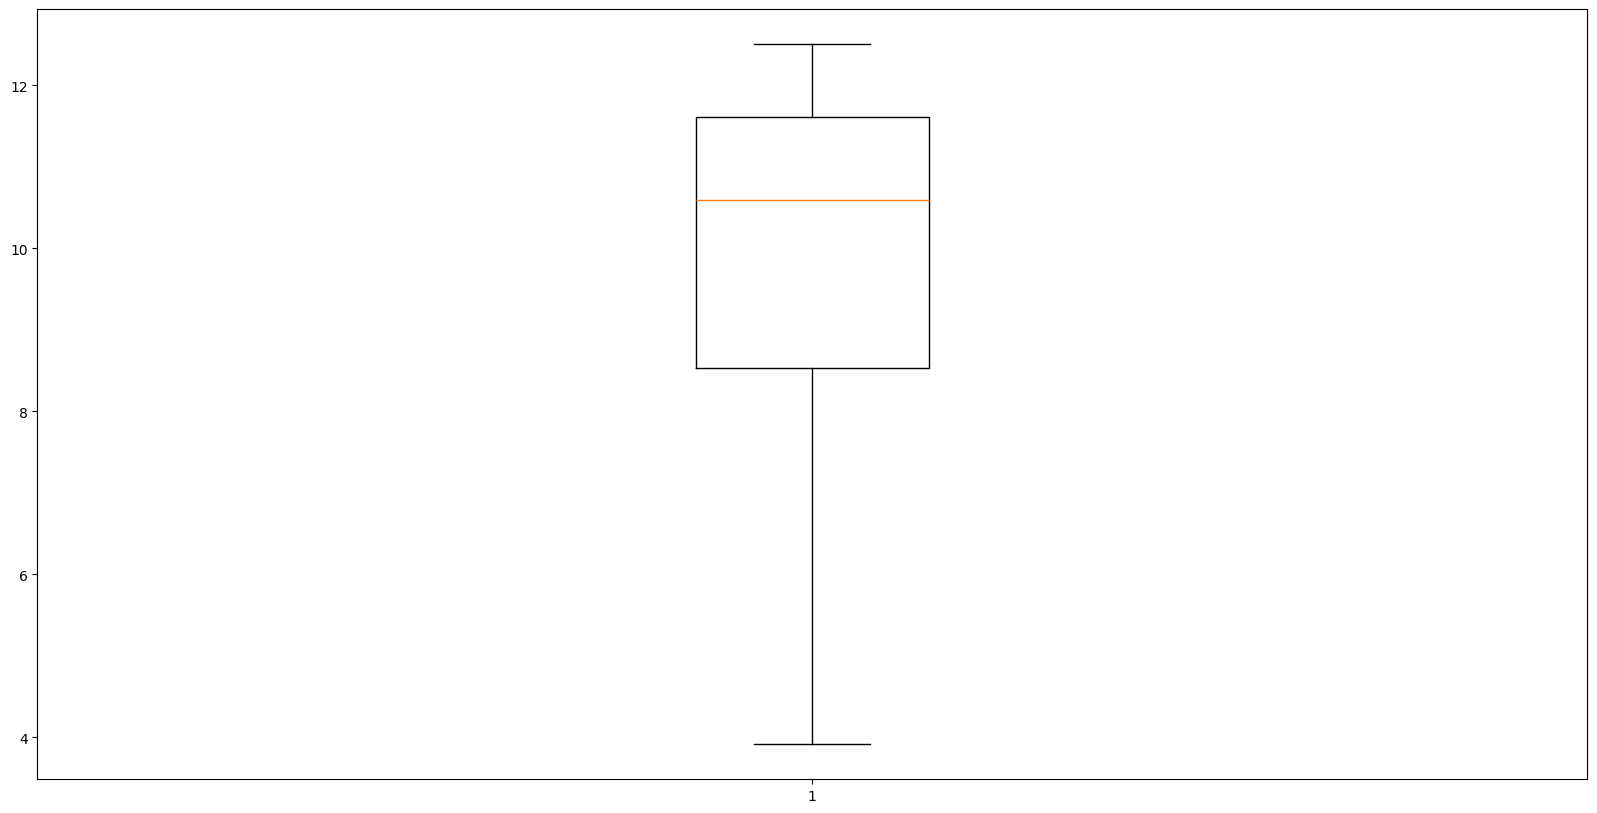

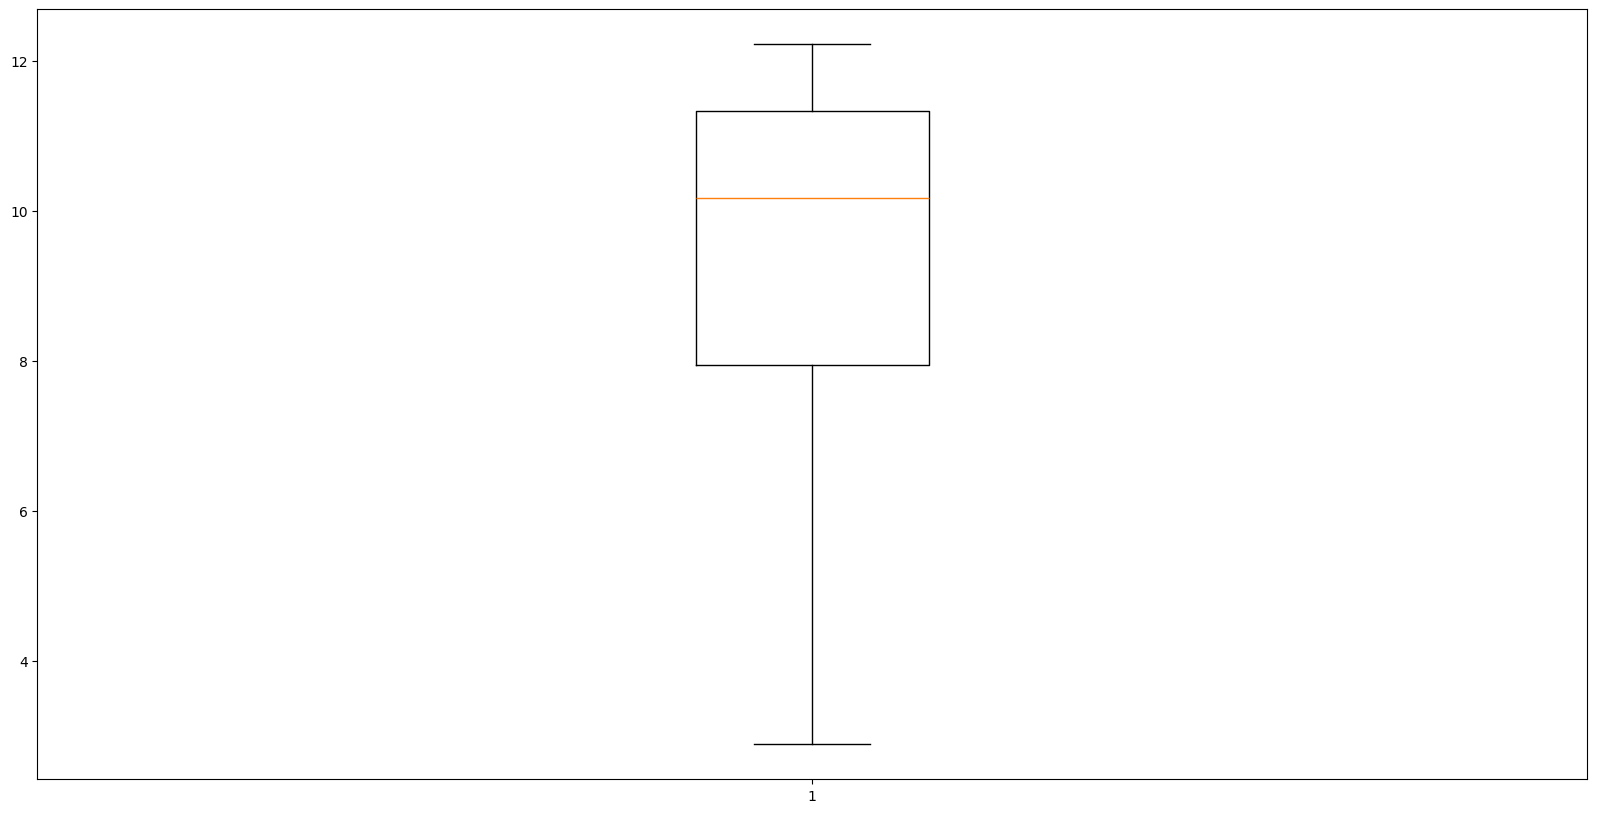

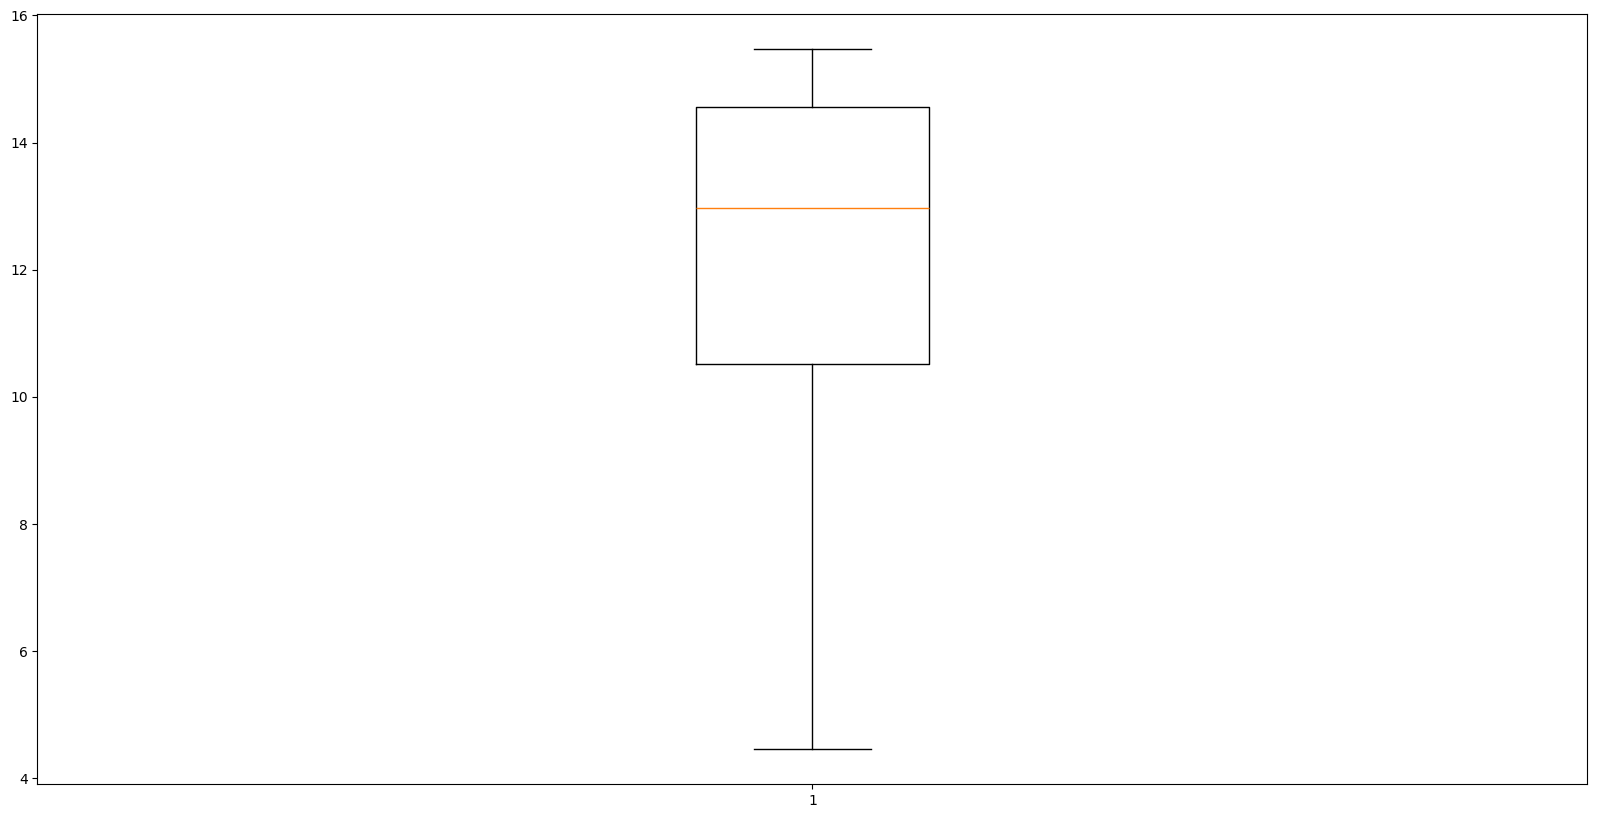

In [465]:
out_feature=['AveragePrice','4225','Total Bags','Small Bags','total_oz']
for i in out_feature:
    remove_outliers(i)

In [478]:
x1.skew()

AveragePrice    0.452825
Total Volume   -0.286407
4046           -0.639860
4225           -0.733244
4770           -0.101150
Total Bags     -0.611103
Small Bags     -0.787799
Large Bags      1.215472
XLarge Bags     0.868651
year            0.215483
region          0.000128
month           0.106690
Day             0.014371
total_oz       -0.545708
revenue        -0.303848
super_region   -0.095373
dtype: float64

In [468]:
feature=['AveragePrice','4046','4225','Total Bags','Small Bags','XLarge Bags','total_oz','revenue']
for col in feature:
    x1[col]=x1[col].apply(np.log1p)

In [479]:
x1.skew()

AveragePrice    0.452825
Total Volume   -0.286407
4046           -0.639860
4225           -0.733244
4770           -0.101150
Total Bags     -0.611103
Small Bags     -0.787799
Large Bags      1.215472
XLarge Bags     0.868651
year            0.215483
region          0.000128
month           0.106690
Day             0.014371
total_oz       -0.545708
revenue        -0.303848
super_region   -0.095373
dtype: float64

In [512]:
x1.shape

(18252, 16)

In [513]:
y1.shape

(18252,)

In [462]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x1.values,i) for i in range(len(x1.columns))]
vif['features']=x1.columns
vif

vif values      features
0     174.793288  AveragePrice
1   24316.241980  Total Volume
2      70.822367          4046
3     325.210864          4225
4       9.236873          4770
5     400.932644    Total Bags
6     131.876012    Small Bags
7       2.944740    Large Bags
8       2.608228   XLarge Bags
9     291.987425          year
10      5.076842        region
11      3.282117         month
12      4.190688           Day
13   1583.133138      total_oz
14  25038.462387       revenue
15      5.375834  super_region

In [ ]:
          APPLYING PRINCIPAL COMPONENT ANALYSIS  METHOD

In [481]:
from sklearn.preprocessing import MinMaxScaler
scalec=MinMaxScaler()
x1=pd.DataFrame(scalec.fit_transform(x1),columns =x1.columns)

In [482]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X1_pca = pca.fit_transform(x1)


In [514]:
x1.shape

(18252, 16)

In [515]:
y1.shape

(18252,)

In [488]:
X1_pca.shape
y1.shape

(18252,)

In [516]:
y1.value_counts()

type
0    9126
1    9126
Name: count, dtype: int64

In [168]:
x.drop('Day',axis=1,inplace=True)

In [166]:
x.drop('Total Bags',axis=1,inplace=True)

In [704]:
x.drop('year',axis=1,inplace=True)

In [705]:
x.drop('Small Bags',axis=1,inplace=True)

In [706]:
x.drop('4225',axis=1,inplace=True)

In [164]:
x.drop('total_oz',axis=1,inplace=True)

In [169]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['features']=x.columns
vif

vif values      features
0    23.217731  AveragePrice
1    47.373443          4046
2   111.900302          4225
3    26.240087          4770
4    91.952829    Small Bags
5     9.109679    Large Bags
6    25.232563   XLarge Bags
7   136.048250          year
8     5.018380        region
9     3.263423         month
10    5.474557  super_region
11  834.996298       revenue

In [486]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier


In [536]:
maxac=0
maxRs=0
for i in range(1,200):
    
    x_train,x_test,y_train,y_test=train_test_split(X1_pca,y1,test_size=0.30,random_state=i)
    RFC=RandomForestClassifier()
    RFC.fit(x_train,y_train)
    pred=RFC.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxac:
        maxac=acc
        maxRS=i
print('best accuracy',maxac,"at random state",maxRS)


best accuracy 0.9574506939371804 at random state 98


In [537]:
x_train,x_test,y_train,y_test=train_test_split(X1_pca,y1,test_size=0.30,random_state=98)
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
pred=RFC.predict(x_test)
acc=accuracy_score(y_test,pred)
print('Accuracy is',acc)

Accuracy is 0.9590942293644996


In [518]:
def classification_models(model,x_train,y_train,x_test,y_test):
     
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(accuracy_score(y_test,pred))
    c_matrix=confusion_matrix(y_test,pred)
    print(c_matrix)
    print(classification_report(y_test,pred))
    x_labels=['0','1']
    y_labels=['0','1']
    plt.figure(figsize=(6,6))
    sns.heatmap(c_matrix,annot=True,linewidth=0.2,linecolor='red',fmt='.2f')
    plt.xlabel('predicted value')
    plt.ylabel('actual value')



0.9282322863403945
[[2548  176]
 [ 217 2535]]
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      2724
           1       0.94      0.92      0.93      2752

    accuracy                           0.93      5476
   macro avg       0.93      0.93      0.93      5476
weighted avg       0.93      0.93      0.93      5476



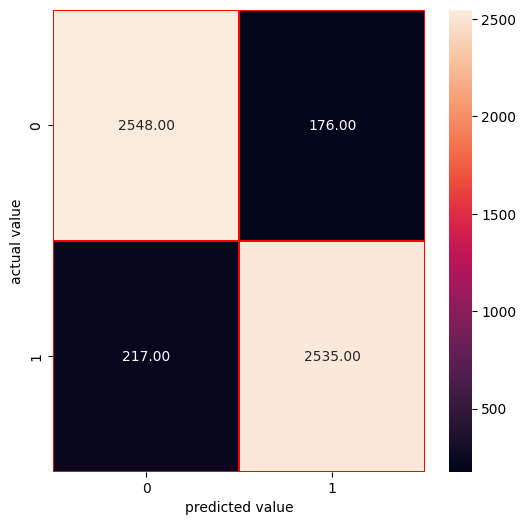

In [519]:
LR=LogisticRegression()
classification_models(LR,x_train,y_train,x_test,y_test)

0.9366325785244705
[[2585  139]
 [ 208 2544]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2724
           1       0.95      0.92      0.94      2752

    accuracy                           0.94      5476
   macro avg       0.94      0.94      0.94      5476
weighted avg       0.94      0.94      0.94      5476



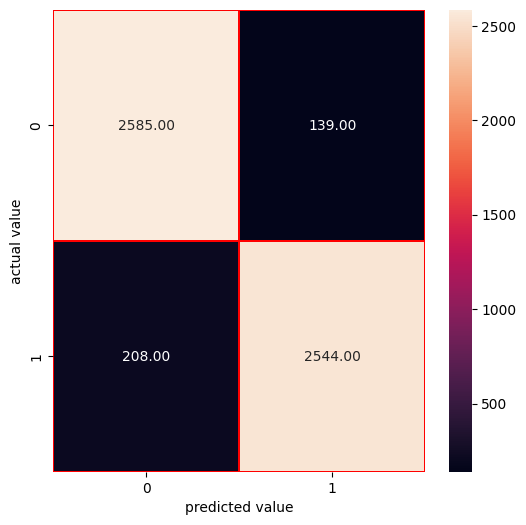

In [520]:
svc=SVC()
classification_models(svc,x_train,y_train,x_test ,y_test)

In [521]:
etc=ExtraTreesClassifier()
classification_models(etc,x_train,y_train,x_test,y_test)

0.9472242512783053
[[2597  127]
 [ 162 2590]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      2724
           1       0.95      0.94      0.95      2752

    accuracy                           0.95      5476
   macro avg       0.95      0.95      0.95      5476
weighted avg       0.95      0.95      0.95      5476



0.945763330898466
[[2625   99]
 [ 198 2554]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2724
           1       0.96      0.93      0.95      2752

    accuracy                           0.95      5476
   macro avg       0.95      0.95      0.95      5476
weighted avg       0.95      0.95      0.95      5476



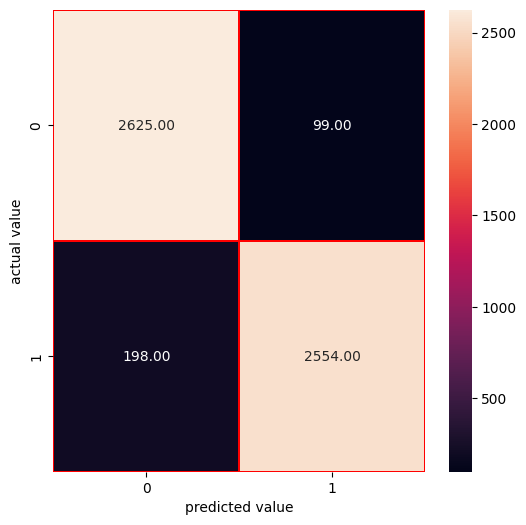

In [522]:
gbc=GradientBoostingClassifier()
classification_models(gbc,x_train,y_train,x_test,y_test)

In [523]:
bgc=BaggingClassifier()
classification_models(bgc,x_train,y_train,x_test,y_test)

0.9466764061358656
[[2610  114]
 [ 178 2574]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      2724
           1       0.96      0.94      0.95      2752

    accuracy                           0.95      5476
   macro avg       0.95      0.95      0.95      5476
weighted avg       0.95      0.95      0.95      5476



In [524]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)

0.9417457998539079
[[2572  152]
 [ 167 2585]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2724
           1       0.94      0.94      0.94      2752

    accuracy                           0.94      5476
   macro avg       0.94      0.94      0.94      5476
weighted avg       0.94      0.94      0.94      5476



In [504]:
knn=KNeighborsClassifier()
classification_models(dtc,x_train,y_train,x_test,y_test)


0.9408327246165084
[[2572  152]
 [ 172 2580]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2724
           1       0.94      0.94      0.94      2752

    accuracy                           0.94      5476
   macro avg       0.94      0.94      0.94      5476
weighted avg       0.94      0.94      0.94      5476



In [507]:
X1_pca.shape


(18252,)

In [509]:
y1.value_counts()

type
0    9126
1    9126
Name: count, dtype: int64

In [530]:
def cross_validation(model,X1_pca,y1,x_test):
    
    pred=model.predict(x_test)
    score=cross_val_score(model,X1_pca,y1)
    print(score)
    print(score.mean())
    print('differnce between accuracy score and cross validation is',accuracy_score(y_test,pred)-score.mean())

In [531]:
cross_validation(LR,X1_pca,y1,x_test)


[0.9320734  0.90167078 0.93863014 0.92657534 0.91808219]
0.9234063701819355
differnce between accuracy score and cross validation is 0.004825916158458954


In [533]:
# checking cross_validation score for Random Forest Classifer
cross_validation(RFC,X1_pca,y1,x_test)


[0.91728294 0.89372775 0.92849315 0.91945205 0.89452055]
0.9106952870859175
differnce between accuracy score and cross validation is 0.039816035047026244


In [534]:
cross_validation(etc,X1_pca,y1,x_test)

[0.91837853 0.89181046 0.91972603 0.91616438 0.89178082]
0.9075720444389415
differnce between accuracy score and cross validation is 0.03965220683936388


In [535]:
cross_validation(gbc,X1_pca,y1,x_test)


[0.92960833 0.8992057  0.94082192 0.93616438 0.90410959]
0.9219819827932298
differnce between accuracy score and cross validation is 0.023781348105236133


In [183]:
cross_validation(dtc,X1_pca,y1,x_test)


[0.98356615 0.98110107 0.97753425 0.96191781 0.96821918]
0.9744676894677007
differnce between accuracy score and cross validation is 0.019323398917982293


In [540]:

final_model=LR.fit(x_train,y_train)
pred=final_model.predict(x_test)
score=cross_val_score(LR,X1_pca,y1)
print(score.mean())

0.9234063701819355


In [541]:
accuracy=final_model.score(x_test,y_test)
print (accuracy)


0.9320672023374726


In [ ]:
                        PLOTING AUC_ROC CURVE 

In [542]:
from sklearn import metrics
fpr,tpr,threshold=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model)
display.plot()

In [543]:
import joblib
joblib.dump(final_model,'Avocado_classification.pkl')

['Avocado_classification.pkl']

In [544]:
model=joblib.load('Avocado_classification.pkl')

In [545]:
prediction=model.predict(x_test)
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [546]:
prd_test=np.array(y_test)

In [547]:
df=pd.DataFrame()
df['predicted']=prediction
df['orignal']=prd_test
df

predicted  orignal
0             0        0
1             0        1
2             0        0
3             0        0
4             0        0
...         ...      ...
5471          1        1
5472          0        0
5473          0        0
5474          0        0
5475          0        0

[5476 rows x 2 columns]